## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import time
import gc
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [2]:
DATA_PATH = "Datasets\\New_datasets\\Data_feature_tempogram.json"

In [3]:
# Function to load data

def load_data(data_path):
    
    with open(data_path, "r") as fp:
        data = json.load(fp)

  # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return X, y

In [4]:
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [5]:
X.shape

(3020, 259, 100)

In [6]:
y.shape

(3020,)

In [7]:
import gc
gc.collect()

0

# SVM 

In [8]:
import gc
gc.collect()

0

In [9]:
# parameters = [{'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['linear']},
#               {'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,10,100]}]

In [10]:
# from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [11]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [12]:
# grid_search = GridSearchCV(svc, param_grid = parameters, scoring='accuracy',cv=shuffle_split,n_jobs=-1,verbose=10)

In [13]:
# grid_search.fit(X,y)

In [14]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [15]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_svm = []
y_test_all = []
times_svm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    model_svm = SVC(kernel='rbf')
    
    start_time = time.time()
    
    model_svm.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = model_svm.predict(X_test)
    scores_svm.append(x)
    times_svm.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [16]:
times_svm

[792.875474691391,
 791.268935918808,
 790.639053106308,
 790.7694954872131,
 789.7628562450409,
 791.4870367050171,
 791.5992231369019,
 793.039014339447,
 796.6316332817078,
 792.7899594306946]

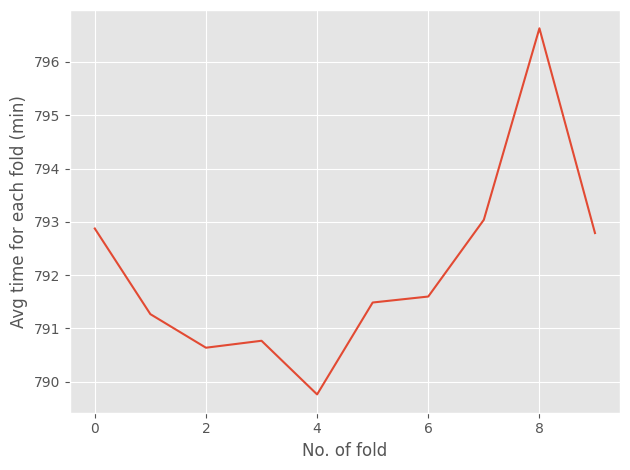

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(times_svm)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold (min)")
plt.tight_layout()
plt.savefig("svm times")
plt.show()

In [18]:
np.array(y_test_all).shape

(10, 302)

In [19]:
np.array(scores_svm).shape

(10, 302)

In [20]:
from sklearn.metrics import accuracy_score
acc_scores_svm = []
for i in range(len(y_test_all)):
    acc_scores_svm.append(accuracy_score(y_test_all[i],scores_svm[i]))

In [21]:
acc_scores_svm

[0.45364238410596025,
 0.44039735099337746,
 0.44039735099337746,
 0.44039735099337746,
 0.4105960264900662,
 0.3973509933774834,
 0.49337748344370863,
 0.423841059602649,
 0.4735099337748344,
 0.4470198675496689]

In [22]:
df_acc = pd.DataFrame([acc_scores_svm])

df_acc.to_csv('svm_accuracy', index=False)

df_acc = pd.read_csv('svm_accuracy')

acc_scores_svm = df_acc.iloc[0].values

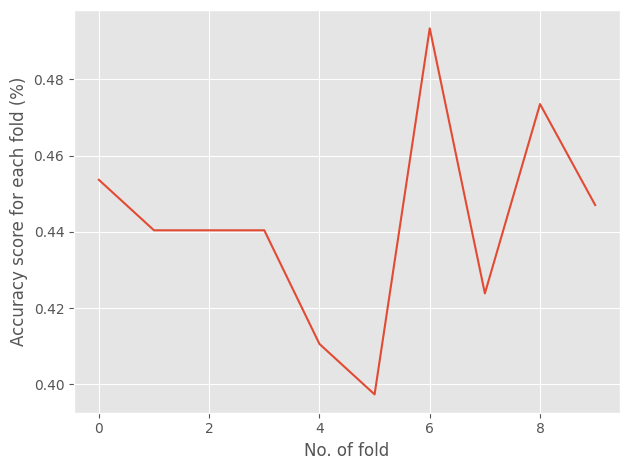

In [23]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_svm)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold (%)")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("svm accuracy")
plt.show()

In [24]:
scores_svm_n = np.array(scores_svm)
y_test_all_n = np.array(y_test_all)

scores_svm_n = scores_svm_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_svm_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 44.21%


In [26]:
import gc
gc.collect()

6593

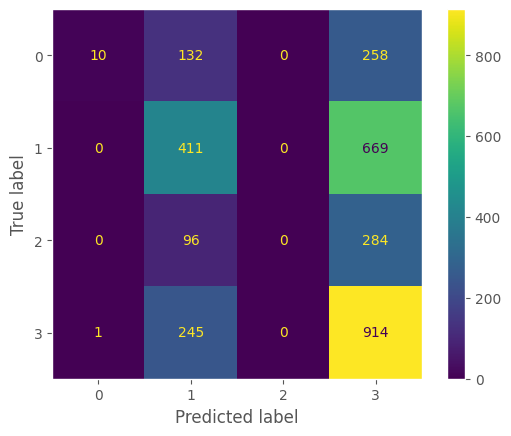

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_svm_n, labels=model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_svm.classes_)
disp.plot()
plt.grid(False)
plt.savefig("svm")
plt.show()

In [28]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_svm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.91      0.03      0.05       400
           1       0.46      0.38      0.42      1080
           2       0.00      0.00      0.00       380
           3       0.43      0.79      0.56      1160

    accuracy                           0.44      3020
   macro avg       0.45      0.30      0.26      3020
weighted avg       0.45      0.44      0.37      3020



C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [29]:
import gc
gc.collect()

0

In [30]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_dtc = []
times_dtc = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    dtc = DecisionTreeClassifier()
    
    
    start_time = time.time()
    dtc.fit(X_train, y_train)
    end_time = time.time()
    
    
    x = dtc.predict(X_test)
    
    scores_dtc.append(x)
    times_dtc.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [31]:
times_dtc

[87.34827017784119,
 82.50444507598877,
 70.60622549057007,
 77.87466812133789,
 85.24435043334961,
 75.12572407722473,
 79.20041799545288,
 61.41655254364014,
 87.48768854141235,
 75.56451368331909]

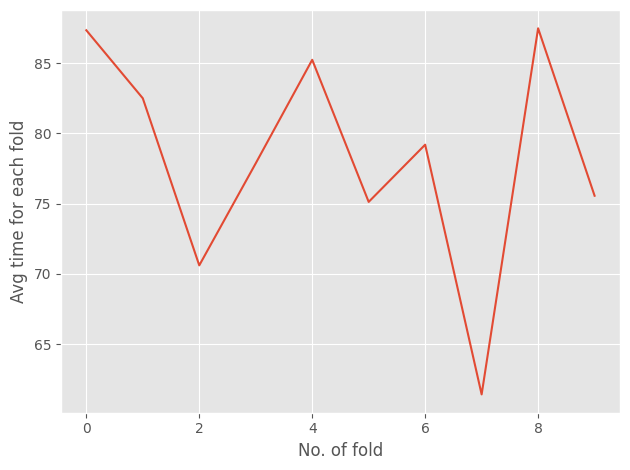

In [32]:
import matplotlib.pyplot as plt

plt.plot(times_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc times")
plt.show()

In [33]:
np.array(y_test_all).shape

(10, 302)

In [34]:
np.array(scores_dtc).shape

(10, 302)

In [35]:
from sklearn.metrics import accuracy_score
acc_scores_dtc = []
for i in range(len(y_test_all)):
    acc_scores_dtc.append(accuracy_score(y_test_all[i],scores_dtc[i]))

In [36]:
acc_scores_dtc

[0.33112582781456956,
 0.4139072847682119,
 0.3509933774834437,
 0.3841059602649007,
 0.39072847682119205,
 0.3741721854304636,
 0.38079470198675497,
 0.3741721854304636,
 0.40728476821192056,
 0.39403973509933776]

In [37]:
df_acc = pd.DataFrame([acc_scores_dtc])

df_acc.to_csv('dtc_accuracy', index=False)

df_acc = pd.read_csv('dtc_accuracy')

acc_scores_dtc = df_acc.iloc[0].values

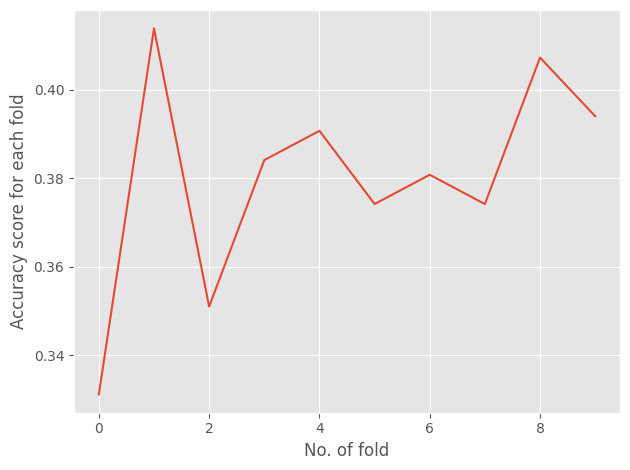

In [38]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc accuracy")
plt.show()

In [39]:
import gc
gc.collect()

3133

In [40]:
scores_dtc_n = np.array(scores_dtc)
y_test_all_n = np.array(y_test_all)

scores_dtc_n = scores_dtc_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_dtc_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 38.01%


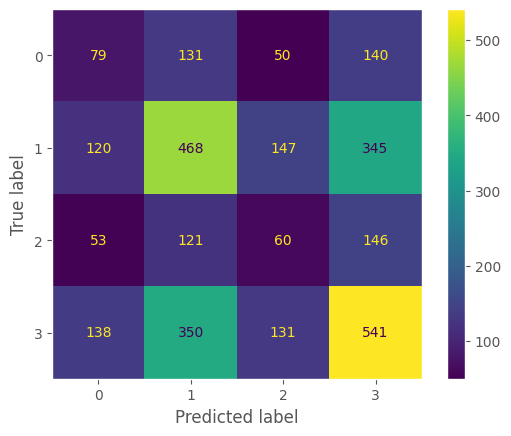

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_dtc_n, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.grid(False)
plt.savefig("DTC")
plt.show()

In [43]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_dtc_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.20      0.20      0.20       400
           1       0.44      0.43      0.44      1080
           2       0.15      0.16      0.16       380
           3       0.46      0.47      0.46      1160

    accuracy                           0.38      3020
   macro avg       0.31      0.31      0.31      3020
weighted avg       0.38      0.38      0.38      3020



In [44]:
# val = np.arange(100,500,20)
# parameters = [{'max_depth':val}]

In [45]:
# parameters

In [46]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [47]:
# grid_search_dtc = GridSearchCV(dtc, param_grid = parameters, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [48]:
# grid_search_dtc.fit(X_train,y_train)

In [49]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# Random Forest

In [50]:
import gc
gc.collect()

6033

In [51]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rdf = []
times_rdf = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    rdf = RandomForestClassifier()
    
    #start time
    start_time = time.time()             
    
    rdf.fit(X_train, y_train)
    
    #end time
    end_time = time.time()     
    
    x = rdf.predict(X_test)
    scores_rdf.append(x)
    times_rdf.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [52]:
times_rdf

[53.37233090400696,
 53.32745099067688,
 37.3408362865448,
 53.365973234176636,
 47.79686880111694,
 51.7271625995636,
 47.63885807991028,
 43.84758496284485,
 42.169689655303955,
 44.207133531570435]

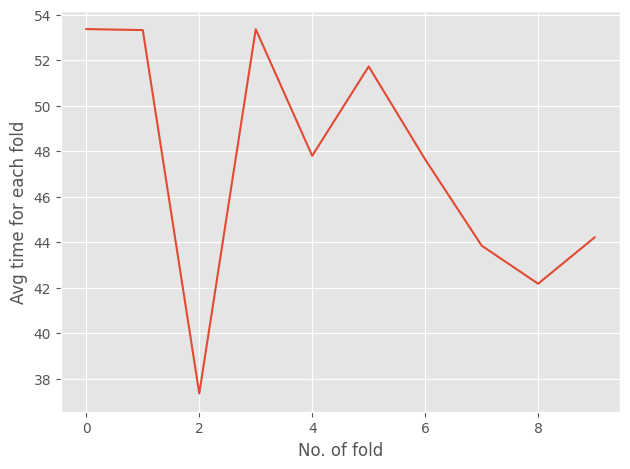

In [53]:
import matplotlib.pyplot as plt

plt.plot(times_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf times")
plt.show()

In [54]:
import gc
gc.collect()

3687

In [55]:
from sklearn.metrics import accuracy_score
acc_scores_rdf = []
for i in range(len(y_test_all)):
    acc_scores_rdf.append(accuracy_score(y_test_all[i],scores_rdf[i]))

In [56]:
acc_scores_rdf

[0.49337748344370863,
 0.49337748344370863,
 0.49337748344370863,
 0.4602649006622517,
 0.49337748344370863,
 0.5364238410596026,
 0.5066225165562914,
 0.5165562913907285,
 0.46357615894039733,
 0.4966887417218543]

In [57]:
df_acc = pd.DataFrame([acc_scores_rdf])

df_acc.to_csv('rdf_accuracy', index=False)

df_acc = pd.read_csv('rdf_accuracy')

acc_scores_rdf = df_acc.iloc[0].values

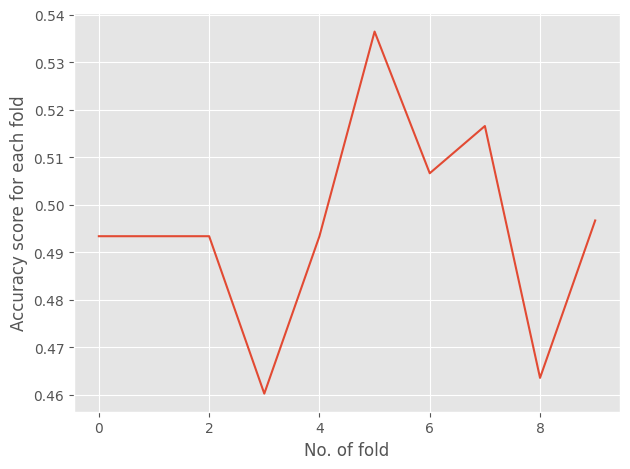

In [58]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf accuracy")
plt.show()
plt.show()

In [59]:
scores_rdf_n = np.array(scores_rdf)
y_test_all_n = np.array(y_test_all)

scores_rdf_n = scores_rdf_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [60]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_rdf_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 49.54%


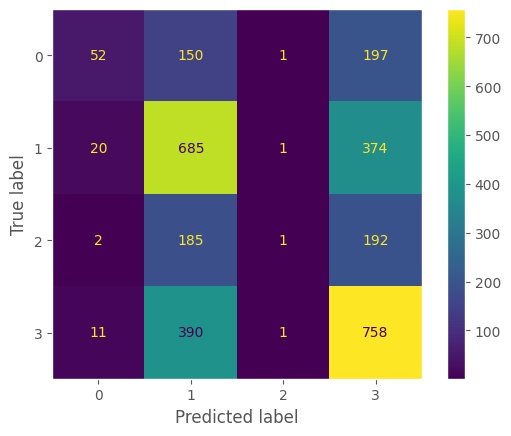

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_rdf_n, labels=rdf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rdf.classes_)
disp.plot()
plt.grid(False)
plt.savefig("RDF")
plt.show()

In [62]:
import gc
gc.collect()

6157

In [63]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_rdf_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.61      0.13      0.21       400
           1       0.49      0.63      0.55      1080
           2       0.25      0.00      0.01       380
           3       0.50      0.65      0.57      1160

    accuracy                           0.50      3020
   macro avg       0.46      0.36      0.33      3020
weighted avg       0.48      0.50      0.44      3020



In [64]:
# parameters_rdf = [
#               {'n_estimators': [10,50,100,150,250,500,750,1000,1500,2000],
#               'max_depth': [1,10,50,100,150,250,500,750,1000,1500,2000]}
#              ]

In [65]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [66]:
# grid_search = GridSearchCV(rdf, param_grid = parameters_rdf, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [67]:
# grid_search.fit(X_train,y_train)

In [68]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# KNN

In [71]:
import gc
gc.collect()

519

In [72]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_knn = []
times_knn = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    knn = KNeighborsClassifier()
    
    start_time = time.time()
    
    knn.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = knn.predict(X_test)
    scores_knn.append(x)
    times_knn.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [73]:
times_knn

[0.04100179672241211,
 0.04200029373168945,
 0.039000749588012695,
 0.04000139236450195,
 0.046469926834106445,
 0.04000091552734375,
 0.04200148582458496,
 0.04160618782043457,
 0.04835963249206543,
 0.04093050956726074]

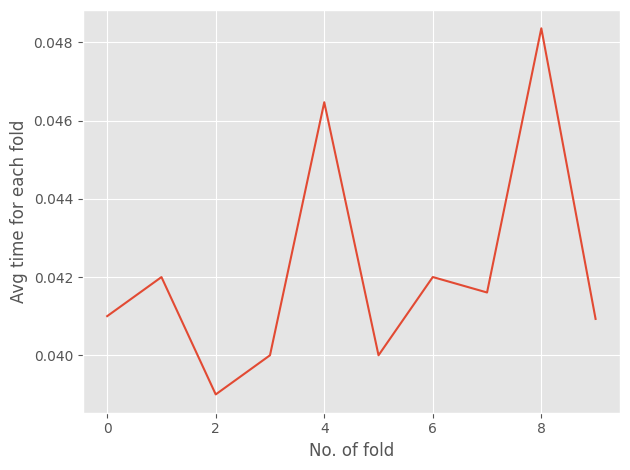

In [74]:
import matplotlib.pyplot as plt

plt.plot(times_knn)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn times")
plt.show()

In [75]:
from sklearn.metrics import accuracy_score
acc_scores_knn = []
for i in range(len(y_test_all)):
    acc_scores_knn.append(accuracy_score(y_test_all[i],scores_knn[i]))

In [76]:
acc_scores_knn

[0.4735099337748344,
 0.4867549668874172,
 0.4602649006622517,
 0.48344370860927155,
 0.45364238410596025,
 0.4139072847682119,
 0.45695364238410596,
 0.45364238410596025,
 0.45695364238410596,
 0.4503311258278146]

In [77]:
df_acc = pd.DataFrame([acc_scores_knn])

df_acc.to_csv('knn_accuracy', index=False)

df_acc = pd.read_csv('knn_accuracy')

acc_scores_knn = df_acc.iloc[0].values

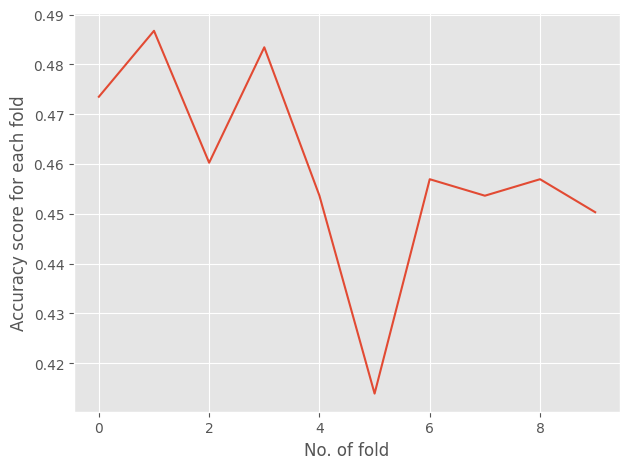

In [78]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_knn)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn accuracy")
plt.show()
plt.show()

In [79]:
import gc
gc.collect()

3549

In [80]:
scores_knn_n = np.array(scores_knn)
y_test_all_n = np.array(y_test_all)

scores_knn_n = scores_knn_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [81]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_knn_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 45.89%


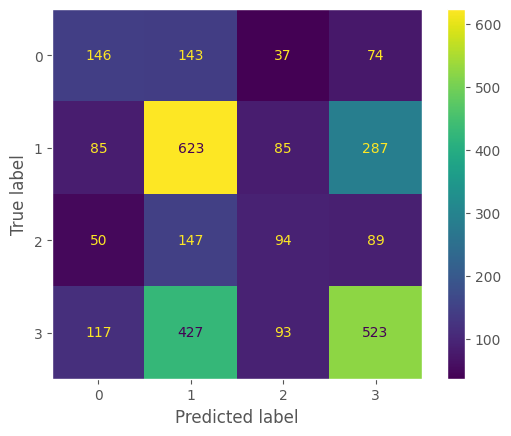

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_knn_n, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.savefig("KNN")
plt.show()

In [83]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_knn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.37      0.36      0.37       400
           1       0.46      0.58      0.51      1080
           2       0.30      0.25      0.27       380
           3       0.54      0.45      0.49      1160

    accuracy                           0.46      3020
   macro avg       0.42      0.41      0.41      3020
weighted avg       0.46      0.46      0.46      3020



In [ ]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [ ]:
# parameters_knn = [{'n_neighbors':[3,5,7,9,11,13,15,17,19,21],'weights': ['uniform', 'distance'],'leaf_size':[30,50,70,90,100]}]

In [ ]:
# grid_search_knn = GridSearchCV(knn, param_grid = parameters_knn, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [ ]:
# grid_search_knn.fit(X_train,y_train)

In [ ]:
# print("Best hyperparameters: ", grid_search_knn.best_params_)
# print("Best score: ", grid_search_knn.best_score_)

In [ ]:
# knn_2 = KNeighborsClassifier(n_neighbors=5,weights='distance',leaf_size=30)
# knn_2.fit(X_train,y_train)

# Naive Bayes

In [84]:
import gc
gc.collect()

6318

In [85]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nb = []
times_nb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    nb = GaussianNB()
    
    start_time = time.time()
    
    nb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = nb.predict(X_test)
    scores_nb.append(x)
    times_nb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [86]:
times_nb

[0.7070341110229492,
 0.7251815795898438,
 0.7151367664337158,
 0.7151772975921631,
 0.7126355171203613,
 0.7225573062896729,
 0.7172276973724365,
 0.7186546325683594,
 0.7123913764953613,
 0.7119965553283691]

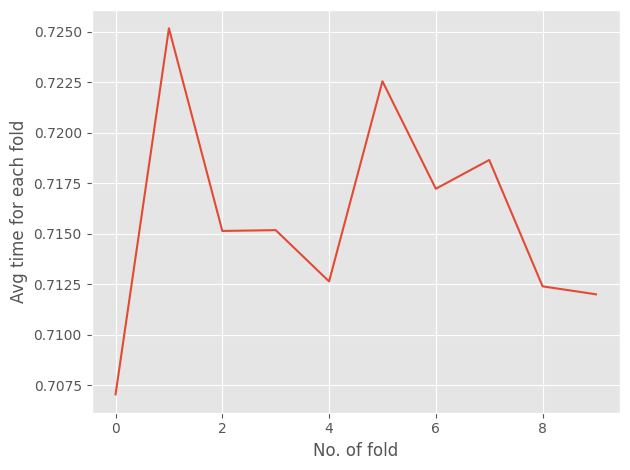

In [87]:
import matplotlib.pyplot as plt

plt.plot(times_nb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb times")
plt.show()

In [88]:
import gc
gc.collect()

3579

In [89]:
from sklearn.metrics import accuracy_score
acc_scores_nb = []
for i in range(len(y_test_all)):
    acc_scores_nb.append(accuracy_score(y_test_all[i],scores_nb[i]))

In [90]:
acc_scores_nb

[0.304635761589404,
 0.30132450331125826,
 0.31788079470198677,
 0.30132450331125826,
 0.34105960264900664,
 0.347682119205298,
 0.36423841059602646,
 0.3344370860927152,
 0.33774834437086093,
 0.347682119205298]

In [91]:
df_acc = pd.DataFrame([acc_scores_nb])

df_acc.to_csv('nb_accuracy', index=False)

df_acc = pd.read_csv('nb_accuracy')

acc_scores_nb = df_acc.iloc[0].values

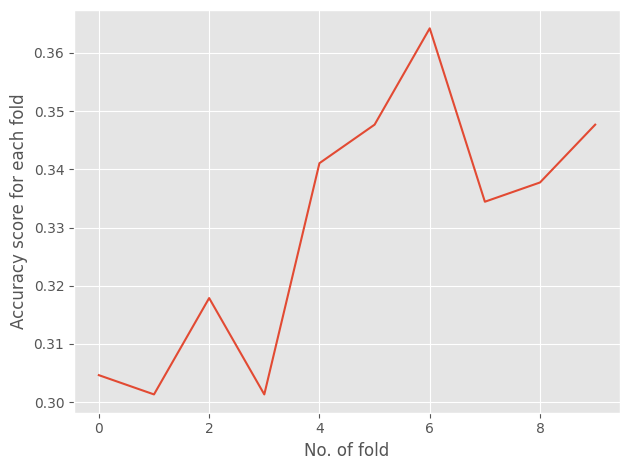

In [92]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_nb)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb accuracy")
plt.show()

In [93]:
scores_nb_n = np.array(scores_nb)
y_test_all_n = np.array(y_test_all)

scores_nb_n = scores_nb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [94]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_nb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 32.98%


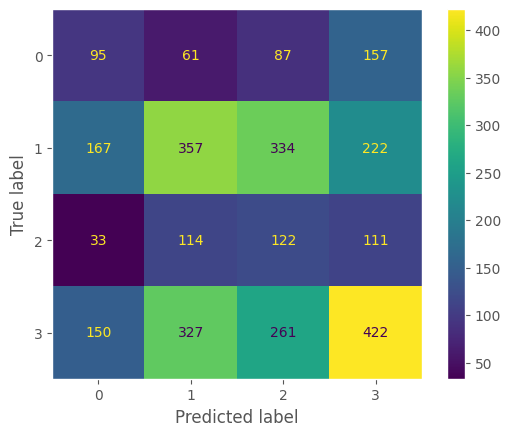

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_nb_n, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("NB")
plt.show()

In [96]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_nb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.21      0.24      0.22       400
           1       0.42      0.33      0.37      1080
           2       0.15      0.32      0.21       380
           3       0.46      0.36      0.41      1160

    accuracy                           0.33      3020
   macro avg       0.31      0.31      0.30      3020
weighted avg       0.37      0.33      0.34      3020



In [97]:
import gc
gc.collect()

6255

In [ ]:
# parameters_nb = {'var_smoothing': [1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16,1e-17,1e-18,1e-19,1e-20,1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2]}

In [ ]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [ ]:
# grid_search_nb = GridSearchCV(nb, param_grid = parameters_nb, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [ ]:
# grid_search_nb.fit(X_train,y_train)

In [ ]:
# print("Best hyperparameters: ", grid_search_nb.best_params_)
# print("Best score: ", grid_search_nb.best_score_)

In [ ]:
# nb_2 = GaussianNB(var_smoothing=1e-10)
# nb_2.fit(X_train,y_train)

In [ ]:
# times_svm_n = np.array(times_svm)
# times_svm_n = times_svm_n/60.0

# times_dtc_n = np.array(times_dtc)
# times_dtc_n = times_dtc_n/60.0

# times_rdf_n = np.array(times_rdf)
# times_rdf_n = times_rdf_n/60.0

# times_knn_n = np.array(times_knn)
# times_knn_n = times_knn_n/60.0

# times_nb_n = np.array(times_nb)
# times_nb_n = times_svm_n/60.0

# Fusion (CNN+SVM)

In [128]:
import gc
gc.collect()

15940

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization

In [130]:
X,y = load_data(DATA_PATH)

Data succesfully loaded!


In [131]:
X.shape

(3020, 259, 100)

In [132]:
# ''''''
# from keras.layers import Activation
# from keras.backend import sigmoid
# def swish(x):
#     return x * sigmoid(x)
# ''''''

In [133]:
# ''''
# from keras.utils import get_custom_objects
# get_custom_objects().update({'swish':Activation(swish)})
# ''''

In [134]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_cnn_svm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_cnn_svm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [135]:
def create_model_cnn_svm():
    
    model_cnn_svm = keras.Sequential([

        keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (X.shape[1],X.shape[2],1)),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(32,(3,3),activation ='relu'),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dropout(0.5),


        keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01),activation='softmax')

    ])
    return model_cnn_svm

In [136]:
import gc
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cnn_svm = []
y_test_all_cnn_svm = []
train_acc_cnn_svm = []
test_acc_cnn_svm = []
train_loss_cnn_svm = []
test_loss_cnn_svm = []


for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_cnn_svm.append(y_test)
    
    model_cnn_svm = None
    model_cnn_svm = create_model_cnn_svm()
    
    X_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    optimiser =tf.keras.optimizers.Adam(learning_rate=0.001)
    
    model_cnn_svm.compile(optimizer = optimiser, loss = tf.keras.losses.squared_hinge, metrics = ['accuracy'])
    
    history = model_cnn_svm.fit(X_train, y_train,validation_data=(x_valid,y_valid),batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    x = model_cnn_svm.predict(X_test)
    
    scores_cnn_svm.append(x)
    train_acc_cnn_svm.append(history.history["accuracy"])
    test_acc_cnn_svm.append(history.history["val_accuracy"])
    train_loss_cnn_svm.append(history.history["loss"])
    test_loss_cnn_svm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 8s 62ms/step - loss: 0.8388 - accuracy: 0.1791 - val_loss: 0.8200 - val_accuracy: 0.1103 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8128 - accuracy: 0.2760 - val_loss: 0.8019 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7986 - accuracy: 0.3545 - val_loss: 0.7935 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7920 - accuracy: 0.3569 - val_loss: 0.7897 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7890 - accuracy: 0.3577 - val_loss: 0.7881 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7881 - accuracy: 0.3577 - val_loss: 0.7872 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 29/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7860 - accuracy: 0.3577 - val_loss: 0.7854 - val_accuracy: 0.3566 - lr: 8.0000e-06
Epoch 30/100
76/77 [============================>.] - ETA: 0s - loss: 0.7849 - accuracy: 0.3586
Epoch 30: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 30: 4.35 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.7849 - accuracy: 0.3577 - val_loss: 0.7854 - val_accuracy: 0.3566 - lr: 8.0000e-06
Epoch 31/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7860 - accuracy: 0.3577 - val_loss: 0.7854 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7860 - accuracy: 0.3577 - val_loss: 0.7854 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7836 - accuracy: 0.3577 - val_loss: 0.7854 - val_accuracy: 0.3566 - lr: 1.6000e-06
E

77/77 [==============================] - 4s 57ms/step - loss: 0.7862 - accuracy: 0.3577 - val_loss: 0.7854 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 86/100
76/77 [============================>.] - ETA: 0s - loss: 0.7861 - accuracy: 0.3581
Epoch 86: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 86: 4.32 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.7862 - accuracy: 0.3577 - val_loss: 0.7854 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 87/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7852 - accuracy: 0.3577 - val_loss: 0.7854 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7846 - accuracy: 0.3577 - val_loss: 0.7854 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7861 - accuracy: 0.3577 - val_loss: 0.7854 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 90/100
77

Epoch 13/100
76/77 [============================>.] - ETA: 0s - loss: 0.7945 - accuracy: 0.3557
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 13: 4.37 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.7946 - accuracy: 0.3553 - val_loss: 0.7965 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7945 - accuracy: 0.3569 - val_loss: 0.7965 - val_accuracy: 0.3787 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7944 - accuracy: 0.3549 - val_loss: 0.7964 - val_accuracy: 0.3787 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7944 - accuracy: 0.3561 - val_loss: 0.7964 - val_accuracy: 0.3787 - lr: 2.0000e-04
Epoch 17/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7943 - accuracy: 0.3532 - val_loss: 0.7963 - val_accuracy: 0.3787 - lr: 2.0000e-04
Epoch

76/77 [============================>.] - ETA: 0s - loss: 0.7940 - accuracy: 0.3540
Epoch 69: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 69: 4.37 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.7941 - accuracy: 0.3545 - val_loss: 0.7961 - val_accuracy: 0.3787 - lr: 2.5600e-09
Epoch 70/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7941 - accuracy: 0.3549 - val_loss: 0.7961 - val_accuracy: 0.3787 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7941 - accuracy: 0.3565 - val_loss: 0.7961 - val_accuracy: 0.3787 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7940 - accuracy: 0.3557 - val_loss: 0.7961 - val_accuracy: 0.3787 - lr: 5.1200e-10
Epoch 73/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7939 - accuracy: 0.3557 - val_loss: 0.7961 - val_accuracy: 0.3787 - lr: 5.1200e-10
Epoch 74/100
77/7

77/77 [==============================] - 4s 57ms/step - loss: 0.8027 - accuracy: 0.3810 - val_loss: 0.8007 - val_accuracy: 0.3713 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8027 - accuracy: 0.3806 - val_loss: 0.8007 - val_accuracy: 0.3713 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8026 - accuracy: 0.3818 - val_loss: 0.8007 - val_accuracy: 0.3713 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8027 - accuracy: 0.3827 - val_loss: 0.8007 - val_accuracy: 0.3713 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8027 - accuracy: 0.3806 - val_loss: 0.8007 - val_accuracy: 0.3713 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 0.8027 - accuracy: 0.3840
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.31 seconds
7

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [224]:
import gc
gc.collect()

6318

In [225]:
np.array(y_test_all_cnn_svm).shape

(10, 302)

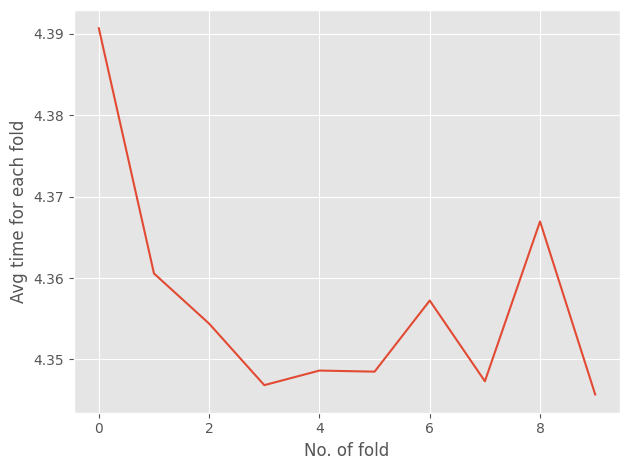

In [226]:
import matplotlib.pyplot as plt

times_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(times_cnn_svm):
    times_cnn_svm_n[i, :len(row)] = row

times_cnn_svm_n_n = np.mean(times_cnn_svm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_cnn_svm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cnn_svm times")
plt.show()

In [227]:
train_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_cnn_svm):
    train_acc_cnn_svm_n[i, :len(row)] = row
    
test_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_cnn_svm):
    test_acc_cnn_svm_n[i, :len(row)] = row
    
train_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_cnn_svm):
    train_loss_cnn_svm_n[i, :len(row)] = row
    
test_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_cnn_svm):
    test_loss_cnn_svm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_cnn_svm_n = np.mean(train_acc_cnn_svm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_cnn_svm_n = np.mean(test_acc_cnn_svm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_cnn_svm_n = np.mean(train_loss_cnn_svm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_cnn_svm_n = np.mean(test_loss_cnn_svm_n,axis=0)

In [228]:
train_acc_cnn_svm_n.shape

(100,)

In [229]:
train_acc_cnn_svm_n.shape

(100,)

In [230]:
data = [train_acc_cnn_svm_n,test_acc_cnn_svm_n,train_loss_cnn_svm_n,test_loss_cnn_svm_n]

df = pd.DataFrame(data)
df.to_csv('cnn_svm_acc', index=False)
df = pd.read_csv('cnn_svm_acc')

train_acc_cnn_svm_n = df.iloc[0]
test_acc_cnn_svm_n = df.iloc[1]
train_loss_cnn_svm_n = df.iloc[2]
test_loss_cnn_svm_n = df.iloc[3]


df_t = pd.DataFrame([times_cnn_svm_n_n])
df_t.to_csv('cnn_svm_times', index=False)
df_t = pd.read_csv('cnn_svm_times')

times_cnn_svm_n_n = df_t.iloc[0]

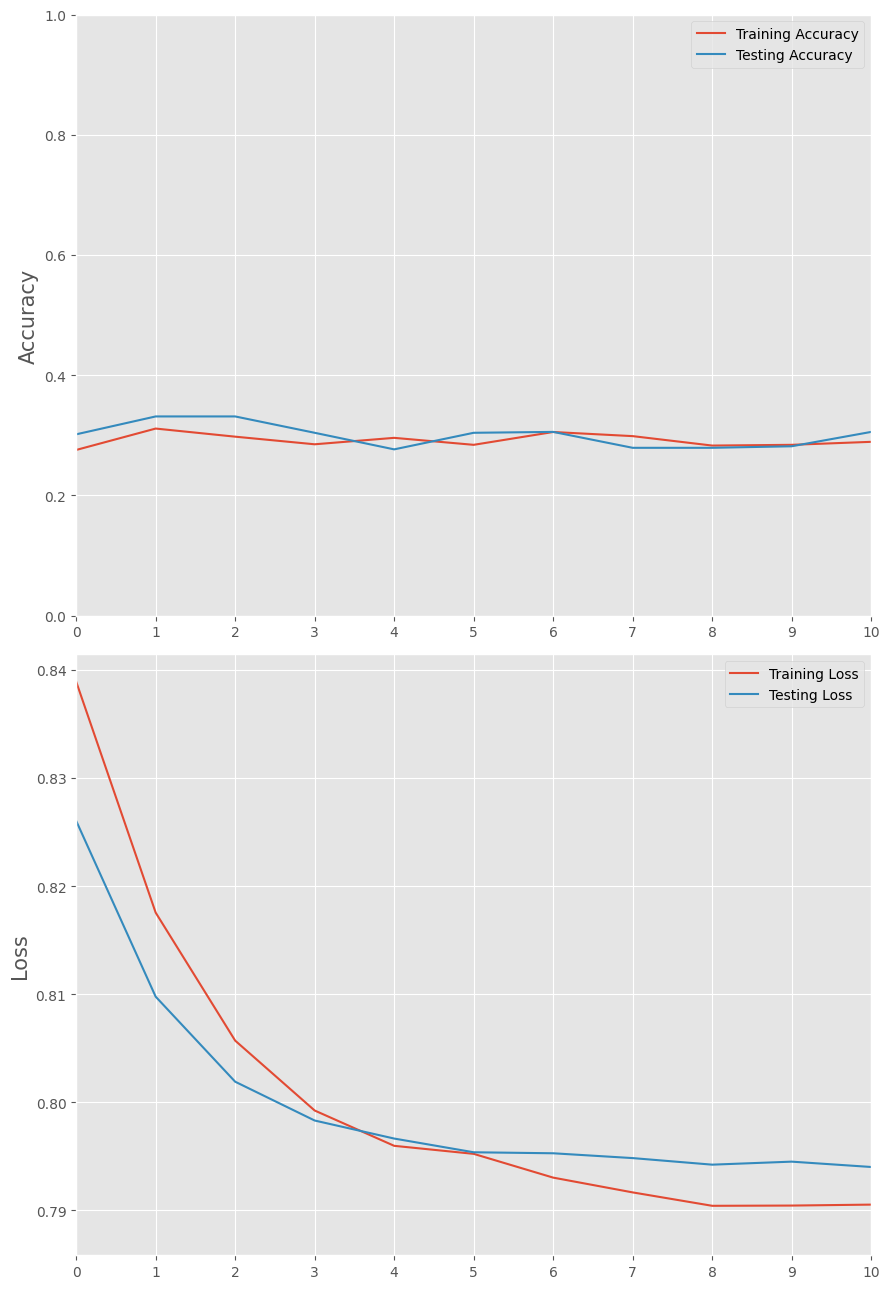

In [231]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))
plt.style.use('ggplot')

axs[0].plot(train_acc_cnn_svm_n, label='Training Accuracy')
axs[0].plot(test_acc_cnn_svm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_cnn_svm_n, label='Training Loss')
axs[1].plot(test_loss_cnn_svm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("CNN + SVM Training and Testing Loss")
plt.show()

In [232]:
np.array(scores_cnn_svm).shape

(10, 302, 4)

In [233]:
np.array(y_test_all_cnn_svm).shape

(10, 302)

In [234]:
y_pred_cnn_svm = np.argmax(scores_cnn_svm,axis=2)

In [235]:
y_pred_cnn_svm.shape

(10, 302)

In [236]:
from sklearn.metrics import accuracy_score
acc_scores_cnn_svm = []
for i in range(len(y_test_all_cnn_svm)):
    acc_scores_cnn_svm.append(accuracy_score(y_true = y_test_all_cnn_svm[i],y_pred = y_pred_cnn_svm[i]))

In [237]:
import gc
gc.collect()

23627

In [238]:
acc_scores_cnn_svm

[0.3576158940397351,
 0.3576158940397351,
 0.3841059602649007,
 0.3576158940397351,
 0.13245033112582782,
 0.1291390728476821,
 0.3841059602649007,
 0.3841059602649007,
 0.13245033112582782,
 0.13245033112582782]

In [239]:
df_acc = pd.DataFrame([acc_scores_cnn_svm])

df_acc.to_csv('cnn_svm_accuracy', index=False)

df_acc = pd.read_csv('cnn_svm_accuracy')

acc_scores_cnn_svm = df_acc.iloc[0].values

In [240]:
y_test_all_n = np.array(y_test_all_cnn_svm)

y_pred_cnn_svm_n = y_pred_cnn_svm.flatten()
y_test_all_n = y_test_all_n.flatten()

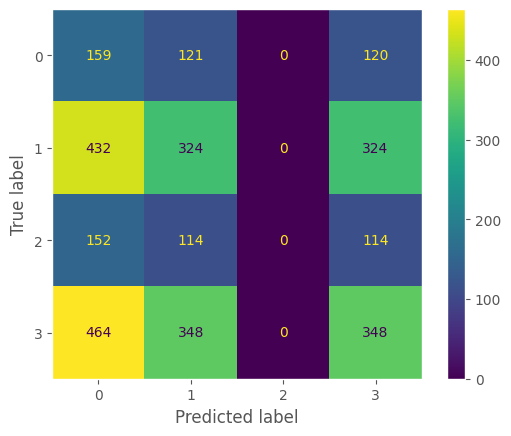

In [241]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_cnn_svm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("CNN + SVM")
plt.show()

In [242]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_cnn_svm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.40      0.20       400
           1       0.36      0.30      0.33      1080
           2       0.00      0.00      0.00       380
           3       0.38      0.30      0.34      1160

    accuracy                           0.28      3020
   macro avg       0.22      0.25      0.22      3020
weighted avg       0.29      0.28      0.27      3020



C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CNN + SVM (hyper-para-tuning)

In [ ]:
# ''''
# conv_1_filter: 48
# conv_1_kernel: 3
# conv_2_filter: 64
# conv_2_kernel: 5
# dense_1_units: 32
# lr: 0.0012043751090852965

# ''''

In [ ]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# X,y = load_data(DATA_PATH)

In [ ]:
# X = X / 255.0

In [ ]:
# X.shape

In [ ]:
# ''''
# def create():
    
#     model_cnn = Sequential()
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X.shape[1],X.shape[2],1))),
#     model.add(MaxPooling2D(pool_size=pool_size ,strides=(1,1),padding ='same')),
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')),
#     model.add(MaxPooling2D(pool_size=pool_size,strides=(1,1),padding ='same')),
#     model.add(Flatten()),
#     model.add(Dense(128, activation='relu')),
#     model.add(Dropout(0.5)),
#     model.add(Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')),
#     model.compile(optimizer=optimizer, loss='squared_hinge', metrics=['accuracy'])
    
#     return model_cnn

# ''''

In [ ]:
# def build_model(hp):
#     model = keras.Sequential([
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
#         kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
#         activation='relu',
#         input_shape=(259,13,1)
#     ),
    
#     keras.layers.MaxPooling2D(
#         pool_size = (2, 2),
#         strides=(1,1),
#         padding ='same'
#     ),
        
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
#         kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
#         activation='relu'
#     ),
        
#     keras.layers.MaxPooling2D(
#         pool_size = (2,2),
#         strides=(1,1),
#         padding ='same'
#     ),
    
#     keras.layers.Flatten(),
#     keras.layers.Dense(
#         units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
#         activation='relu'
#     ),
#     keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')
#   ])
  
#     learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#               loss='squared_hinge',
#               metrics=['accuracy'])
  
#     return model

In [ ]:
# from keras_tuner import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters

In [ ]:
# tuner_search=RandomSearch(build_model,
#                           objective='accuracy',
#                           overwrite=True,
#                           max_trials=10,directory='cnn')

In [ ]:
# tuner_search.search(X,y,epochs=2,validation_split=0.2)

In [ ]:
# tuner_search.results_summary()

In [ ]:
# models = tuner_search.get_best_models(num_models=2)

# best_model = models[0]

# best_model.build(input_shape=(259,13,1))

# best_model.summary()

In [ ]:
# def display_cv_results(search_results):
#     print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))    
    
# # create model
# model = KerasClassifier(build_fn=create_cnn_model, verbose=1)
# # define parameters and values for grid search 
# param_grid = {
#     'filters': [16, 32, 64],
#     'kernel_size': [(3, 3), (5, 5)],
#     'pool_size': [(2, 2), (3, 3)],
#     'activation': ['relu', 'sigmoid'],
#     'optimizer': ['adam', 'SGD'],
#     'batch_size': [16, 32, 64],
# }
# grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=cv)
# grid_result = grid.fit(X, y)  # fit the full dataset as we are using cross validation 

# # print out results
# print('time for grid search = {:.0f} sec'.format(time()-start))
# display_cv_results(grid_result)

# XGboost

In [98]:
import gc
gc.collect()

0

In [99]:
import gc
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xg = []
times_xg = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    xg = XGBClassifier()
    
    start_time = time.time()
    
    xg.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = xg.predict(X_test)
    scores_xg.append(x)
    times_xg.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [100]:
times_xg

[320.16163325309753,
 317.56730818748474,
 319.6662976741791,
 318.172315120697,
 318.3620593547821,
 317.16232085227966,
 320.75682950019836,
 319.9104664325714,
 319.60236954689026,
 317.9556987285614]

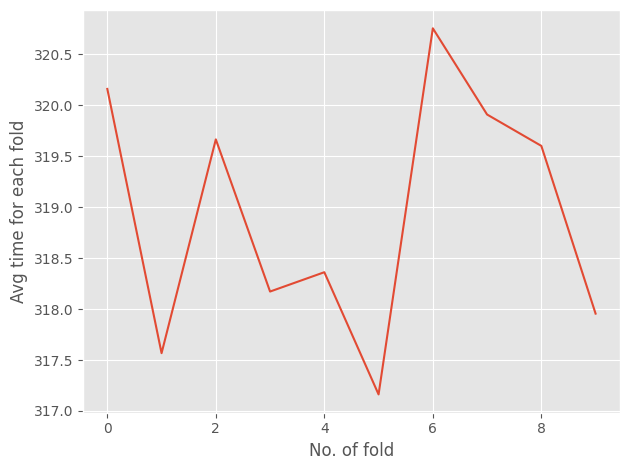

In [101]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(times_xg)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xg times")
plt.show()

In [102]:
import gc
gc.collect()

3579

In [103]:
from sklearn.metrics import accuracy_score
acc_scores_xg = []
for i in range(len(y_test_all)):
    acc_scores_xg.append(accuracy_score(y_test_all[i],scores_xg[i]))

In [104]:
acc_scores_xg

[0.4867549668874172,
 0.48013245033112584,
 0.5,
 0.4867549668874172,
 0.4768211920529801,
 0.44039735099337746,
 0.4768211920529801,
 0.46357615894039733,
 0.5066225165562914,
 0.5]

In [105]:
df_acc = pd.DataFrame([acc_scores_xg])

df_acc.to_csv('xg_accuracy', index=False)

df_acc = pd.read_csv('xg_accuracy')

acc_scores_xg = df_acc.iloc[0].values

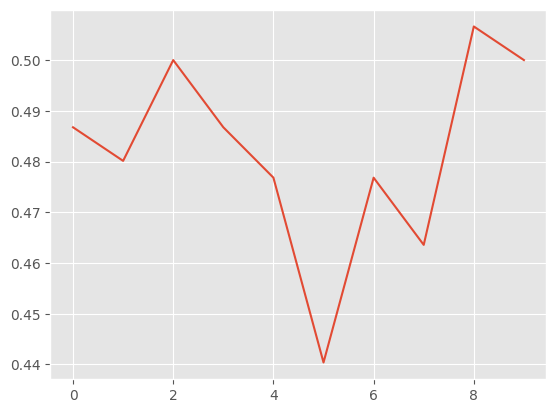

In [106]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_xg)
plt.style.use('ggplot')
plt.savefig("XG boost Acc figures")
plt.show()

In [107]:
scores_xg_n = np.array(scores_xg)
y_test_all_n = np.array(y_test_all)

scores_xg_n = scores_xg_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [108]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_xg_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 48.18%


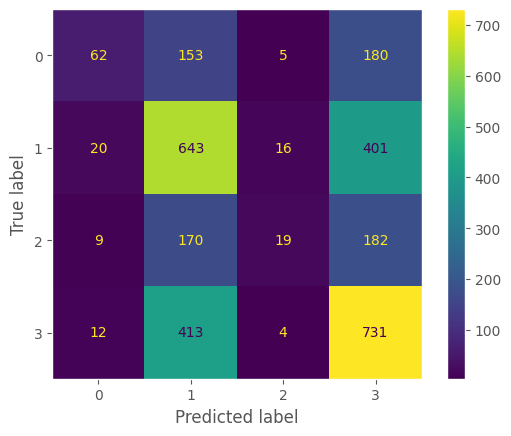

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_xg_n, labels=xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xg.classes_)
disp.plot()
plt.grid(False)
plt.savefig("XG Boost")

plt.show()

In [110]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_xg_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.60      0.15      0.25       400
           1       0.47      0.60      0.52      1080
           2       0.43      0.05      0.09       380
           3       0.49      0.63      0.55      1160

    accuracy                           0.48      3020
   macro avg       0.50      0.36      0.35      3020
weighted avg       0.49      0.48      0.44      3020



# Catboost

In [111]:
import gc
gc.collect()

6441

In [112]:
import gc
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cb = []
times_cb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.10)
    
    cb = CatBoostClassifier(iterations=100)
    
    start_time = time.time()
    
    cb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = cb.predict(X_test)
    scores_cb.append(x)
    times_cb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Learning rate set to 0.5
0:	learn: 1.2855394	total: 8.73s	remaining: 14m 24s
1:	learn: 1.2428615	total: 11.5s	remaining: 9m 24s
2:	learn: 1.2094140	total: 14.3s	remaining: 7m 42s
3:	learn: 1.1851269	total: 16.9s	remaining: 6m 46s
4:	learn: 1.1689456	total: 19.5s	remaining: 6m 10s
5:	learn: 1.1507331	total: 22.1s	remaining: 5m 45s
6:	learn: 1.1368374	total: 24.7s	remaining: 5m 27s
7:	learn: 1.1245912	total: 27.3s	remaining: 5m 14s
8:	learn: 1.1046741	total: 30.1s	remaining: 5m 4s
9:	learn: 1.0901214	total: 32.7s	remaining: 4m 54s
10:	learn: 1.0655963	total: 35.5s	remaining: 4m 46s
11:	learn: 1.0484941	total: 38s	remaining: 4m 38s
12:	learn: 1.0342691	total: 40.6s	remaining: 4m 31s
13:	learn: 1.0145498	total: 43.3s	remaining: 4m 25s
14:	learn: 0.9972953	total: 46s	remaining: 4m 20s
15:	learn: 0.9817788	total: 48.7s	remaining: 4m 15s
16:	learn: 0.9677270	total: 51.4s	remaining: 4m 11s
17:	learn: 0.9575386	total: 54s	remaining: 4m 5s
18:	learn: 0.9414647	total: 56.

56:	learn: 0.4525329	total: 2m 31s	remaining: 1m 53s
57:	learn: 0.4453256	total: 2m 33s	remaining: 1m 51s
58:	learn: 0.4383051	total: 2m 36s	remaining: 1m 48s
59:	learn: 0.4325303	total: 2m 39s	remaining: 1m 46s
60:	learn: 0.4276342	total: 2m 41s	remaining: 1m 43s
61:	learn: 0.4183368	total: 2m 44s	remaining: 1m 40s
62:	learn: 0.4112345	total: 2m 47s	remaining: 1m 38s
63:	learn: 0.4074883	total: 2m 49s	remaining: 1m 35s
64:	learn: 0.4026559	total: 2m 52s	remaining: 1m 32s
65:	learn: 0.3976537	total: 2m 55s	remaining: 1m 30s
66:	learn: 0.3898124	total: 2m 57s	remaining: 1m 27s
67:	learn: 0.3833814	total: 3m	remaining: 1m 24s
68:	learn: 0.3756488	total: 3m 2s	remaining: 1m 22s
69:	learn: 0.3707307	total: 3m 5s	remaining: 1m 19s
70:	learn: 0.3630154	total: 3m 8s	remaining: 1m 16s
71:	learn: 0.3583495	total: 3m 11s	remaining: 1m 14s
72:	learn: 0.3526965	total: 3m 13s	remaining: 1m 11s
73:	learn: 0.3450575	total: 3m 16s	remaining: 1m 8s
74:	learn: 0.3365707	total: 3m 18s	remaining: 1m 6s
75

12:	learn: 1.0425691	total: 34.5s	remaining: 3m 50s
13:	learn: 1.0310351	total: 37.1s	remaining: 3m 47s
14:	learn: 1.0107594	total: 39.8s	remaining: 3m 45s
15:	learn: 0.9999043	total: 42.5s	remaining: 3m 43s
16:	learn: 0.9800895	total: 45.4s	remaining: 3m 41s
17:	learn: 0.9643776	total: 48s	remaining: 3m 38s
18:	learn: 0.9511632	total: 50.6s	remaining: 3m 35s
19:	learn: 0.9286831	total: 53.4s	remaining: 3m 33s
20:	learn: 0.9124056	total: 55.9s	remaining: 3m 30s
21:	learn: 0.8938570	total: 58.5s	remaining: 3m 27s
22:	learn: 0.8737849	total: 1m 1s	remaining: 3m 24s
23:	learn: 0.8548887	total: 1m 4s	remaining: 3m 23s
24:	learn: 0.8388619	total: 1m 6s	remaining: 3m 20s
25:	learn: 0.8164767	total: 1m 9s	remaining: 3m 17s
26:	learn: 0.7997990	total: 1m 11s	remaining: 3m 14s
27:	learn: 0.7780697	total: 1m 14s	remaining: 3m 11s
28:	learn: 0.7516248	total: 1m 17s	remaining: 3m 8s
29:	learn: 0.7345001	total: 1m 19s	remaining: 3m 6s
30:	learn: 0.7232667	total: 1m 22s	remaining: 3m 3s
31:	learn: 0

69:	learn: 0.3890946	total: 3m 5s	remaining: 1m 19s
70:	learn: 0.3819243	total: 3m 8s	remaining: 1m 17s
71:	learn: 0.3785010	total: 3m 11s	remaining: 1m 14s
72:	learn: 0.3747770	total: 3m 13s	remaining: 1m 11s
73:	learn: 0.3651598	total: 3m 16s	remaining: 1m 9s
74:	learn: 0.3606916	total: 3m 19s	remaining: 1m 6s
75:	learn: 0.3580149	total: 3m 21s	remaining: 1m 3s
76:	learn: 0.3554422	total: 3m 24s	remaining: 1m 1s
77:	learn: 0.3481356	total: 3m 27s	remaining: 58.5s
78:	learn: 0.3437465	total: 3m 29s	remaining: 55.8s
79:	learn: 0.3395325	total: 3m 32s	remaining: 53.2s
80:	learn: 0.3344120	total: 3m 35s	remaining: 50.5s
81:	learn: 0.3270179	total: 3m 38s	remaining: 47.9s
82:	learn: 0.3216602	total: 3m 40s	remaining: 45.2s
83:	learn: 0.3146330	total: 3m 43s	remaining: 42.6s
84:	learn: 0.3115020	total: 3m 46s	remaining: 39.9s
85:	learn: 0.3063644	total: 3m 48s	remaining: 37.3s
86:	learn: 0.3042892	total: 3m 51s	remaining: 34.6s
87:	learn: 0.3001496	total: 3m 54s	remaining: 31.9s
88:	learn:

26:	learn: 0.8049701	total: 1m 11s	remaining: 3m 13s
27:	learn: 0.7904276	total: 1m 14s	remaining: 3m 10s
28:	learn: 0.7740899	total: 1m 16s	remaining: 3m 8s
29:	learn: 0.7600979	total: 1m 19s	remaining: 3m 5s
30:	learn: 0.7434893	total: 1m 22s	remaining: 3m 3s
31:	learn: 0.7290158	total: 1m 24s	remaining: 3m
32:	learn: 0.7154905	total: 1m 27s	remaining: 2m 57s
33:	learn: 0.7039365	total: 1m 30s	remaining: 2m 55s
34:	learn: 0.6896744	total: 1m 33s	remaining: 2m 52s
35:	learn: 0.6762516	total: 1m 35s	remaining: 2m 50s
36:	learn: 0.6552718	total: 1m 38s	remaining: 2m 47s
37:	learn: 0.6433489	total: 1m 40s	remaining: 2m 44s
38:	learn: 0.6317938	total: 1m 43s	remaining: 2m 42s
39:	learn: 0.6236575	total: 1m 46s	remaining: 2m 39s
40:	learn: 0.6094874	total: 1m 49s	remaining: 2m 36s
41:	learn: 0.6011514	total: 1m 51s	remaining: 2m 34s
42:	learn: 0.5912066	total: 1m 54s	remaining: 2m 31s
43:	learn: 0.5777321	total: 1m 57s	remaining: 2m 28s
44:	learn: 0.5669234	total: 1m 59s	remaining: 2m 26s


83:	learn: 0.3245208	total: 3m 43s	remaining: 42.6s
84:	learn: 0.3193311	total: 3m 46s	remaining: 39.9s
85:	learn: 0.3154631	total: 3m 48s	remaining: 37.2s
86:	learn: 0.3107686	total: 3m 51s	remaining: 34.6s
87:	learn: 0.3069371	total: 3m 54s	remaining: 31.9s
88:	learn: 0.3030584	total: 3m 56s	remaining: 29.3s
89:	learn: 0.2990865	total: 3m 59s	remaining: 26.6s
90:	learn: 0.2949992	total: 4m 2s	remaining: 23.9s
91:	learn: 0.2910960	total: 4m 4s	remaining: 21.3s
92:	learn: 0.2855146	total: 4m 7s	remaining: 18.6s
93:	learn: 0.2807972	total: 4m 10s	remaining: 16s
94:	learn: 0.2791720	total: 4m 12s	remaining: 13.3s
95:	learn: 0.2751959	total: 4m 15s	remaining: 10.6s
96:	learn: 0.2738952	total: 4m 18s	remaining: 7.98s
97:	learn: 0.2709497	total: 4m 20s	remaining: 5.32s
98:	learn: 0.2674492	total: 4m 23s	remaining: 2.66s
99:	learn: 0.2618562	total: 4m 26s	remaining: 0us
Training on fold 9/10...
Learning rate set to 0.5
0:	learn: 1.2856029	total: 2.58s	remaining: 4m 15s
1:	learn: 1.2308296	to

40:	learn: 0.6194997	total: 1m 49s	remaining: 2m 37s
41:	learn: 0.6043273	total: 1m 51s	remaining: 2m 34s
42:	learn: 0.5946809	total: 1m 54s	remaining: 2m 31s
43:	learn: 0.5859994	total: 1m 57s	remaining: 2m 29s
44:	learn: 0.5761634	total: 1m 59s	remaining: 2m 26s
45:	learn: 0.5680275	total: 2m 2s	remaining: 2m 23s
46:	learn: 0.5577703	total: 2m 5s	remaining: 2m 21s
47:	learn: 0.5507590	total: 2m 7s	remaining: 2m 18s
48:	learn: 0.5459196	total: 2m 10s	remaining: 2m 16s
49:	learn: 0.5396411	total: 2m 13s	remaining: 2m 13s
50:	learn: 0.5309243	total: 2m 15s	remaining: 2m 10s
51:	learn: 0.5250952	total: 2m 18s	remaining: 2m 7s
52:	learn: 0.5155881	total: 2m 21s	remaining: 2m 5s
53:	learn: 0.5080280	total: 2m 23s	remaining: 2m 2s
54:	learn: 0.5008721	total: 2m 26s	remaining: 1m 59s
55:	learn: 0.4928184	total: 2m 29s	remaining: 1m 57s
56:	learn: 0.4859969	total: 2m 31s	remaining: 1m 54s
57:	learn: 0.4737469	total: 2m 34s	remaining: 1m 51s
58:	learn: 0.4664258	total: 2m 37s	remaining: 1m 49s

In [113]:
times_cb

[286.8349494934082,
 277.5711979866028,
 277.6688232421875,
 279.0235130786896,
 285.2758710384369,
 284.6423292160034,
 278.47415566444397,
 279.73013401031494,
 278.3668963909149,
 278.56482911109924]

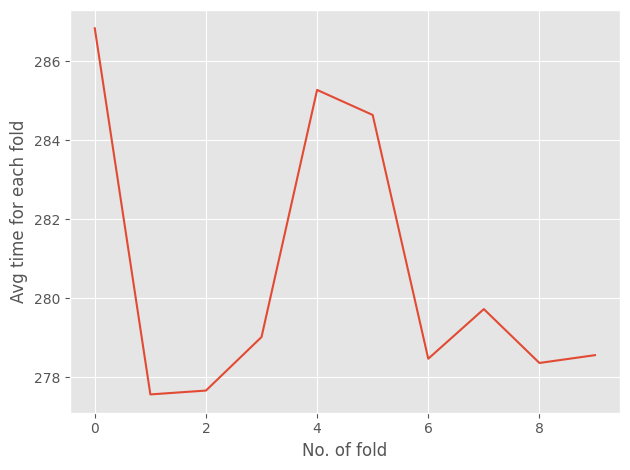

In [114]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(times_cb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cb times")
plt.show()

In [115]:
from sklearn.metrics import accuracy_score
acc_scores_cb = []
for i in range(len(y_test_all)):
    acc_scores_cb.append(accuracy_score(y_test_all[i],scores_cb[i]))

In [116]:
acc_scores_cb

[0.45364238410596025,
 0.4205298013245033,
 0.47019867549668876,
 0.44039735099337746,
 0.4337748344370861,
 0.4205298013245033,
 0.4337748344370861,
 0.39072847682119205,
 0.40397350993377484,
 0.47019867549668876]

In [117]:
df_acc = pd.DataFrame([acc_scores_cb])

df_acc.to_csv('cb_accuracy', index=False)

df_acc = pd.read_csv('cb_accuracy')

acc_scores_cb = df_acc.iloc[0].values

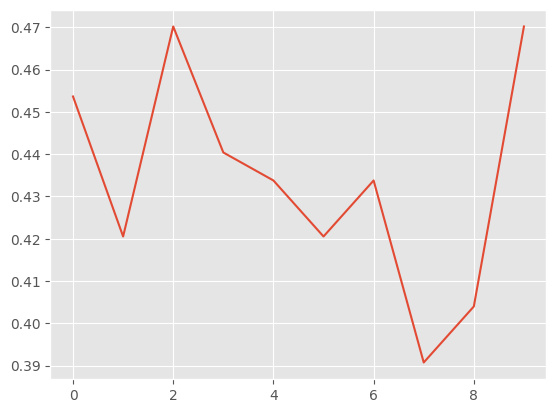

In [118]:
# import seaborn as sns
# sns.histplot(data=acc_scores,bins=20, kde=True)
import matplotlib.pyplot as plt
plt.plot(acc_scores_cb)
plt.style.use('ggplot')
plt.savefig("Catboost acc scores")
plt.show()

In [119]:
scores_cb_n = np.array(scores_cb)
y_test_all_n = np.array(y_test_all)

scores_cb_n = scores_cb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [120]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_cb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 43.38%


In [121]:
import gc
gc.collect()

3653

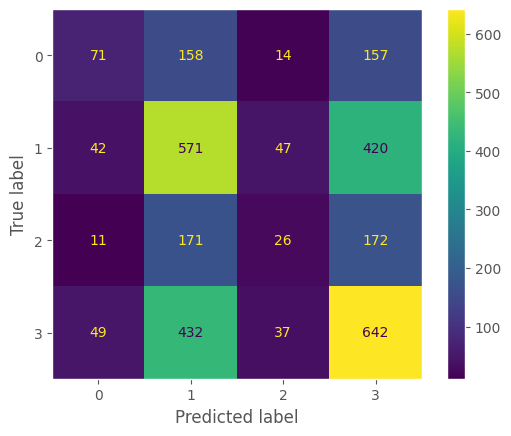

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_cb_n, labels=cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("Catboost")

plt.show()

In [123]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_cb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.41      0.18      0.25       400
           1       0.43      0.53      0.47      1080
           2       0.21      0.07      0.10       380
           3       0.46      0.55      0.50      1160

    accuracy                           0.43      3020
   macro avg       0.38      0.33      0.33      3020
weighted avg       0.41      0.43      0.41      3020



In [124]:
times_svm_n = [i/60 for i in times_svm]
times_dtc_n = [i/60 for i in times_dtc]
times_rdf_n = [i/60 for i in times_rdf]
times_knn_n = [i/60 for i in times_knn]
times_nb_n = [i/60 for i in times_nb]
times_xg_n = [i/60 for i in times_xg]
times_cb_n = [i/60 for i in times_cb]

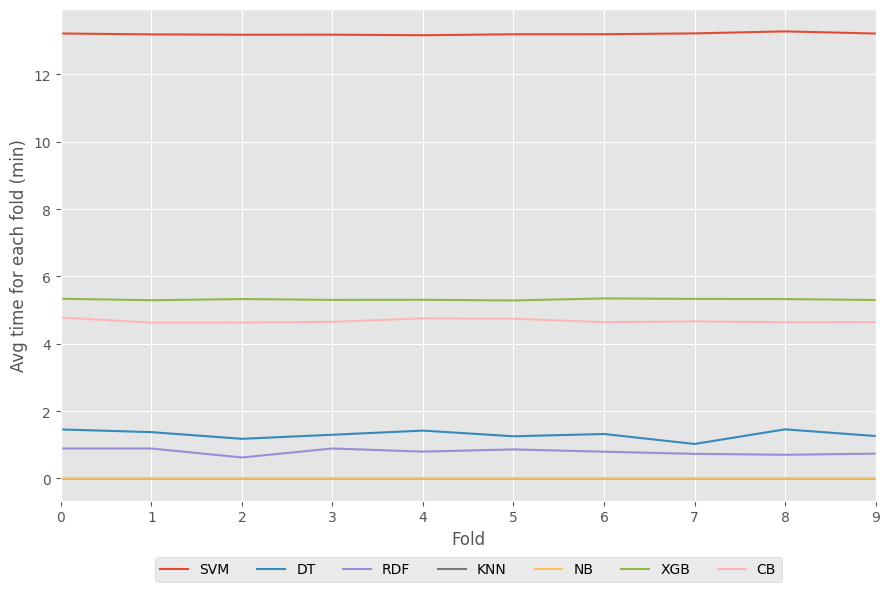

In [125]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(times_svm_n,label='SVM')
plt.plot(times_dtc_n,label='DT')
plt.plot(times_rdf_n,label='RDF')
plt.plot(times_knn_n,label='KNN')
plt.plot(times_nb_n,label='NB')
plt.plot(times_xg_n,label='XGB')
plt.plot(times_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Avg time for each fold (min)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=7)
plt.xlim([0,9])
plt.tight_layout()
plt.savefig("Machine Learning Melspec Times")
plt.show()

In [126]:
acc_scores_svm_n = [i*100 for i in acc_scores_svm]
acc_scores_dtc_n = [i*100 for i in acc_scores_dtc]
acc_scores_rdf_n = [i*100 for i in acc_scores_rdf]
acc_scores_knn_n = [i*100 for i in acc_scores_knn]
acc_scores_nb_n = [i*100 for i in acc_scores_nb]
acc_scores_xg_n = [i*100 for i in acc_scores_xg]
acc_scores_cb_n = [i*100 for i in acc_scores_cb]

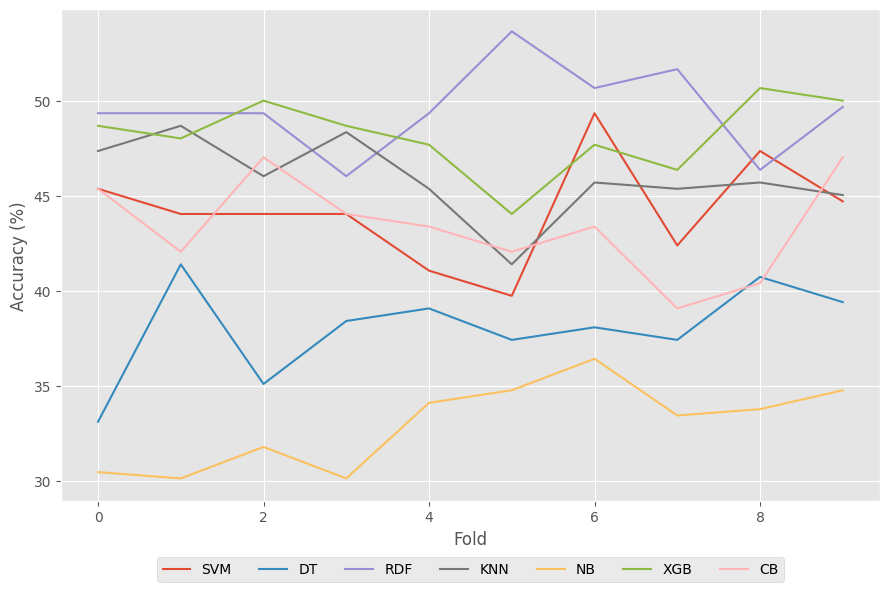

In [127]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(acc_scores_svm_n,label='SVM')
plt.plot(acc_scores_dtc_n,label='DT')
plt.plot(acc_scores_rdf_n,label='RDF')
plt.plot(acc_scores_knn_n,label='KNN')
plt.plot(acc_scores_nb_n,label='NB')
plt.plot(acc_scores_xg_n,label='XGB')
plt.plot(acc_scores_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),ncol=7)
plt.tight_layout()
plt.savefig("Machine Learning Melspec Accuracy")
plt.show()

# LSTM

In [156]:
import gc
gc.collect()

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [159]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_lstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_lstm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=17, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 10, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [160]:
def create_model_lstm():
    
    model_lstm = keras.Sequential([

        keras.layers.LSTM(256,activation='tanh',input_shape=(X.shape[1],X.shape[2]),return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(128,activation='tanh',return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(64,activation='tanh'),
        keras.layers.Dropout(0.25),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_lstm

In [161]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_lstm = []
y_test_all_lstm = []
train_acc_lstm = []
test_acc_lstm = []
train_loss_lstm = []
test_loss_lstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_lstm.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_lstm = None
    model_lstm = create_model_lstm()
        
    model_lstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_lstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_lstm.predict(X_test)
    
    scores_lstm.append(x)
    train_acc_lstm.append(history.history["accuracy"])
    test_acc_lstm.append(history.history["val_accuracy"])
    train_loss_lstm.append(history.history["loss"])
    test_loss_lstm.append(history.history["val_loss"])
    
    gc.collect()

In [162]:
import gc
gc.collect()

In [163]:
import matplotlib.pyplot as plt

times_lstm_n = np.zeros((10,100))
for i, row in enumerate(times_lstm):
    times_lstm_n[i, :len(row)] = row

times_lstm_n_n = np.mean(times_lstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_lstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("lstm times")
plt.show()

In [164]:
train_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_lstm):
    train_acc_lstm_n[i, :len(row)] = row
    
test_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_lstm):
    test_acc_lstm_n[i, :len(row)] = row
    
train_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_lstm):
    train_loss_lstm_n[i, :len(row)] = row
    
test_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_lstm):
    test_loss_lstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_lstm_n = np.mean(train_acc_lstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_lstm_n = np.mean(test_acc_lstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_lstm_n = np.mean(train_loss_lstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_lstm_n = np.mean(test_loss_lstm_n,axis=0)

In [165]:
data = [train_acc_lstm_n,test_acc_lstm_n,train_loss_lstm_n,test_loss_lstm_n]

df = pd.DataFrame(data)
df.to_csv('lstm_acc', index=False)
df = pd.read_csv('lstm_acc')

train_acc_lstm_n = df.iloc[0]
test_acc_lstm_n = df.iloc[1]
train_loss_lstm_n = df.iloc[2]
test_loss_lstm_n = df.iloc[3]


df_t = pd.DataFrame([times_lstm_n_n])
df_t.to_csv('lstm_times', index=False)
df_t = pd.read_csv('lstm_times')

times_lstm_n_n = df_t.iloc[0]

In [166]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_lstm_n, label='Training Accuracy')
axs[0].plot(test_acc_lstm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_lstm_n, label='Training Loss')
axs[1].plot(test_loss_lstm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("LSTM Training and Testing Loss")
plt.show()

In [167]:
np.array(scores_lstm).shape

In [168]:
np.array(y_test_all_lstm).shape

In [169]:
y_pred_lstm = np.argmax(scores_lstm,axis=2)

In [170]:
y_pred_lstm.shape

In [171]:
from sklearn.metrics import accuracy_score
acc_scores_lstm = []
for i in range(len(y_test_all_lstm)):
    acc_scores_lstm.append(accuracy_score(y_true = y_test_all_lstm[i],y_pred = y_pred_lstm[i]))

In [172]:
acc_scores_lstm

In [173]:
df_acc = pd.DataFrame([acc_scores_lstm])

df_acc.to_csv('lstm_accuracy', index=False)

df_acc = pd.read_csv('lstm_accuracy')

acc_scores_lstm = df_acc.iloc[0].values

In [174]:
y_test_all_n = np.array(y_test_all_lstm)

y_pred_lstm_n = y_pred_lstm.flatten()
y_test_all_n = y_test_all_n.flatten()

In [175]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_lstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("LSTM")

plt.show()

In [176]:
import gc
gc.collect()

In [177]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_lstm_n)
print(cf_r)

# BISLTM

In [178]:
import gc
gc.collect()

In [179]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_bilstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_bilstm.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [180]:
from keras.layers import LSTM

In [181]:
def create_model_bilstm():
    
    model_bilstm = keras.Sequential([

        keras.layers.Bidirectional(LSTM(100,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_bilstm

In [182]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_bilstm = []
y_test_all_bilstm = []
train_acc_bilstm = []
test_acc_bilstm = []
train_loss_bilstm = []
test_loss_bilstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_bilstm.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_bilstm = None
    model_bilstm = create_model_bilstm()
        
    model_bilstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_bilstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=64, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_bilstm.predict(X_test)
    
    scores_bilstm.append(x)
    train_acc_bilstm.append(history.history["accuracy"])
    test_acc_bilstm.append(history.history["val_accuracy"])
    train_loss_bilstm.append(history.history["loss"])
    test_loss_bilstm.append(history.history["val_loss"])
    
    gc.collect()


Epoch 94: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 94: 4.24 seconds
39/39 [==============================] - 4s 109ms/step - loss: 1.0701 - accuracy: 0.5184 - val_loss: 1.0862 - val_accuracy: 0.4963 - lr: 8.1920e-13
Epoch 95/100
39/39 [==============================] - 4s 107ms/step - loss: 1.0729 - accuracy: 0.5225 - val_loss: 1.0862 - val_accuracy: 0.4963 - lr: 1.6384e-13
Epoch 96/100
39/39 [==============================] - 5s 117ms/step - loss: 1.0691 - accuracy: 0.5204 - val_loss: 1.0862 - val_accuracy: 0.4963 - lr: 1.6384e-13
Epoch 97/100
39/39 [==============================] - 4s 108ms/step - loss: 1.0734 - accuracy: 0.5262 - val_loss: 1.0862 - val_accuracy: 0.4963 - lr: 1.6384e-13
Epoch 98/100
39/39 [==============================] - 4s 103ms/step - loss: 1.0669 - accuracy: 0.5204 - val_loss: 1.0862 - val_accuracy: 0.4963 - lr: 1.6384e-13
Epoch 99/100
39/39 [==============================] - ETA: 0s - loss: 1.0694 - accuracy: 0.

39/39 [==============================] - 6s 151ms/step - loss: 1.1482 - accuracy: 0.4669 - val_loss: 1.1996 - val_accuracy: 0.4007 - lr: 8.0000e-06
Epoch 23/100
39/39 [==============================] - 6s 143ms/step - loss: 1.1492 - accuracy: 0.4567 - val_loss: 1.1986 - val_accuracy: 0.3971 - lr: 8.0000e-06
Epoch 24/100
39/39 [==============================] - 5s 130ms/step - loss: 1.1497 - accuracy: 0.4575 - val_loss: 1.1965 - val_accuracy: 0.4044 - lr: 8.0000e-06
Epoch 25/100
39/39 [==============================] - 6s 144ms/step - loss: 1.1456 - accuracy: 0.4612 - val_loss: 1.1957 - val_accuracy: 0.4081 - lr: 8.0000e-06
Epoch 26/100
39/39 [==============================] - ETA: 0s - loss: 1.1428 - accuracy: 0.4697
Epoch 26: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 26: 5.37 seconds
39/39 [==============================] - 5s 138ms/step - loss: 1.1428 - accuracy: 0.4697 - val_loss: 1.1937 - val_accuracy: 0.4081 - lr: 8.0000e-06
Epoch 27/

Epoch 50/100
39/39 [==============================] - 4s 115ms/step - loss: 1.1428 - accuracy: 0.4714 - val_loss: 1.1925 - val_accuracy: 0.4081 - lr: 2.5600e-09
Epoch 51/100
39/39 [==============================] - ETA: 0s - loss: 1.1422 - accuracy: 0.4685
Epoch 51: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 51: 4.53 seconds
39/39 [==============================] - 5s 116ms/step - loss: 1.1422 - accuracy: 0.4685 - val_loss: 1.1925 - val_accuracy: 0.4081 - lr: 2.5600e-09
Epoch 52/100
39/39 [==============================] - 5s 118ms/step - loss: 1.1439 - accuracy: 0.4599 - val_loss: 1.1925 - val_accuracy: 0.4081 - lr: 5.1200e-10
Epoch 53/100
39/39 [==============================] - 5s 122ms/step - loss: 1.1409 - accuracy: 0.4579 - val_loss: 1.1925 - val_accuracy: 0.4081 - lr: 5.1200e-10
Epoch 54/100
39/39 [==============================] - 5s 121ms/step - loss: 1.1439 - accuracy: 0.4677 - val_loss: 1.1925 - val_accuracy: 0.4081 - lr: 5.1200e-10

Epoch 78/100
39/39 [==============================] - 5s 130ms/step - loss: 1.1436 - accuracy: 0.4763 - val_loss: 1.1925 - val_accuracy: 0.4081 - lr: 1.6384e-13
Epoch 79/100
39/39 [==============================] - 5s 127ms/step - loss: 1.1373 - accuracy: 0.4665 - val_loss: 1.1925 - val_accuracy: 0.4081 - lr: 1.6384e-13
Epoch 80/100
39/39 [==============================] - 4s 115ms/step - loss: 1.1387 - accuracy: 0.4685 - val_loss: 1.1925 - val_accuracy: 0.4081 - lr: 1.6384e-13
Epoch 81/100
39/39 [==============================] - ETA: 0s - loss: 1.1407 - accuracy: 0.4632
Epoch 81: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 81: 4.80 seconds
39/39 [==============================] - 5s 123ms/step - loss: 1.1407 - accuracy: 0.4632 - val_loss: 1.1925 - val_accuracy: 0.4081 - lr: 1.6384e-13
Epoch 82/100
39/39 [==============================] - 5s 124ms/step - loss: 1.1373 - accuracy: 0.4710 - val_loss: 1.1925 - val_accuracy: 0.4081 - lr: 3.2768e

In [183]:
import gc
gc.collect()

0

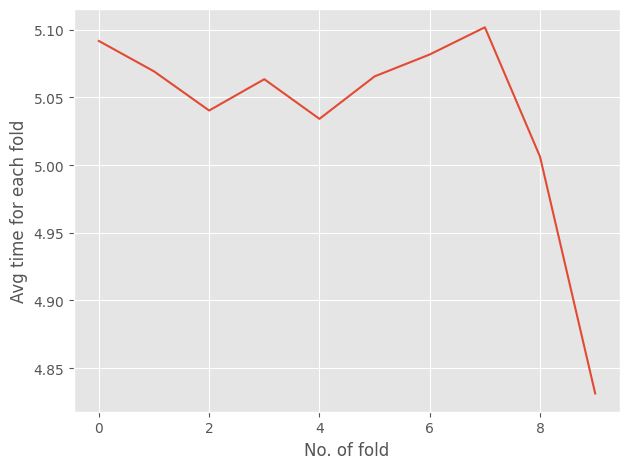

In [184]:
import matplotlib.pyplot as plt

times_bilstm_n = np.zeros((10,100))
for i, row in enumerate(times_bilstm):
    times_bilstm_n[i, :len(row)] = row

times_bilstm_n_n = np.mean(times_bilstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_bilstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("bilstm times")
plt.show()

In [185]:
train_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_bilstm):
    train_acc_bilstm_n[i, :len(row)] = row
    
test_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_bilstm):
    test_acc_bilstm_n[i, :len(row)] = row
    
train_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_bilstm):
    train_loss_bilstm_n[i, :len(row)] = row
    
test_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_bilstm):
    test_loss_bilstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_bilstm_n = np.mean(train_acc_bilstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_bilstm_n = np.mean(test_acc_bilstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_bilstm_n = np.mean(train_loss_bilstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_bilstm_n = np.mean(test_loss_bilstm_n,axis=0)

In [186]:
train_acc_bilstm_n

array([0.37739165, 0.39206868, 0.40282093, 0.40102208, 0.40805396,
       0.40977105, 0.41095667, 0.40621423, 0.41725265, 0.41917416,
       0.41680294, 0.41586263, 0.42714636, 0.43650858, 0.43495503,
       0.4311529 , 0.43250204, 0.43585446, 0.44190515, 0.44582993,
       0.44693377, 0.45396566, 0.46140638, 0.45960752, 0.45874898,
       0.46169256, 0.46300082, 0.4649632 , 0.47264922, 0.47093214,
       0.47273099, 0.46864268, 0.47174979, 0.47313982, 0.4736713 ,
       0.47694194, 0.4758381 , 0.47583809, 0.47575634, 0.47694195,
       0.4744072 , 0.47412102, 0.47399836, 0.47665576, 0.47914964,
       0.47485691, 0.4794767 , 0.47722813, 0.47735078, 0.47616517,
       0.47542926, 0.47673754, 0.47759607, 0.47968111, 0.47698282,
       0.47563369, 0.47354865, 0.47747342, 0.47718724, 0.47596075,
       0.47297629, 0.4751022 , 0.47571545, 0.47530662, 0.47522486,
       0.47493868, 0.47771872, 0.47759609, 0.47673753, 0.47522486,
       0.47641047, 0.47829109, 0.47649223, 0.47624694, 0.48029

In [187]:
data = [train_acc_bilstm_n,test_acc_bilstm_n,train_loss_bilstm_n,test_loss_bilstm_n]

df = pd.DataFrame(data)
df.to_csv('bilstm_acc', index=False)
df = pd.read_csv('bilstm_acc')

train_acc_bilstm_n = df.iloc[0]
test_acc_bilstm_n = df.iloc[1]
train_loss_bilstm_n = df.iloc[2]
test_loss_bilstm_n = df.iloc[3]


df_t = pd.DataFrame([times_bilstm_n_n])
df_t.to_csv('bilstm_times', index=False)
df_t = pd.read_csv('bilstm_times')

times_bilstm_n_n = df_t.iloc[0]

In [188]:
train_acc_bilstm_n

0     0.377392
1     0.392069
2     0.402821
3     0.401022
4     0.408054
        ...   
95    0.475225
96    0.477024
97    0.475225
98    0.476778
99    0.475307
Name: 0, Length: 100, dtype: float64

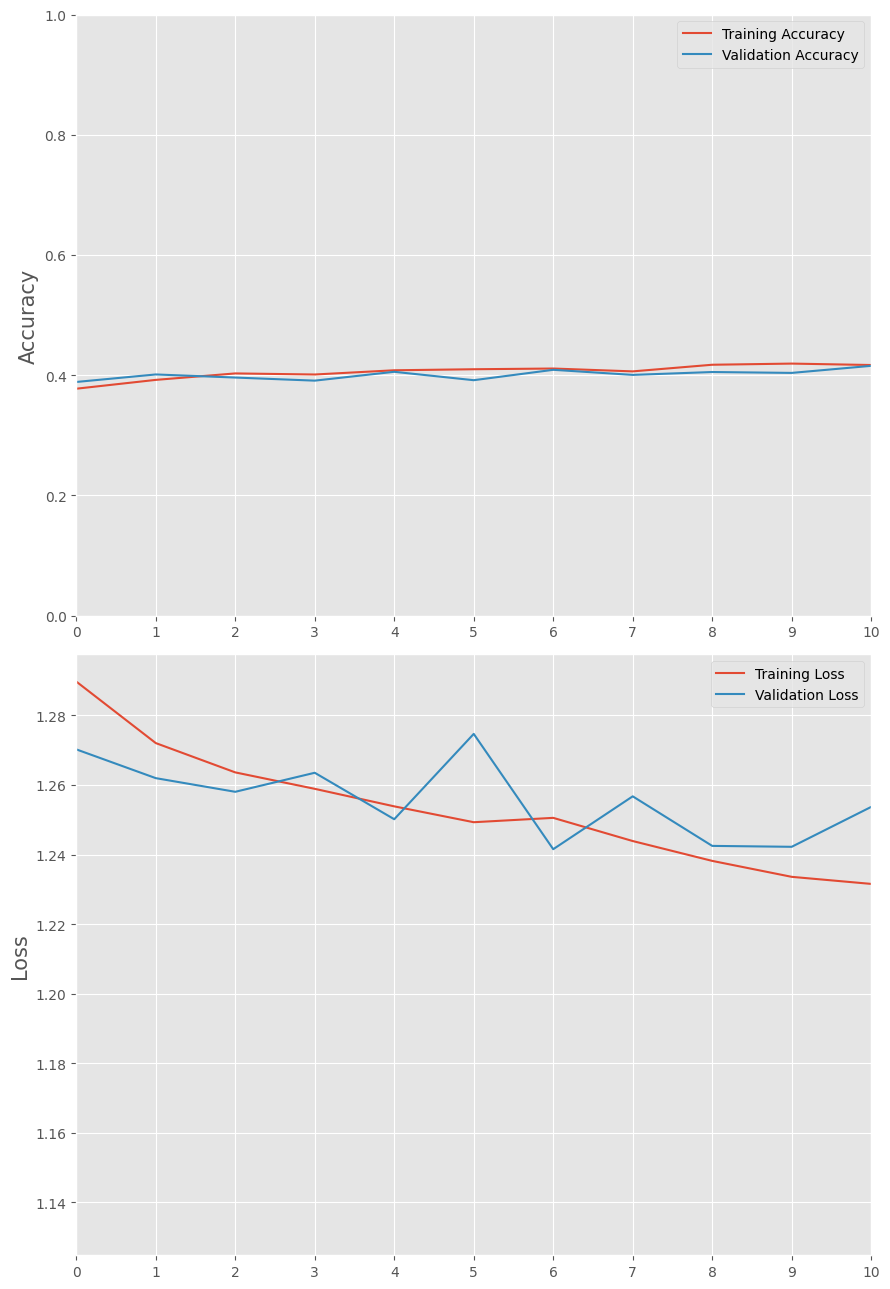

In [189]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_bilstm_n, label='Training Accuracy')
axs[0].plot(test_acc_bilstm_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_bilstm_n, label='Training Loss')
axs[1].plot(test_loss_bilstm_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("BILSTM Training and Testing Loss")
plt.show()

In [190]:
np.array(scores_bilstm).shape

(10, 302, 4)

In [191]:
np.array(y_test_all_bilstm).shape

(10, 302)

In [192]:
y_pred_bilstm = np.argmax(scores_bilstm,axis=2)

In [193]:
y_pred_bilstm.shape

(10, 302)

In [194]:
from sklearn.metrics import accuracy_score
acc_scores_bilstm = []
for i in range(len(y_test_all_bilstm)):
    acc_scores_bilstm.append(accuracy_score(y_true = y_test_all_bilstm[i],y_pred = y_pred_bilstm[i]))

In [195]:
acc_scores_bilstm

[0.41721854304635764,
 0.4337748344370861,
 0.44039735099337746,
 0.44039735099337746,
 0.4337748344370861,
 0.44370860927152317,
 0.48013245033112584,
 0.4370860927152318,
 0.5033112582781457,
 0.4503311258278146]

In [196]:
df_acc = pd.DataFrame([acc_scores_bilstm])

df_acc.to_csv('bilstm_accuracy', index=False)

df_acc = pd.read_csv('bilstm_accuracy')

acc_scores_bilstm = df_acc.iloc[0].values

In [197]:
y_test_all_n = np.array(y_test_all_bilstm)

y_pred_bilstm_n = y_pred_bilstm.flatten()
y_test_all_n = y_test_all_n.flatten()

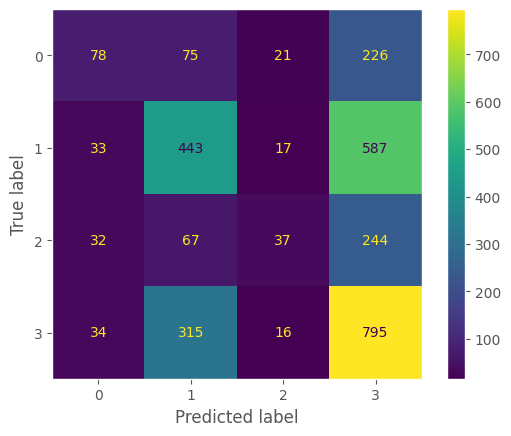

In [198]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_bilstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("BISLTM")

plt.show()

In [199]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_bilstm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.44      0.20      0.27       400
           1       0.49      0.41      0.45      1080
           2       0.41      0.10      0.16       380
           3       0.43      0.69      0.53      1160

    accuracy                           0.45      3020
   macro avg       0.44      0.35      0.35      3020
weighted avg       0.45      0.45      0.42      3020



# BRNN

In [200]:
import gc
gc.collect()

29973

In [201]:
# X,y = load_data(DATA_PATH)

In [202]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

In [203]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_birnn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_birnn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [204]:
def create_model_birnn():

    model_birnn = keras.Sequential([

        keras.layers.Bidirectional(SimpleRNN(256,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(128,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(64)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(units = 4,activation='softmax')

    ])
    return model_birnn

In [205]:
import gc
gc.collect()

5

In [206]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_birnn = []
y_test_all_birnn = []
train_acc_birnn = []
test_acc_birnn = []
train_loss_birnn = []
test_loss_birnn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_birnn.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_birnn = None
    model_birnn = create_model_birnn()
        
    model_birnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_birnn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_birnn.predict(X_test)
    
    scores_birnn.append(x)
    train_acc_birnn.append(history.history["accuracy"])
    test_acc_birnn.append(history.history["val_accuracy"])
    train_loss_birnn.append(history.history["loss"])
    test_loss_birnn.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 70s 891ms/step - loss: 1.7681 - accuracy: 0.3152 - val_loss: 1.3308 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 70s 908ms/step - loss: 1.6236 - accuracy: 0.3385 - val_loss: 1.2810 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 68s 886ms/step - loss: 1.5314 - accuracy: 0.3442 - val_loss: 1.3118 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 68s 879ms/step - loss: 1.4817 - accuracy: 0.3451 - val_loss: 1.2591 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 68s 886ms/step - loss: 1.4449 - accuracy: 0.3451 - val_loss: 1.2838 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 67s 865ms/step - loss: 1.4073 - accuracy: 0.3540 - val_loss: 1.2609 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 30/100
77/77 [==============================] - ETA: 0s - loss: 1.2891 - accuracy: 0.3786
Epoch 30: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 30: 68.18 seconds
77/77 [==============================] - 68s 885ms/step - loss: 1.2891 - accuracy: 0.3786 - val_loss: 1.2628 - val_accuracy: 0.3860 - lr: 4.0000e-05
Epoch 31/100
77/77 [==============================] - 65s 847ms/step - loss: 1.2871 - accuracy: 0.3823 - val_loss: 1.2625 - val_accuracy: 0.3860 - lr: 8.0000e-06
Epoch 32/100
77/77 [==============================] - 68s 889ms/step - loss: 1.2968 - accuracy: 0.3704 - val_loss: 1.2625 - val_accuracy: 0.3860 - lr: 8.0000e-06
Epoch 33/100
77/77 [==============================] - 67s 879ms/step - loss: 1.2891 - accuracy: 0.3888 - val_loss: 1.2625 - val_accuracy: 0.3860 - lr: 8.0000e-06
Epoch 34/100
77/77 [==============================] - 68s 890ms/step - loss: 1.2981 - accuracy: 0.3667 - val_loss: 1.2623 - val_accuracy: 0.3860 - lr: 8.

Epoch 58/100
77/77 [==============================] - ETA: 0s - loss: 1.2789 - accuracy: 0.3708
Epoch 58: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 58: 67.98 seconds
77/77 [==============================] - 68s 882ms/step - loss: 1.2789 - accuracy: 0.3708 - val_loss: 1.2621 - val_accuracy: 0.3860 - lr: 6.4000e-08
Epoch 59/100
77/77 [==============================] - 67s 878ms/step - loss: 1.2931 - accuracy: 0.3769 - val_loss: 1.2621 - val_accuracy: 0.3860 - lr: 1.2800e-08
Epoch 60/100
77/77 [==============================] - 70s 904ms/step - loss: 1.2889 - accuracy: 0.3704 - val_loss: 1.2621 - val_accuracy: 0.3860 - lr: 1.2800e-08
Epoch 61/100
77/77 [==============================] - 68s 877ms/step - loss: 1.2855 - accuracy: 0.3900 - val_loss: 1.2621 - val_accuracy: 0.3860 - lr: 1.2800e-08
Epoch 62/100
77/77 [==============================] - 68s 878ms/step - loss: 1.2872 - accuracy: 0.3790 - val_loss: 1.2621 - val_accuracy: 0.3860 - lr: 1

Epoch 86/100
77/77 [==============================] - ETA: 0s - loss: 1.2861 - accuracy: 0.3818
Epoch 86: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 86: 69.26 seconds
77/77 [==============================] - 69s 902ms/step - loss: 1.2861 - accuracy: 0.3818 - val_loss: 1.2621 - val_accuracy: 0.3860 - lr: 1.0240e-10
Epoch 87/100
77/77 [==============================] - 69s 896ms/step - loss: 1.2896 - accuracy: 0.3765 - val_loss: 1.2621 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 88/100
77/77 [==============================] - 69s 891ms/step - loss: 1.2998 - accuracy: 0.3729 - val_loss: 1.2621 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 89/100
77/77 [==============================] - 68s 883ms/step - loss: 1.2970 - accuracy: 0.3733 - val_loss: 1.2621 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 90/100
77/77 [==============================] - 69s 896ms/step - loss: 1.2860 - accuracy: 0.3814 - val_loss: 1.2621 - val_accuracy: 0.3860 - lr: 2

Epoch 14/100
77/77 [==============================] - 70s 911ms/step - loss: 1.2985 - accuracy: 0.3643 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - 69s 899ms/step - loss: 1.2962 - accuracy: 0.3745 - val_loss: 1.2702 - val_accuracy: 0.3456 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - ETA: 0s - loss: 1.2878 - accuracy: 0.3630
Epoch 16: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 16: 69.23 seconds
77/77 [==============================] - 69s 900ms/step - loss: 1.2878 - accuracy: 0.3630 - val_loss: 1.2675 - val_accuracy: 0.4007 - lr: 2.0000e-04
Epoch 17/100
77/77 [==============================] - 67s 878ms/step - loss: 1.2951 - accuracy: 0.3802 - val_loss: 1.2676 - val_accuracy: 0.4007 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 71s 919ms/step - loss: 1.2895 - accuracy: 0.3774 - val_loss: 1.2677 - val_accuracy: 0.4007 - lr: 4

Epoch 42/100
77/77 [==============================] - 68s 888ms/step - loss: 1.2913 - accuracy: 0.3651 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - 72s 939ms/step - loss: 1.3008 - accuracy: 0.3598 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - ETA: 0s - loss: 1.2828 - accuracy: 0.3778
Epoch 44: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 44: 70.20 seconds
77/77 [==============================] - 70s 911ms/step - loss: 1.2828 - accuracy: 0.3778 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 3.2000e-07
Epoch 45/100
77/77 [==============================] - 70s 914ms/step - loss: 1.2833 - accuracy: 0.3782 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 68s 883ms/step - loss: 1.2926 - accuracy: 0.3786 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 6.

Epoch 70/100
77/77 [==============================] - 70s 915ms/step - loss: 1.2857 - accuracy: 0.3786 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - 71s 924ms/step - loss: 1.2791 - accuracy: 0.3843 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - ETA: 0s - loss: 1.2898 - accuracy: 0.3724
Epoch 72: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 72: 68.65 seconds
77/77 [==============================] - 69s 892ms/step - loss: 1.2898 - accuracy: 0.3724 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 5.1200e-10
Epoch 73/100
77/77 [==============================] - 69s 891ms/step - loss: 1.2847 - accuracy: 0.3872 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 69s 892ms/step - loss: 1.2915 - accuracy: 0.3696 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 1

Epoch 98/100
77/77 [==============================] - 68s 884ms/step - loss: 1.2899 - accuracy: 0.3761 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - 69s 896ms/step - loss: 1.2885 - accuracy: 0.3577 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 8.1920e-13
Epoch 100/100
77/77 [==============================] - ETA: 0s - loss: 1.2872 - accuracy: 0.3700
Epoch 100: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 100: 69.42 seconds
10/10 [==============================] - 2s 217ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 74s 927ms/step - loss: 1.7348 - accuracy: 0.3258 - val_loss: 1.2840 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 71s 930ms/step - loss: 1.6477 - accuracy: 0.3222 - val_loss: 1.2563 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 71s 922ms/ste

Epoch 26/100
77/77 [==============================] - 70s 904ms/step - loss: 1.3062 - accuracy: 0.3712 - val_loss: 1.2333 - val_accuracy: 0.4118 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 70s 914ms/step - loss: 1.2933 - accuracy: 0.3716 - val_loss: 1.2332 - val_accuracy: 0.4118 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 71s 923ms/step - loss: 1.3026 - accuracy: 0.3549 - val_loss: 1.2333 - val_accuracy: 0.4118 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - 71s 916ms/step - loss: 1.3170 - accuracy: 0.3561 - val_loss: 1.2333 - val_accuracy: 0.4118 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - ETA: 0s - loss: 1.2957 - accuracy: 0.3635
Epoch 30: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 30: 69.60 seconds
77/77 [==============================] - 70s 903ms/step - loss: 1.2957 - accuracy: 0.3635 - val_loss: 1.2335 - val_accuracy: 0.4118 - lr: 8

Epoch 54/100
77/77 [==============================] - 70s 904ms/step - loss: 1.2948 - accuracy: 0.3708 - val_loss: 1.2334 - val_accuracy: 0.4118 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 70s 904ms/step - loss: 1.3000 - accuracy: 0.3663 - val_loss: 1.2334 - val_accuracy: 0.4118 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 69s 892ms/step - loss: 1.3017 - accuracy: 0.3581 - val_loss: 1.2334 - val_accuracy: 0.4118 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - 71s 918ms/step - loss: 1.2955 - accuracy: 0.3782 - val_loss: 1.2334 - val_accuracy: 0.4118 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - ETA: 0s - loss: 1.3064 - accuracy: 0.3757
Epoch 58: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 58: 70.64 seconds
77/77 [==============================] - 71s 917ms/step - loss: 1.3064 - accuracy: 0.3757 - val_loss: 1.2334 - val_accuracy: 0.4118 - lr: 1

Epoch 82/100
77/77 [==============================] - 70s 914ms/step - loss: 1.2914 - accuracy: 0.3761 - val_loss: 1.2334 - val_accuracy: 0.4118 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 71s 925ms/step - loss: 1.3054 - accuracy: 0.3491 - val_loss: 1.2334 - val_accuracy: 0.4118 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 69s 904ms/step - loss: 1.3067 - accuracy: 0.3753 - val_loss: 1.2334 - val_accuracy: 0.4118 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - 71s 926ms/step - loss: 1.2977 - accuracy: 0.3708 - val_loss: 1.2334 - val_accuracy: 0.4118 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - ETA: 0s - loss: 1.2962 - accuracy: 0.3655
Epoch 86: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 86: 71.96 seconds
77/77 [==============================] - 72s 935ms/step - loss: 1.2962 - accuracy: 0.3655 - val_loss: 1.2334 - val_accuracy: 0.4118 - lr: 2.

77/77 [==============================] - 69s 895ms/step - loss: 1.3179 - accuracy: 0.3606 - val_loss: 1.2790 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 70s 906ms/step - loss: 1.3125 - accuracy: 0.3684 - val_loss: 1.2740 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 71s 919ms/step - loss: 1.2918 - accuracy: 0.3692 - val_loss: 1.2797 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - ETA: 0s - loss: 1.2885 - accuracy: 0.3876
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 13: 68.29 seconds
77/77 [==============================] - 68s 889ms/step - loss: 1.2885 - accuracy: 0.3876 - val_loss: 1.2987 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 70s 908ms/step - loss: 1.2882 - accuracy: 0.3810 - val_loss: 1.2745 - val_accuracy: 0.3603 - lr: 2.0000e-04
Epoch 15/100
77/77 

Epoch 38/100
77/77 [==============================] - 66s 864ms/step - loss: 1.2753 - accuracy: 0.3806 - val_loss: 1.2732 - val_accuracy: 0.3640 - lr: 1.6000e-06
Epoch 39/100
77/77 [==============================] - 68s 880ms/step - loss: 1.2842 - accuracy: 0.3786 - val_loss: 1.2732 - val_accuracy: 0.3640 - lr: 1.6000e-06
Epoch 40/100
77/77 [==============================] - 70s 905ms/step - loss: 1.2761 - accuracy: 0.3823 - val_loss: 1.2732 - val_accuracy: 0.3640 - lr: 1.6000e-06
Epoch 41/100
77/77 [==============================] - ETA: 0s - loss: 1.2683 - accuracy: 0.3810
Epoch 41: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 41: 69.99 seconds
77/77 [==============================] - 70s 910ms/step - loss: 1.2683 - accuracy: 0.3810 - val_loss: 1.2732 - val_accuracy: 0.3640 - lr: 1.6000e-06
Epoch 42/100
77/77 [==============================] - 67s 876ms/step - loss: 1.2706 - accuracy: 0.3818 - val_loss: 1.2732 - val_accuracy: 0.3640 - lr: 3.

Epoch 66/100
77/77 [==============================] - 68s 880ms/step - loss: 1.2679 - accuracy: 0.3839 - val_loss: 1.2732 - val_accuracy: 0.3640 - lr: 2.5600e-09
Epoch 67/100
77/77 [==============================] - 69s 891ms/step - loss: 1.2759 - accuracy: 0.3810 - val_loss: 1.2732 - val_accuracy: 0.3640 - lr: 2.5600e-09
Epoch 68/100
77/77 [==============================] - 69s 894ms/step - loss: 1.2755 - accuracy: 0.3712 - val_loss: 1.2732 - val_accuracy: 0.3640 - lr: 2.5600e-09
Epoch 69/100
77/77 [==============================] - ETA: 0s - loss: 1.2789 - accuracy: 0.3778
Epoch 69: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 69: 70.95 seconds
77/77 [==============================] - 71s 922ms/step - loss: 1.2789 - accuracy: 0.3778 - val_loss: 1.2732 - val_accuracy: 0.3640 - lr: 2.5600e-09
Epoch 70/100
77/77 [==============================] - 68s 892ms/step - loss: 1.2739 - accuracy: 0.3810 - val_loss: 1.2732 - val_accuracy: 0.3640 - lr: 5.12

Epoch 94/100
77/77 [==============================] - 69s 893ms/step - loss: 1.2694 - accuracy: 0.3876 - val_loss: 1.2732 - val_accuracy: 0.3640 - lr: 4.0960e-12
Epoch 95/100
77/77 [==============================] - 68s 884ms/step - loss: 1.2700 - accuracy: 0.3859 - val_loss: 1.2732 - val_accuracy: 0.3640 - lr: 4.0960e-12
Epoch 96/100
77/77 [==============================] - 68s 888ms/step - loss: 1.2707 - accuracy: 0.3913 - val_loss: 1.2732 - val_accuracy: 0.3640 - lr: 4.0960e-12
Epoch 97/100
77/77 [==============================] - ETA: 0s - loss: 1.2737 - accuracy: 0.3863
Epoch 97: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 97: 69.56 seconds
77/77 [==============================] - 70s 903ms/step - loss: 1.2737 - accuracy: 0.3863 - val_loss: 1.2732 - val_accuracy: 0.3640 - lr: 4.0960e-12
Epoch 98/100
77/77 [==============================] - 69s 893ms/step - loss: 1.2730 - accuracy: 0.3839 - val_loss: 1.2732 - val_accuracy: 0.3640 - lr: 8.

Epoch 50/100
77/77 [==============================] - 69s 896ms/step - loss: 1.2799 - accuracy: 0.3737 - val_loss: 1.2502 - val_accuracy: 0.3640 - lr: 3.2000e-07
Epoch 51/100
77/77 [==============================] - 65s 848ms/step - loss: 1.2858 - accuracy: 0.3630 - val_loss: 1.2501 - val_accuracy: 0.3640 - lr: 3.2000e-07
Epoch 52/100
77/77 [==============================] - ETA: 0s - loss: 1.2823 - accuracy: 0.3712
Epoch 52: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 52: 66.45 seconds
77/77 [==============================] - 66s 863ms/step - loss: 1.2823 - accuracy: 0.3712 - val_loss: 1.2501 - val_accuracy: 0.3640 - lr: 3.2000e-07
Epoch 53/100
77/77 [==============================] - 67s 872ms/step - loss: 1.2825 - accuracy: 0.3753 - val_loss: 1.2501 - val_accuracy: 0.3640 - lr: 6.4000e-08
Epoch 54/100
77/77 [==============================] - 67s 877ms/step - loss: 1.2842 - accuracy: 0.3786 - val_loss: 1.2501 - val_accuracy: 0.3640 - lr: 6.

Epoch 78/100
77/77 [==============================] - 65s 847ms/step - loss: 1.2778 - accuracy: 0.3786 - val_loss: 1.2501 - val_accuracy: 0.3640 - lr: 5.1200e-10
Epoch 79/100
77/77 [==============================] - 66s 856ms/step - loss: 1.2799 - accuracy: 0.3724 - val_loss: 1.2501 - val_accuracy: 0.3640 - lr: 5.1200e-10
Epoch 80/100
77/77 [==============================] - ETA: 0s - loss: 1.2814 - accuracy: 0.3802
Epoch 80: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 80: 64.00 seconds
77/77 [==============================] - 64s 831ms/step - loss: 1.2814 - accuracy: 0.3802 - val_loss: 1.2501 - val_accuracy: 0.3640 - lr: 5.1200e-10
Epoch 81/100
77/77 [==============================] - 67s 875ms/step - loss: 1.2876 - accuracy: 0.3868 - val_loss: 1.2501 - val_accuracy: 0.3640 - lr: 1.0240e-10
Epoch 82/100
77/77 [==============================] - 67s 872ms/step - loss: 1.2877 - accuracy: 0.3831 - val_loss: 1.2501 - val_accuracy: 0.3640 - lr: 1

Epoch 6/100
77/77 [==============================] - 68s 889ms/step - loss: 1.4202 - accuracy: 0.3340 - val_loss: 1.2629 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 69s 887ms/step - loss: 1.3558 - accuracy: 0.3516 - val_loss: 1.2734 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 68s 886ms/step - loss: 1.3547 - accuracy: 0.3614 - val_loss: 1.2487 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 68s 884ms/step - loss: 1.3363 - accuracy: 0.3659 - val_loss: 1.2562 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 69s 896ms/step - loss: 1.3109 - accuracy: 0.3823 - val_loss: 1.2451 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 67s 877ms/step - loss: 1.2997 - accuracy: 0.3565 - val_loss: 1.2439 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 68

Epoch 62/100
77/77 [==============================] - 68s 888ms/step - loss: 1.2745 - accuracy: 0.3737 - val_loss: 1.2423 - val_accuracy: 0.3824 - lr: 1.2800e-08
Epoch 63/100
77/77 [==============================] - 68s 889ms/step - loss: 1.2789 - accuracy: 0.3729 - val_loss: 1.2423 - val_accuracy: 0.3824 - lr: 1.2800e-08
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.2733 - accuracy: 0.3778
Epoch 64: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 64: 67.80 seconds
77/77 [==============================] - 68s 882ms/step - loss: 1.2733 - accuracy: 0.3778 - val_loss: 1.2423 - val_accuracy: 0.3824 - lr: 1.2800e-08
Epoch 65/100
77/77 [==============================] - 67s 877ms/step - loss: 1.2750 - accuracy: 0.3630 - val_loss: 1.2423 - val_accuracy: 0.3824 - lr: 2.5600e-09
Epoch 66/100
77/77 [==============================] - 67s 877ms/step - loss: 1.2750 - accuracy: 0.3790 - val_loss: 1.2423 - val_accuracy: 0.3824 - lr: 2

Epoch 90/100
77/77 [==============================] - 69s 895ms/step - loss: 1.2791 - accuracy: 0.3737 - val_loss: 1.2423 - val_accuracy: 0.3824 - lr: 2.0480e-11
Epoch 91/100
77/77 [==============================] - 68s 886ms/step - loss: 1.2756 - accuracy: 0.3671 - val_loss: 1.2423 - val_accuracy: 0.3824 - lr: 2.0480e-11
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.2769 - accuracy: 0.3847
Epoch 92: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 92: 68.44 seconds
77/77 [==============================] - 68s 889ms/step - loss: 1.2769 - accuracy: 0.3847 - val_loss: 1.2423 - val_accuracy: 0.3824 - lr: 2.0480e-11
Epoch 93/100
77/77 [==============================] - 69s 892ms/step - loss: 1.2757 - accuracy: 0.3786 - val_loss: 1.2423 - val_accuracy: 0.3824 - lr: 4.0960e-12
Epoch 94/100
77/77 [==============================] - 68s 879ms/step - loss: 1.2777 - accuracy: 0.3712 - val_loss: 1.2423 - val_accuracy: 0.3824 - lr: 4.

Epoch 46/100
77/77 [==============================] - 70s 905ms/step - loss: 1.2771 - accuracy: 0.3712 - val_loss: 1.2839 - val_accuracy: 0.3419 - lr: 3.2000e-07
Epoch 47/100
77/77 [==============================] - ETA: 0s - loss: 1.2770 - accuracy: 0.3818
Epoch 47: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 47: 66.20 seconds
77/77 [==============================] - 66s 859ms/step - loss: 1.2770 - accuracy: 0.3818 - val_loss: 1.2839 - val_accuracy: 0.3419 - lr: 3.2000e-07
Epoch 48/100
77/77 [==============================] - 68s 885ms/step - loss: 1.2722 - accuracy: 0.3982 - val_loss: 1.2839 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 72s 936ms/step - loss: 1.2760 - accuracy: 0.3827 - val_loss: 1.2839 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - 67s 874ms/step - loss: 1.2716 - accuracy: 0.4035 - val_loss: 1.2839 - val_accuracy: 0.3419 - lr: 6.

Epoch 74/100
77/77 [==============================] - 69s 902ms/step - loss: 1.2800 - accuracy: 0.3827 - val_loss: 1.2839 - val_accuracy: 0.3419 - lr: 5.1200e-10
Epoch 75/100
77/77 [==============================] - ETA: 0s - loss: 1.2668 - accuracy: 0.3888
Epoch 75: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 75: 68.92 seconds
77/77 [==============================] - 69s 895ms/step - loss: 1.2668 - accuracy: 0.3888 - val_loss: 1.2839 - val_accuracy: 0.3419 - lr: 5.1200e-10
Epoch 76/100
77/77 [==============================] - 70s 910ms/step - loss: 1.2747 - accuracy: 0.3859 - val_loss: 1.2839 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 70s 916ms/step - loss: 1.2728 - accuracy: 0.3917 - val_loss: 1.2839 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - 68s 886ms/step - loss: 1.2732 - accuracy: 0.3863 - val_loss: 1.2839 - val_accuracy: 0.3419 - lr: 1

Epoch 2/100
77/77 [==============================] - 71s 918ms/step - loss: 1.6087 - accuracy: 0.3348 - val_loss: 1.2297 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 71s 922ms/step - loss: 1.5309 - accuracy: 0.3446 - val_loss: 1.3437 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 71s 918ms/step - loss: 1.4616 - accuracy: 0.3532 - val_loss: 1.2394 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 71s 920ms/step - loss: 1.4304 - accuracy: 0.3483 - val_loss: 1.2397 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 70s 906ms/step - loss: 1.4117 - accuracy: 0.3451 - val_loss: 1.2373 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 73s 948ms/step - loss: 1.3441 - accuracy: 0.3675 - val_loss: 1.2520 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 71s 9

Epoch 58/100
77/77 [==============================] - ETA: 0s - loss: 1.2998 - accuracy: 0.3655
Epoch 58: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 58: 69.57 seconds
77/77 [==============================] - 70s 905ms/step - loss: 1.2998 - accuracy: 0.3655 - val_loss: 1.2355 - val_accuracy: 0.3860 - lr: 1.2800e-08
Epoch 59/100
77/77 [==============================] - 70s 909ms/step - loss: 1.2952 - accuracy: 0.3663 - val_loss: 1.2355 - val_accuracy: 0.3860 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 72s 939ms/step - loss: 1.2847 - accuracy: 0.3835 - val_loss: 1.2355 - val_accuracy: 0.3860 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 73s 944ms/step - loss: 1.3017 - accuracy: 0.3540 - val_loss: 1.2355 - val_accuracy: 0.3860 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 73s 948ms/step - loss: 1.2988 - accuracy: 0.3614 - val_loss: 1.2355 - val_accuracy: 0.3860 - lr: 2

Epoch 86/100
77/77 [==============================] - ETA: 0s - loss: 1.2965 - accuracy: 0.3733
Epoch 86: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 86: 71.31 seconds
77/77 [==============================] - 71s 927ms/step - loss: 1.2965 - accuracy: 0.3733 - val_loss: 1.2355 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 87/100
77/77 [==============================] - 71s 916ms/step - loss: 1.2908 - accuracy: 0.3675 - val_loss: 1.2355 - val_accuracy: 0.3860 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 71s 921ms/step - loss: 1.2916 - accuracy: 0.3863 - val_loss: 1.2355 - val_accuracy: 0.3860 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 71s 919ms/step - loss: 1.2968 - accuracy: 0.3635 - val_loss: 1.2355 - val_accuracy: 0.3860 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 71s 925ms/step - loss: 1.2952 - accuracy: 0.3843 - val_loss: 1.2355 - val_accuracy: 0.3860 - lr: 4.

Epoch 14/100
77/77 [==============================] - 68s 889ms/step - loss: 1.2803 - accuracy: 0.3626 - val_loss: 1.2604 - val_accuracy: 0.3971 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - 71s 916ms/step - loss: 1.2859 - accuracy: 0.3790 - val_loss: 1.2603 - val_accuracy: 0.3971 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 72s 934ms/step - loss: 1.2870 - accuracy: 0.3786 - val_loss: 1.2606 - val_accuracy: 0.3934 - lr: 2.0000e-04
Epoch 17/100
77/77 [==============================] - 71s 919ms/step - loss: 1.2840 - accuracy: 0.3626 - val_loss: 1.2600 - val_accuracy: 0.3971 - lr: 2.0000e-04
Epoch 18/100
77/77 [==============================] - 73s 944ms/step - loss: 1.2774 - accuracy: 0.3733 - val_loss: 1.2614 - val_accuracy: 0.3971 - lr: 2.0000e-04
Epoch 19/100
77/77 [==============================] - ETA: 0s - loss: 1.2787 - accuracy: 0.3675
Epoch 19: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for e

Epoch 42/100
77/77 [==============================] - 71s 917ms/step - loss: 1.2803 - accuracy: 0.3827 - val_loss: 1.2590 - val_accuracy: 0.3971 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - 73s 944ms/step - loss: 1.2783 - accuracy: 0.3859 - val_loss: 1.2590 - val_accuracy: 0.3971 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 70s 911ms/step - loss: 1.2780 - accuracy: 0.3630 - val_loss: 1.2590 - val_accuracy: 0.3971 - lr: 3.2000e-07
Epoch 45/100
77/77 [==============================] - 70s 914ms/step - loss: 1.2784 - accuracy: 0.3724 - val_loss: 1.2591 - val_accuracy: 0.3971 - lr: 3.2000e-07
Epoch 46/100
77/77 [==============================] - 70s 907ms/step - loss: 1.2781 - accuracy: 0.3729 - val_loss: 1.2591 - val_accuracy: 0.3971 - lr: 3.2000e-07
Epoch 47/100
77/77 [==============================] - ETA: 0s - loss: 1.2830 - accuracy: 0.3712
Epoch 47: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for ep

Epoch 70/100
77/77 [==============================] - 72s 933ms/step - loss: 1.2743 - accuracy: 0.3753 - val_loss: 1.2590 - val_accuracy: 0.3971 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - 72s 934ms/step - loss: 1.2756 - accuracy: 0.3925 - val_loss: 1.2590 - val_accuracy: 0.3971 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 70s 916ms/step - loss: 1.2825 - accuracy: 0.3688 - val_loss: 1.2590 - val_accuracy: 0.3971 - lr: 5.1200e-10
Epoch 73/100
77/77 [==============================] - 72s 934ms/step - loss: 1.2757 - accuracy: 0.3769 - val_loss: 1.2590 - val_accuracy: 0.3971 - lr: 5.1200e-10
Epoch 74/100
77/77 [==============================] - 69s 898ms/step - loss: 1.2833 - accuracy: 0.3655 - val_loss: 1.2590 - val_accuracy: 0.3971 - lr: 5.1200e-10
Epoch 75/100
77/77 [==============================] - ETA: 0s - loss: 1.2788 - accuracy: 0.3774
Epoch 75: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for e

Epoch 98/100
77/77 [==============================] - 71s 924ms/step - loss: 1.2806 - accuracy: 0.3651 - val_loss: 1.2590 - val_accuracy: 0.3971 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - 72s 934ms/step - loss: 1.2702 - accuracy: 0.3831 - val_loss: 1.2590 - val_accuracy: 0.3971 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 2s 165ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 71s 896ms/step - loss: 1.7762 - accuracy: 0.3357 - val_loss: 1.2870 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 69s 894ms/step - loss: 1.6395 - accuracy: 0.3463 - val_loss: 1.3073 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 69s 902ms/step - loss: 1.5653 - accuracy: 0.3557 - val_loss: 1.3293 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 68s 889ms/step - loss: 1.5240 - accuracy: 0.3361 - val_lo

77/77 [==============================] - 68s 883ms/step - loss: 1.2986 - accuracy: 0.3737 - val_loss: 1.2568 - val_accuracy: 0.3456 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 68s 883ms/step - loss: 1.3015 - accuracy: 0.3729 - val_loss: 1.2573 - val_accuracy: 0.3456 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 69s 894ms/step - loss: 1.2935 - accuracy: 0.3814 - val_loss: 1.2577 - val_accuracy: 0.3456 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.3144 - accuracy: 0.3590
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 68.73 seconds
77/77 [==============================] - 69s 892ms/step - loss: 1.3144 - accuracy: 0.3590 - val_loss: 1.2581 - val_accuracy: 0.3456 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 69s 900ms/step - loss: 1.3071 - accuracy: 0.3741 - val_loss: 1.2581 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epo

Epoch 54/100
77/77 [==============================] - 71s 918ms/step - loss: 1.3083 - accuracy: 0.3696 - val_loss: 1.2578 - val_accuracy: 0.3456 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 71s 919ms/step - loss: 1.2948 - accuracy: 0.3716 - val_loss: 1.2578 - val_accuracy: 0.3456 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 68s 882ms/step - loss: 1.3048 - accuracy: 0.3663 - val_loss: 1.2578 - val_accuracy: 0.3456 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3091 - accuracy: 0.3774
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 68.78 seconds
77/77 [==============================] - 69s 893ms/step - loss: 1.3091 - accuracy: 0.3774 - val_loss: 1.2578 - val_accuracy: 0.3456 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 68s 887ms/step - loss: 1.3110 - accuracy: 0.3675 - val_loss: 1.2578 - val_accuracy: 0.3456 - lr: 2

Epoch 82/100
77/77 [==============================] - 69s 904ms/step - loss: 1.3085 - accuracy: 0.3745 - val_loss: 1.2578 - val_accuracy: 0.3456 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 68s 884ms/step - loss: 1.3078 - accuracy: 0.3798 - val_loss: 1.2578 - val_accuracy: 0.3456 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 67s 875ms/step - loss: 1.3102 - accuracy: 0.3667 - val_loss: 1.2578 - val_accuracy: 0.3456 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3098 - accuracy: 0.3598
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 67.96 seconds
77/77 [==============================] - 68s 883ms/step - loss: 1.3098 - accuracy: 0.3598 - val_loss: 1.2578 - val_accuracy: 0.3456 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 71s 923ms/step - loss: 1.3050 - accuracy: 0.3790 - val_loss: 1.2578 - val_accuracy: 0.3456 - lr: 4.

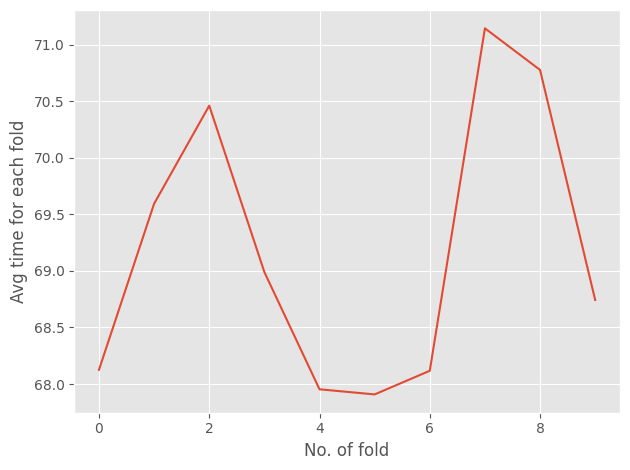

In [207]:
import matplotlib.pyplot as plt

times_birnn_n = np.zeros((10,100))
for i, row in enumerate(times_birnn):
    times_birnn_n[i, :len(row)] = row

times_birnn_n_n = np.mean(times_birnn_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_birnn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("birnn times")
plt.show()

In [208]:
train_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_birnn):
    train_acc_birnn_n[i, :len(row)] = row
    
test_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_birnn):
    test_acc_birnn_n[i, :len(row)] = row
    
train_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_birnn):
    train_loss_birnn_n[i, :len(row)] = row
    
test_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_birnn):
    test_loss_birnn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_birnn_n = np.mean(train_acc_birnn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_birnn_n = np.mean(test_acc_birnn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_birnn_n = np.mean(train_loss_birnn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_birnn_n = np.mean(test_loss_birnn_n,axis=0)

In [209]:
data = [train_acc_birnn_n,test_acc_birnn_n,train_loss_birnn_n,test_loss_birnn_n]

df = pd.DataFrame(data)
df.to_csv('birnn_acc', index=False)
df = pd.read_csv('birnn_acc')

train_acc_birnn_n = df.iloc[0]
test_acc_birnn_n = df.iloc[1]
train_loss_birnn_n = df.iloc[2]
test_loss_birnn_n = df.iloc[3]


df_t = pd.DataFrame([times_birnn_n_n])
df_t.to_csv('birnn_times', index=False)
df_t = pd.read_csv('birnn_times')

times_birnn_n_n = df_t.iloc[0]

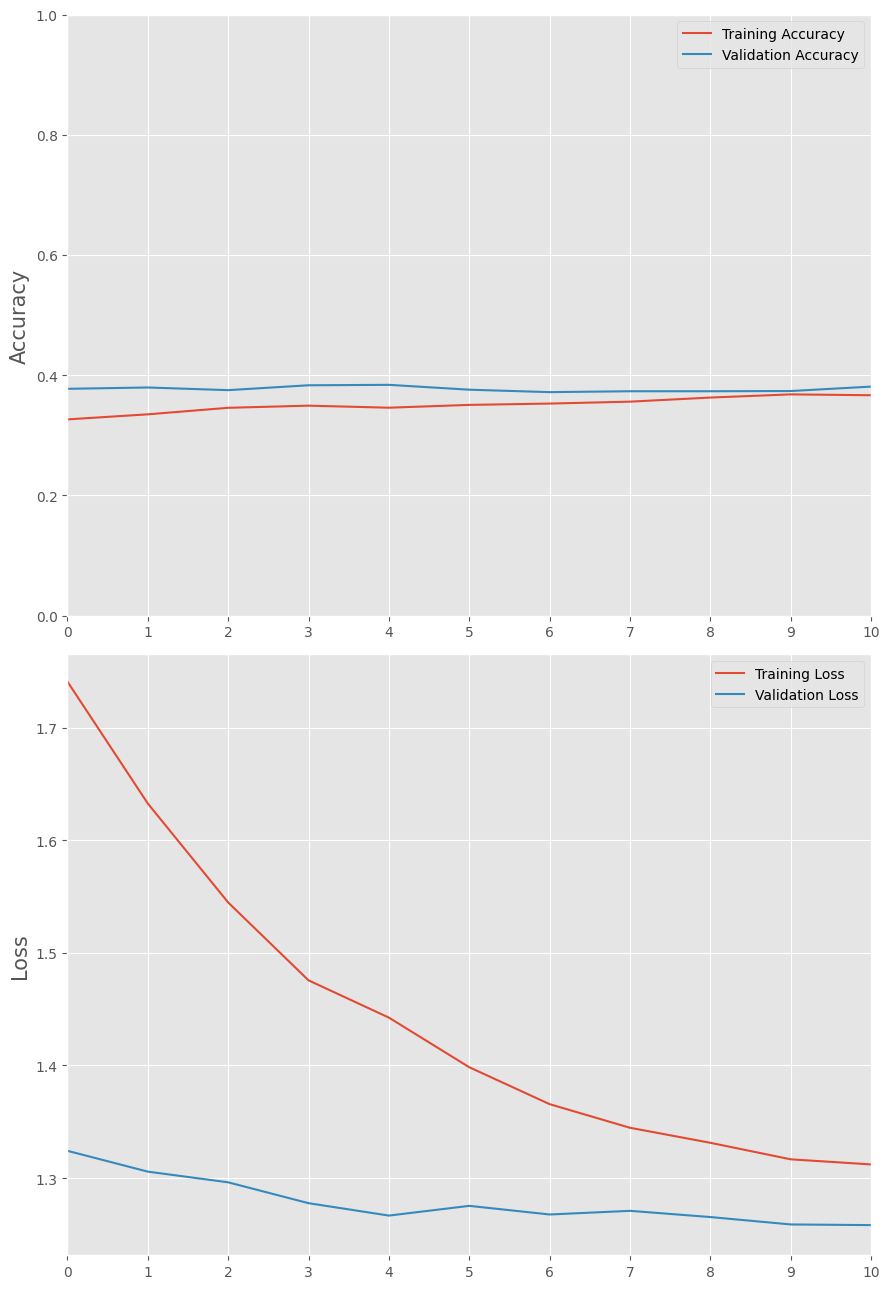

In [210]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_birnn_n, label='Training Accuracy')
axs[0].plot(test_acc_birnn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_birnn_n, label='Training Loss')
axs[1].plot(test_loss_birnn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig(" BIRNN Training and Testing Loss")
plt.show()

In [211]:
import gc
gc.collect()

23945

In [212]:
np.array(scores_birnn).shape

(10, 302, 4)

In [213]:
y_pred_birnn = np.argmax(scores_birnn,axis=2)

In [214]:
y_pred_birnn.shape

(10, 302)

In [215]:
from sklearn.metrics import accuracy_score
acc_scores_birnn = []
for i in range(len(y_test_all_birnn)):
    acc_scores_birnn.append(accuracy_score(y_true = y_test_all_birnn[i],y_pred = y_pred_birnn[i]))

In [216]:
acc_scores_birnn

[0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007]

In [217]:
df_acc = pd.DataFrame([acc_scores_birnn])

df_acc.to_csv('birnn_accuracy', index=False)

df_acc = pd.read_csv('birnn_accuracy')

acc_scores_birnn = df_acc.iloc[0].values

In [218]:
acc_birnn = np.mean(acc_scores_birnn)

In [219]:
acc_birnn

0.38410596026490074

In [220]:
y_test_all_n = np.array(y_test_all_birnn)

y_pred_birnn_n = y_pred_birnn.flatten()
y_test_all_n = y_test_all_n.flatten()

In [221]:
import gc
gc.collect()

0

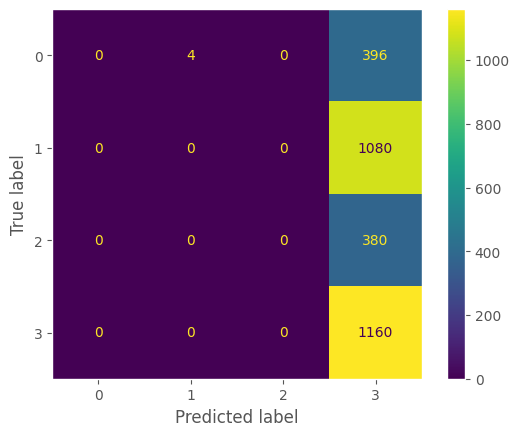

In [222]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_birnn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("birnn")
plt.show()

In [223]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_birnn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.00      0.00      0.00      1080
           2       0.00      0.00      0.00       380
           3       0.38      1.00      0.56      1160

    accuracy                           0.38      3020
   macro avg       0.10      0.25      0.14      3020
weighted avg       0.15      0.38      0.21      3020



C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MobileNetV2

In [8]:
import gc
gc.collect()

0

In [8]:
X.shape

(3020, 259, 100)

In [10]:
# X = np.concatenate([X,X,X,X,X,X,X,X,X,X,X,X,X,X,X], axis= -1)

In [9]:
X = np.expand_dims(X, axis=-1)

In [10]:
X_n = np.concatenate([X,X,X], axis= -1)

In [11]:
X_n.shape

(3020, 259, 100, 3)

In [12]:
y.shape

(3020,)

In [15]:
import tensorflow as tf
from keras.applications import MobileNetV2

In [20]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_mnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_mnv2.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 10, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [21]:
IMG_SHAPE = (None,None,3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top= False, 
                                              weights='imagenet')
base_model.trainable = False

In [22]:
def create_model_mnv2():
     
    model_mnv2 = tf.keras.Sequential([
        
        
        base_model,
        
        tf.keras.layers.GlobalAveragePooling2D(),
        
        tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
        
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Dense(units=4, activation='softmax')
        
])
    
    return model_mnv2

In [23]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_mnv2 = []
y_test_all_mnv2 = []
train_acc_mnv2 = []
test_acc_mnv2 = []
train_loss_mnv2 = []
test_loss_mnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_mnv2.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_mnv2 = None
    model_mnv2 = create_model_mnv2()
        
    model_mnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_mnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_mnv2.predict(X_test)
    
    scores_mnv2.append(x)
    train_acc_mnv2.append(history.history["accuracy"])
    test_acc_mnv2.append(history.history["val_accuracy"])
    train_loss_mnv2.append(history.history["loss"])
    test_loss_mnv2.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 3s 23ms/step - loss: 1.3152 - accuracy: 0.4154 - val_loss: 1.1581 - val_accuracy: 0.4926 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1995 - accuracy: 0.4518 - val_loss: 1.1482 - val_accuracy: 0.4706 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1789 - accuracy: 0.4563 - val_loss: 1.1473 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1574 - accuracy: 0.4779 - val_loss: 1.1267 - val_accuracy: 0.4926 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1350 - accuracy: 0.4849 - val_loss: 1.1080 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1206 - accuracy: 0.4967 - val_loss: 1.1020 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 59/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9354 - accuracy: 0.5854 - val_loss: 1.0868 - val_accuracy: 0.5074 - lr: 1.6000e-06
Epoch 60/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9372 - accuracy: 0.5948 - val_loss: 1.0869 - val_accuracy: 0.5074 - lr: 1.6000e-06
Epoch 61/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9273 - accuracy: 0.5867 - val_loss: 1.0869 - val_accuracy: 0.5074 - lr: 1.6000e-06
Epoch 62/100
76/77 [============================>.] - ETA: 0s - loss: 0.9321 - accuracy: 0.5880
Epoch 62: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 62: 1.33 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9326 - accuracy: 0.5875 - val_loss: 1.0869 - val_accuracy: 0.5037 - lr: 1.6000e-06
Epoch 63/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9380 - accuracy: 0.5879 - val_loss: 1.0869 - val_accuracy: 0.5037 - lr: 3.2000e-07
Ep

Epoch 88/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9258 - accuracy: 0.5846 - val_loss: 1.0870 - val_accuracy: 0.5037 - lr: 1.2800e-08
Epoch 89/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9289 - accuracy: 0.5981 - val_loss: 1.0869 - val_accuracy: 0.5037 - lr: 1.2800e-08
Epoch 90/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9360 - accuracy: 0.5961 - val_loss: 1.0870 - val_accuracy: 0.5037 - lr: 1.2800e-08
Epoch 91/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9345 - accuracy: 0.5781 - val_loss: 1.0870 - val_accuracy: 0.5037 - lr: 1.2800e-08
Epoch 92/100
74/77 [===========================>..] - ETA: 0s - loss: 0.9271 - accuracy: 0.5933
Epoch 92: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 92: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9296 - accuracy: 0.5916 - val_loss: 1.0870 - val_accuracy: 0.5037 - lr: 1.2800e-08
E

Epoch 17/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0582 - accuracy: 0.5282 - val_loss: 1.0800 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0655 - accuracy: 0.5172 - val_loss: 1.0878 - val_accuracy: 0.5294 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0479 - accuracy: 0.5429 - val_loss: 1.0735 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0514 - accuracy: 0.5298 - val_loss: 1.0969 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0404 - accuracy: 0.5331 - val_loss: 1.1263 - val_accuracy: 0.4779 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0320 - accuracy: 0.5270 - val_loss: 1.0940 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 1s 17ms/st

Epoch 75/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8796 - accuracy: 0.6104 - val_loss: 1.1061 - val_accuracy: 0.5221 - lr: 1.6000e-06
Epoch 76/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8767 - accuracy: 0.6194 - val_loss: 1.1063 - val_accuracy: 0.5221 - lr: 1.6000e-06
Epoch 77/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8788 - accuracy: 0.6198 - val_loss: 1.1063 - val_accuracy: 0.5221 - lr: 1.6000e-06
Epoch 78/100
75/77 [============================>.] - ETA: 0s - loss: 0.8671 - accuracy: 0.6204
Epoch 78: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 78: 1.29 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.8680 - accuracy: 0.6186 - val_loss: 1.1064 - val_accuracy: 0.5221 - lr: 1.6000e-06
Epoch 79/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8782 - accuracy: 0.6210 - val_loss: 1.1064 - val_accuracy: 0.5221 - lr: 3.2000e-07
Ep

Epoch 32/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9882 - accuracy: 0.5638 - val_loss: 1.1287 - val_accuracy: 0.5037 - lr: 4.0000e-05
Epoch 33/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9955 - accuracy: 0.5605 - val_loss: 1.1286 - val_accuracy: 0.4926 - lr: 4.0000e-05
Epoch 34/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9885 - accuracy: 0.5609 - val_loss: 1.1281 - val_accuracy: 0.5037 - lr: 4.0000e-05
Epoch 35/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9815 - accuracy: 0.5687 - val_loss: 1.1299 - val_accuracy: 0.4890 - lr: 4.0000e-05
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 0.9904 - accuracy: 0.5519
Epoch 36: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 36: 1.32 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9904 - accuracy: 0.5519 - val_loss: 1.1272 - val_accuracy: 0.4926 - lr: 4.0000e-05
Ep

Epoch 61/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9809 - accuracy: 0.5626 - val_loss: 1.1289 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 62/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9841 - accuracy: 0.5601 - val_loss: 1.1289 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 63/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9838 - accuracy: 0.5617 - val_loss: 1.1289 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 64/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9807 - accuracy: 0.5720 - val_loss: 1.1289 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 65/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9803 - accuracy: 0.5695 - val_loss: 1.1289 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 66/100
74/77 [===========================>..] - ETA: 0s - loss: 0.9850 - accuracy: 0.5735
Epoch 66: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 66: 1.

Epoch 90/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9858 - accuracy: 0.5658 - val_loss: 1.1289 - val_accuracy: 0.5000 - lr: 2.5600e-09
Epoch 91/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9886 - accuracy: 0.5605 - val_loss: 1.1289 - val_accuracy: 0.5000 - lr: 2.5600e-09
Epoch 92/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9857 - accuracy: 0.5691 - val_loss: 1.1289 - val_accuracy: 0.5000 - lr: 2.5600e-09
Epoch 93/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9847 - accuracy: 0.5695 - val_loss: 1.1289 - val_accuracy: 0.5000 - lr: 2.5600e-09
Epoch 94/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9832 - accuracy: 0.5728 - val_loss: 1.1289 - val_accuracy: 0.5000 - lr: 2.5600e-09
Epoch 95/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9821 - accuracy: 0.5777 - val_loss: 1.1289 - val_accuracy: 0.5000 - lr: 2.5600e-09
Epoch 96/100
74/77 [====================

77/77 [==============================] - 1s 17ms/step - loss: 1.0759 - accuracy: 0.5184 - val_loss: 1.0802 - val_accuracy: 0.5074 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0760 - accuracy: 0.5143 - val_loss: 1.0562 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0540 - accuracy: 0.5229 - val_loss: 1.0498 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0384 - accuracy: 0.5348 - val_loss: 1.0699 - val_accuracy: 0.4890 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0582 - accuracy: 0.5303 - val_loss: 1.0532 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 24/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0442 - accuracy: 0.5356 - val_loss: 1.0357 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 25/100
77/77 [==============================] - 1s 17ms/step - loss: 1.

Epoch 48/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8982 - accuracy: 0.6161 - val_loss: 1.0163 - val_accuracy: 0.5441 - lr: 4.0000e-05
Epoch 49/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8961 - accuracy: 0.6206 - val_loss: 1.0171 - val_accuracy: 0.5441 - lr: 4.0000e-05
Epoch 50/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8865 - accuracy: 0.6202 - val_loss: 1.0119 - val_accuracy: 0.5551 - lr: 4.0000e-05
Epoch 51/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8927 - accuracy: 0.6231 - val_loss: 1.0175 - val_accuracy: 0.5441 - lr: 4.0000e-05
Epoch 52/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8937 - accuracy: 0.6161 - val_loss: 1.0111 - val_accuracy: 0.5699 - lr: 4.0000e-05
Epoch 53/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8958 - accuracy: 0.6165 - val_loss: 1.0134 - val_accuracy: 0.5441 - lr: 4.0000e-05
Epoch 54/100
77/77 [====================

Epoch 77/100
76/77 [============================>.] - ETA: 0s - loss: 0.8825 - accuracy: 0.6234
Epoch 77: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 77: 1.30 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.8824 - accuracy: 0.6231 - val_loss: 1.0145 - val_accuracy: 0.5551 - lr: 1.6000e-06
Epoch 78/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8808 - accuracy: 0.6267 - val_loss: 1.0145 - val_accuracy: 0.5551 - lr: 3.2000e-07
Epoch 79/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8799 - accuracy: 0.6329 - val_loss: 1.0145 - val_accuracy: 0.5551 - lr: 3.2000e-07
Epoch 80/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8802 - accuracy: 0.6308 - val_loss: 1.0145 - val_accuracy: 0.5551 - lr: 3.2000e-07
Epoch 81/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8949 - accuracy: 0.6198 - val_loss: 1.0145 - val_accuracy: 0.5551 - lr: 3.2000e-07
Ep

Epoch 34/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9685 - accuracy: 0.5756 - val_loss: 1.1819 - val_accuracy: 0.4522 - lr: 4.0000e-05
Epoch 35/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9628 - accuracy: 0.5809 - val_loss: 1.1834 - val_accuracy: 0.4522 - lr: 4.0000e-05
Epoch 36/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9590 - accuracy: 0.5752 - val_loss: 1.1798 - val_accuracy: 0.4632 - lr: 4.0000e-05
Epoch 37/100
75/77 [============================>.] - ETA: 0s - loss: 0.9513 - accuracy: 0.5954
Epoch 37: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 37: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9501 - accuracy: 0.5957 - val_loss: 1.1831 - val_accuracy: 0.4522 - lr: 4.0000e-05
Epoch 38/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9553 - accuracy: 0.5867 - val_loss: 1.1830 - val_accuracy: 0.4596 - lr: 8.0000e-06
Ep

Epoch 63/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9495 - accuracy: 0.5883 - val_loss: 1.1840 - val_accuracy: 0.4596 - lr: 3.2000e-07
Epoch 64/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9567 - accuracy: 0.5818 - val_loss: 1.1839 - val_accuracy: 0.4596 - lr: 3.2000e-07
Epoch 65/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9571 - accuracy: 0.5867 - val_loss: 1.1840 - val_accuracy: 0.4596 - lr: 3.2000e-07
Epoch 66/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9527 - accuracy: 0.5899 - val_loss: 1.1840 - val_accuracy: 0.4596 - lr: 3.2000e-07
Epoch 67/100
74/77 [===========================>..] - ETA: 0s - loss: 0.9537 - accuracy: 0.5870
Epoch 67: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 67: 1.30 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9545 - accuracy: 0.5871 - val_loss: 1.1840 - val_accuracy: 0.4596 - lr: 3.2000e-07
Ep

Epoch 92/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9498 - accuracy: 0.5899 - val_loss: 1.1840 - val_accuracy: 0.4596 - lr: 2.5600e-09
Epoch 93/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9540 - accuracy: 0.5830 - val_loss: 1.1840 - val_accuracy: 0.4596 - lr: 2.5600e-09
Epoch 94/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9542 - accuracy: 0.5867 - val_loss: 1.1840 - val_accuracy: 0.4596 - lr: 2.5600e-09
Epoch 95/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9500 - accuracy: 0.5895 - val_loss: 1.1840 - val_accuracy: 0.4596 - lr: 2.5600e-09
Epoch 96/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9527 - accuracy: 0.5895 - val_loss: 1.1840 - val_accuracy: 0.4596 - lr: 2.5600e-09
Epoch 97/100
76/77 [============================>.] - ETA: 0s - loss: 0.9547 - accuracy: 0.5814
Epoch 97: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 97: 1.29

Epoch 50/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9307 - accuracy: 0.5875 - val_loss: 1.1278 - val_accuracy: 0.4853 - lr: 8.0000e-06
Epoch 51/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9420 - accuracy: 0.5859 - val_loss: 1.1279 - val_accuracy: 0.4853 - lr: 8.0000e-06
Epoch 52/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9244 - accuracy: 0.5969 - val_loss: 1.1275 - val_accuracy: 0.4853 - lr: 8.0000e-06
Epoch 53/100
76/77 [============================>.] - ETA: 0s - loss: 0.9371 - accuracy: 0.5979
Epoch 53: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 53: 1.29 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9371 - accuracy: 0.5973 - val_loss: 1.1273 - val_accuracy: 0.4816 - lr: 8.0000e-06
Epoch 54/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9309 - accuracy: 0.5932 - val_loss: 1.1273 - val_accuracy: 0.4890 - lr: 1.6000e-06
E

Epoch 79/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9324 - accuracy: 0.5769 - val_loss: 1.1282 - val_accuracy: 0.4890 - lr: 6.4000e-08
Epoch 80/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9351 - accuracy: 0.5953 - val_loss: 1.1282 - val_accuracy: 0.4890 - lr: 6.4000e-08
Epoch 81/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9227 - accuracy: 0.6002 - val_loss: 1.1282 - val_accuracy: 0.4890 - lr: 6.4000e-08
Epoch 82/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9347 - accuracy: 0.5895 - val_loss: 1.1282 - val_accuracy: 0.4890 - lr: 6.4000e-08
Epoch 83/100
73/77 [===========================>..] - ETA: 0s - loss: 0.9265 - accuracy: 0.5972
Epoch 83: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 83: 1.29 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9253 - accuracy: 0.5985 - val_loss: 1.1282 - val_accuracy: 0.4890 - lr: 6.4000e-08
E

Epoch 8/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1126 - accuracy: 0.5061 - val_loss: 1.1173 - val_accuracy: 0.4816 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1218 - accuracy: 0.4930 - val_loss: 1.1262 - val_accuracy: 0.4926 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1239 - accuracy: 0.4849 - val_loss: 1.1370 - val_accuracy: 0.4963 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1076 - accuracy: 0.5061 - val_loss: 1.1218 - val_accuracy: 0.4963 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0816 - accuracy: 0.5098 - val_loss: 1.1021 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0834 - accuracy: 0.5159 - val_loss: 1.1196 - val_accuracy: 0.4853 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 1s 17ms/step

Epoch 38/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9662 - accuracy: 0.5646 - val_loss: 1.0529 - val_accuracy: 0.5294 - lr: 0.0010
Epoch 39/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9521 - accuracy: 0.5736 - val_loss: 1.1464 - val_accuracy: 0.5221 - lr: 0.0010
Epoch 40/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9474 - accuracy: 0.5842 - val_loss: 1.0675 - val_accuracy: 0.5221 - lr: 0.0010
Epoch 41/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9396 - accuracy: 0.5940 - val_loss: 1.0679 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 42/100
77/77 [==============================] - ETA: 0s - loss: 0.9471 - accuracy: 0.5871
Epoch 42: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 42: 1.29 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9471 - accuracy: 0.5871 - val_loss: 1.1135 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 43/100
77/77 [=

Epoch 67/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8099 - accuracy: 0.6574 - val_loss: 1.0751 - val_accuracy: 0.5404 - lr: 4.0000e-05
Epoch 68/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8144 - accuracy: 0.6537 - val_loss: 1.0780 - val_accuracy: 0.5441 - lr: 4.0000e-05
Epoch 69/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8057 - accuracy: 0.6648 - val_loss: 1.0837 - val_accuracy: 0.5331 - lr: 4.0000e-05
Epoch 70/100
74/77 [===========================>..] - ETA: 0s - loss: 0.8065 - accuracy: 0.6520
Epoch 70: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 70: 1.30 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.8070 - accuracy: 0.6504 - val_loss: 1.0789 - val_accuracy: 0.5441 - lr: 4.0000e-05
Epoch 71/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8021 - accuracy: 0.6599 - val_loss: 1.0789 - val_accuracy: 0.5441 - lr: 8.0000e-06
Ep

Epoch 96/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8063 - accuracy: 0.6504 - val_loss: 1.0792 - val_accuracy: 0.5515 - lr: 3.2000e-07
Epoch 97/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8078 - accuracy: 0.6533 - val_loss: 1.0792 - val_accuracy: 0.5551 - lr: 3.2000e-07
Epoch 98/100
77/77 [==============================] - 1s 17ms/step - loss: 0.7941 - accuracy: 0.6684 - val_loss: 1.0792 - val_accuracy: 0.5515 - lr: 3.2000e-07
Epoch 99/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8016 - accuracy: 0.6533 - val_loss: 1.0792 - val_accuracy: 0.5515 - lr: 3.2000e-07
Epoch 100/100
74/77 [===========================>..] - ETA: 0s - loss: 0.8089 - accuracy: 0.6529
Epoch 100: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 100: 1.28 seconds
10/10 [==============================] - 0s 15ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 3s 23ms/step -

Epoch 54/100
77/77 [==============================] - 1s 18ms/step - loss: 0.8944 - accuracy: 0.6137 - val_loss: 1.0538 - val_accuracy: 0.5074 - lr: 8.0000e-06
Epoch 55/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8979 - accuracy: 0.6153 - val_loss: 1.0539 - val_accuracy: 0.5110 - lr: 8.0000e-06
Epoch 56/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8928 - accuracy: 0.6153 - val_loss: 1.0547 - val_accuracy: 0.5074 - lr: 8.0000e-06
Epoch 57/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8964 - accuracy: 0.6137 - val_loss: 1.0544 - val_accuracy: 0.5074 - lr: 8.0000e-06
Epoch 58/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8971 - accuracy: 0.6161 - val_loss: 1.0551 - val_accuracy: 0.5074 - lr: 8.0000e-06
Epoch 59/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8936 - accuracy: 0.6173 - val_loss: 1.0552 - val_accuracy: 0.5074 - lr: 8.0000e-06
Epoch 60/100
77/77 [====================

Epoch 83/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8919 - accuracy: 0.6206 - val_loss: 1.0559 - val_accuracy: 0.5074 - lr: 6.4000e-08
Epoch 84/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8907 - accuracy: 0.6202 - val_loss: 1.0559 - val_accuracy: 0.5074 - lr: 6.4000e-08
Epoch 85/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8906 - accuracy: 0.6251 - val_loss: 1.0559 - val_accuracy: 0.5074 - lr: 6.4000e-08
Epoch 86/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8860 - accuracy: 0.6190 - val_loss: 1.0559 - val_accuracy: 0.5074 - lr: 6.4000e-08
Epoch 87/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8839 - accuracy: 0.6304 - val_loss: 1.0559 - val_accuracy: 0.5074 - lr: 6.4000e-08
Epoch 88/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8844 - accuracy: 0.6206 - val_loss: 1.0559 - val_accuracy: 0.5074 - lr: 6.4000e-08
Epoch 89/100
77/77 [====================

Epoch 12/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0947 - accuracy: 0.5037 - val_loss: 1.1854 - val_accuracy: 0.4706 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0914 - accuracy: 0.5094 - val_loss: 1.1765 - val_accuracy: 0.4926 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0797 - accuracy: 0.5086 - val_loss: 1.1580 - val_accuracy: 0.4926 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0910 - accuracy: 0.5114 - val_loss: 1.1855 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0768 - accuracy: 0.5303 - val_loss: 1.1575 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0788 - accuracy: 0.5237 - val_loss: 1.2009 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 1s 17ms/st

Epoch 70/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9414 - accuracy: 0.5916 - val_loss: 1.1477 - val_accuracy: 0.5037 - lr: 1.6000e-06
Epoch 71/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9426 - accuracy: 0.5920 - val_loss: 1.1476 - val_accuracy: 0.5037 - lr: 1.6000e-06
Epoch 72/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9384 - accuracy: 0.5899 - val_loss: 1.1479 - val_accuracy: 0.5037 - lr: 1.6000e-06
Epoch 73/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9394 - accuracy: 0.5850 - val_loss: 1.1476 - val_accuracy: 0.5037 - lr: 1.6000e-06
Epoch 74/100
76/77 [============================>.] - ETA: 0s - loss: 0.9389 - accuracy: 0.5888
Epoch 74: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 74: 1.29 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9367 - accuracy: 0.5908 - val_loss: 1.1476 - val_accuracy: 0.5037 - lr: 1.6000e-06
Ep

Epoch 99/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9404 - accuracy: 0.5854 - val_loss: 1.1476 - val_accuracy: 0.5037 - lr: 1.2800e-08
Epoch 100/100
10/10 [==============================] - 0s 16ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 3s 23ms/step - loss: 1.2963 - accuracy: 0.4223 - val_loss: 1.2262 - val_accuracy: 0.4963 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1856 - accuracy: 0.4624 - val_loss: 1.1870 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1766 - accuracy: 0.4505 - val_loss: 1.2357 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1637 - accuracy: 0.4599 - val_loss: 1.1983 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1436 - accuracy: 0.4652 - val_loss: 1.1697 - val_a

Epoch 57/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9205 - accuracy: 0.5908 - val_loss: 1.1292 - val_accuracy: 0.4890 - lr: 8.0000e-06
Epoch 58/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9167 - accuracy: 0.5977 - val_loss: 1.1322 - val_accuracy: 0.4963 - lr: 8.0000e-06
Epoch 59/100
76/77 [============================>.] - ETA: 0s - loss: 0.9165 - accuracy: 0.6028
Epoch 59: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 59: 1.30 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9169 - accuracy: 0.6022 - val_loss: 1.1317 - val_accuracy: 0.4926 - lr: 8.0000e-06
Epoch 60/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9266 - accuracy: 0.5961 - val_loss: 1.1312 - val_accuracy: 0.4926 - lr: 1.6000e-06
Epoch 61/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9136 - accuracy: 0.5948 - val_loss: 1.1307 - val_accuracy: 0.4926 - lr: 1.6000e-06
E

Epoch 86/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9110 - accuracy: 0.5957 - val_loss: 1.1305 - val_accuracy: 0.4926 - lr: 6.4000e-08
Epoch 87/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9168 - accuracy: 0.6087 - val_loss: 1.1305 - val_accuracy: 0.4926 - lr: 6.4000e-08
Epoch 88/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9155 - accuracy: 0.5961 - val_loss: 1.1305 - val_accuracy: 0.4926 - lr: 6.4000e-08
Epoch 89/100
76/77 [============================>.] - ETA: 0s - loss: 0.9178 - accuracy: 0.6016
Epoch 89: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 89: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9181 - accuracy: 0.6014 - val_loss: 1.1305 - val_accuracy: 0.4926 - lr: 6.4000e-08
Epoch 90/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9149 - accuracy: 0.5957 - val_loss: 1.1305 - val_accuracy: 0.4926 - lr: 1.2800e-08
E

In [24]:
import gc
gc.collect()

0

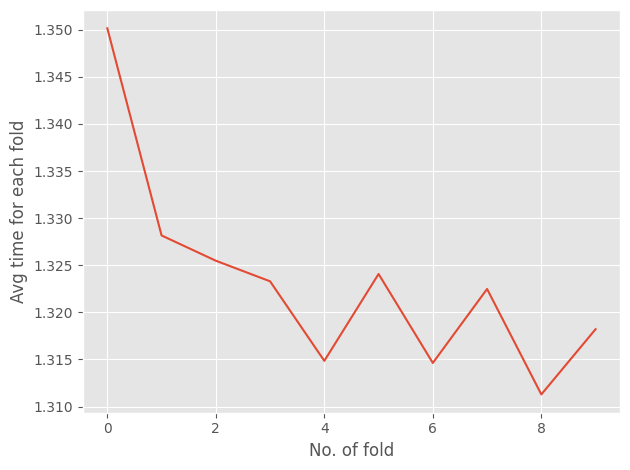

In [25]:
import matplotlib.pyplot as plt

times_mnv2_n = np.zeros((10,100))
for i, row in enumerate(times_mnv2):
    times_mnv2_n[i, :len(row)] = row

times_mnv2_n_n = np.mean(times_mnv2_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_mnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("mnv2 times")
plt.show()

In [26]:
train_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_mnv2):
    train_acc_mnv2_n[i, :len(row)] = row
    
test_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_mnv2):
    test_acc_mnv2_n[i, :len(row)] = row
    
train_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_mnv2):
    train_loss_mnv2_n[i, :len(row)] = row
    
test_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_mnv2):
    test_loss_mnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_mnv2_n = np.mean(train_acc_mnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_mnv2_n = np.mean(test_acc_mnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_mnv2_n = np.mean(train_loss_mnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_mnv2_n = np.mean(test_loss_mnv2_n,axis=0)

In [27]:
data = [train_acc_mnv2_n,test_acc_mnv2_n,train_loss_mnv2_n,test_loss_mnv2_n]

df = pd.DataFrame(data)
df.to_csv('mnv2_acc', index=False)
df = pd.read_csv('mnv2_acc')

train_acc_mnv2_n = df.iloc[0]
test_acc_mnv2_n = df.iloc[1]
train_loss_mnv2_n = df.iloc[2]
test_loss_mnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_mnv2_n_n])
df_t.to_csv('mnv2_times', index=False)
df_t = pd.read_csv('mnv2_times')

times_mnv2_n_n = df_t.iloc[0]

In [28]:
train_acc_mnv2_n

0     0.414473
1     0.457441
2     0.464105
3     0.475552
4     0.479313
        ...   
95    0.604579
96    0.599714
97    0.605478
98    0.602371
99    0.603639
Name: 0, Length: 100, dtype: float64

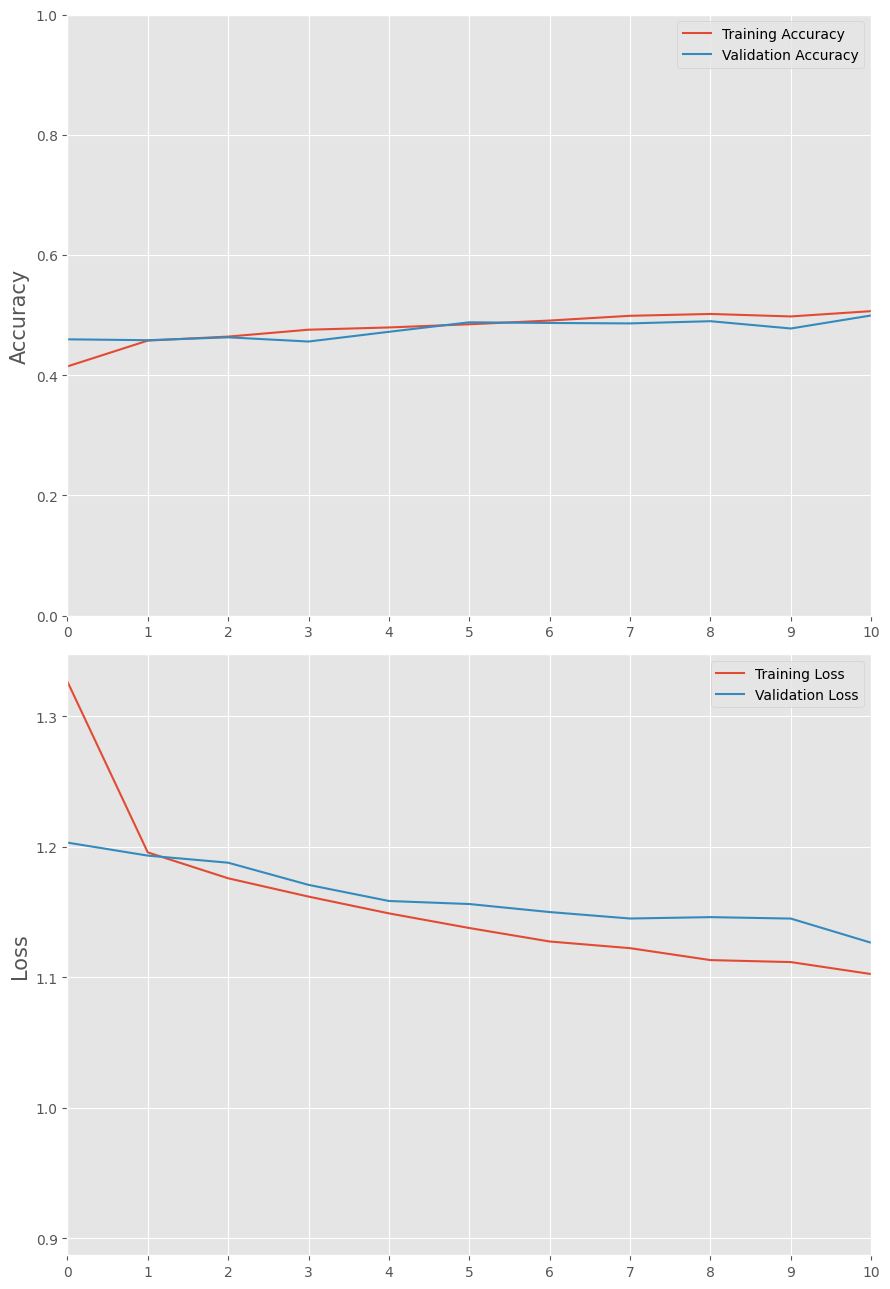

In [29]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_mnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_mnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_mnv2_n, label='Training Loss')
axs[1].plot(test_loss_mnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("mnv2 Training and Testing Loss")
plt.show()

In [30]:
np.array(scores_mnv2).shape

(10, 302, 4)

In [31]:
y_pred_mnv2 = np.argmax(scores_mnv2,axis=2)

In [32]:
y_pred_mnv2.shape

(10, 302)

In [33]:
from sklearn.metrics import accuracy_score
acc_scores_mnv2 = []
for i in range(len(y_test_all_mnv2)):
    acc_scores_mnv2.append(accuracy_score(y_true = y_test_all_mnv2[i],y_pred = y_pred_mnv2[i]))

In [34]:
import gc
gc.collect()

3653

In [35]:
acc_scores_mnv2

[0.5132450331125827,
 0.5397350993377483,
 0.5264900662251656,
 0.5099337748344371,
 0.5,
 0.543046357615894,
 0.5066225165562914,
 0.46357615894039733,
 0.5463576158940397,
 0.48013245033112584]

In [36]:
df_acc = pd.DataFrame([acc_scores_mnv2])

df_acc.to_csv('mnv2_accuracy', index=False)

df_acc = pd.read_csv('mnv2_accuracy')

acc_scores_mnv2 = df_acc.iloc[0].values

In [37]:
y_test_all_n = np.array(y_test_all_mnv2)

y_pred_mnv2_n = y_pred_mnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

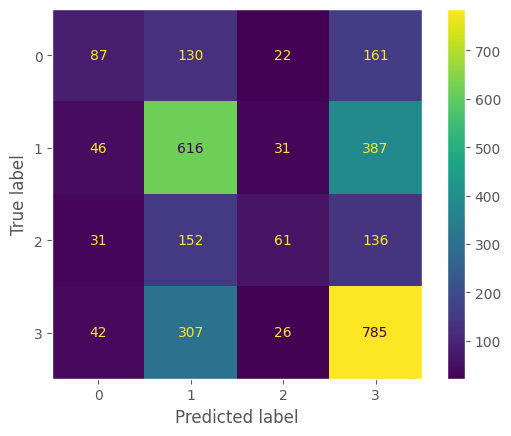

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_mnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("mnv2")

plt.show()

In [39]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_mnv2_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.42      0.22      0.29       400
           1       0.51      0.57      0.54      1080
           2       0.44      0.16      0.23       380
           3       0.53      0.68      0.60      1160

    accuracy                           0.51      3020
   macro avg       0.48      0.41      0.41      3020
weighted avg       0.50      0.51      0.49      3020



# XceptionV3

In [40]:
import gc
gc.collect()

15

In [41]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_xv3 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_xv3.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [42]:
import gc
gc.collect()

5

In [43]:
def create_model_xv3():
    
    model_xv3 = tf.keras.models.Sequential([
    tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_xv3.trainable = False
    return model_xv3

In [44]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xv3 = []
y_test_all_xv3 = []
train_acc_xv3 = []
test_acc_xv3 = []
train_loss_xv3 = []
test_loss_xv3 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_xv3.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_xv3 = None
    model_xv3 = create_model_xv3()
        
    model_xv3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_xv3.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_xv3.predict(X_test)
    
    scores_xv3.append(x)
    train_acc_xv3.append(history.history["accuracy"])
    test_acc_xv3.append(history.history["val_accuracy"])
    train_loss_xv3.append(history.history["loss"])
    test_loss_xv3.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 5s 47ms/step - loss: 1.3359 - accuracy: 0.3602 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3366 - accuracy: 0.3639 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 40ms/step - loss: 1.3392 - accuracy: 0.3590 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3394 - accuracy: 0.3536 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3357 - accuracy: 0.3626 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3394 - accuracy: 0.3557 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Time taken for epoch 29: 3.16 seconds
77/77 [==============================] - 3s 41ms/step - loss: 1.3413 - accuracy: 0.3557 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3413 - accuracy: 0.3516 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3391 - accuracy: 0.3573 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3399 - accuracy: 0.3635 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3402 - accuracy: 0.3590 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3378 - accuracy: 0.3590 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3340 - accuracy: 0.3622 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3381 - accuracy: 0.3573 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3405 - accuracy: 0.3557 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3353 - accuracy: 0.3651 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 40ms/step - loss: 1.3371 - accuracy: 0.3553 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3411 - accuracy: 0.3520 - val_loss: 1.3374 - val_accuracy: 0.3493 - lr: 2.5600e-09
Epoch 64/100
77/77 [====================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [47]:
np.array(y_test_all_xv3).shape

(10, 302)

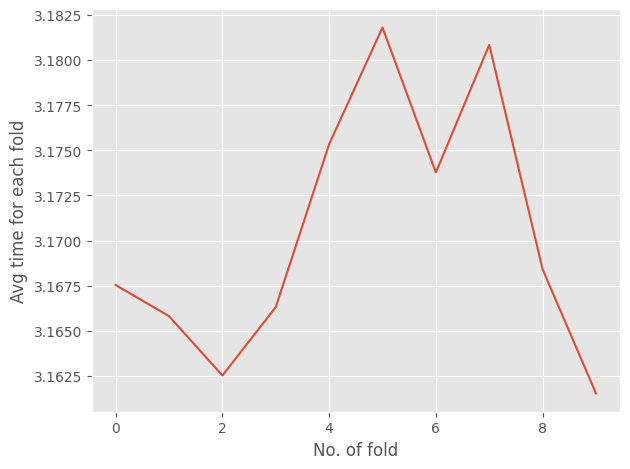

In [48]:
import matplotlib.pyplot as plt

times_xv3_n = np.zeros((10,100))
for i, row in enumerate(times_xv3):
    times_xv3_n[i, :len(row)] = row

times_xv3_n_n = np.mean(times_xv3_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_xv3_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xv3 times")
plt.show()

In [49]:
train_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_acc_xv3):
    train_acc_xv3_n[i, :len(row)] = row
    
test_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_acc_xv3):
    test_acc_xv3_n[i, :len(row)] = row
    
train_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_loss_xv3):
    train_loss_xv3_n[i, :len(row)] = row
    
test_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_loss_xv3):
    test_loss_xv3_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_xv3_n = np.mean(train_acc_xv3_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_xv3_n = np.mean(test_acc_xv3_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_xv3_n = np.mean(train_loss_xv3_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_xv3_n = np.mean(test_loss_xv3_n,axis=0)

In [50]:
import gc
gc.collect()

21221

In [51]:
data = [train_acc_xv3_n,test_acc_xv3_n,train_loss_xv3_n,test_loss_xv3_n]

df = pd.DataFrame(data)
df.to_csv('xv3_acc', index=False)
df = pd.read_csv('xv3_acc')

train_acc_xv3_n = df.iloc[0]
test_acc_xv3_n = df.iloc[1]
train_loss_xv3_n = df.iloc[2]
test_loss_xv3_n = df.iloc[3]


df_t = pd.DataFrame([times_xv3_n_n])
df_t.to_csv('xv3_times', index=False)
df_t = pd.read_csv('xv3_times')

times_xv3_n_n = df_t.iloc[0]

In [52]:
train_acc_xv3_n

0     0.223222
1     0.219338
2     0.221014
3     0.218643
4     0.222772
        ...   
95    0.222322
96    0.224693
97    0.223917
98    0.221995
99    0.220482
Name: 0, Length: 100, dtype: float64

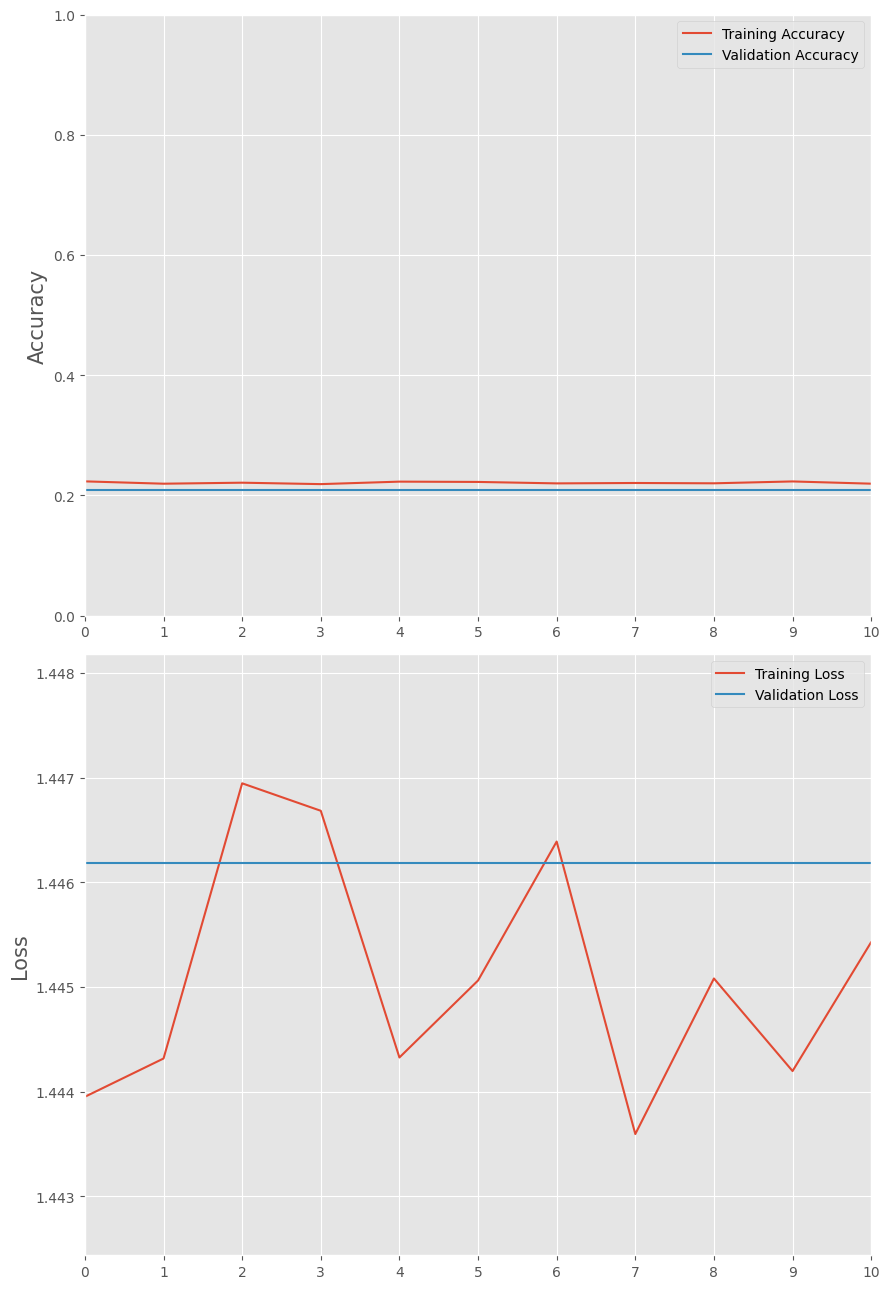

In [53]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_xv3_n, label='Training Accuracy')
axs[0].plot(test_acc_xv3_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_xv3_n, label='Training Loss')
axs[1].plot(test_loss_xv3_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("xv3 Training and Testing Loss")
plt.show()

In [54]:
np.array(scores_xv3).shape

(10, 302, 4)

In [55]:
y_pred_xv3 = np.argmax(scores_xv3,axis=2)

In [56]:
y_pred_xv3.shape

(10, 302)

In [57]:
from sklearn.metrics import accuracy_score
acc_scores_xv3 = []
for i in range(len(y_test_all_xv3)):
    acc_scores_xv3.append(accuracy_score(y_true = y_test_all_xv3[i],y_pred = y_pred_xv3[i]))

In [58]:
import gc
gc.collect()

23657

In [59]:
acc_scores_xv3

[0.3509933774834437,
 0.1423841059602649,
 0.13245033112582782,
 0.27483443708609273,
 0.3543046357615894,
 0.1456953642384106,
 0.10927152317880795,
 0.12582781456953643,
 0.13245033112582782,
 0.2913907284768212]

In [60]:
df_acc = pd.DataFrame([acc_scores_xv3])

df_acc.to_csv('xv3_accuracy', index=False)

df_acc = pd.read_csv('xv3_accuracy')

acc_scores_xv3 = df_acc.iloc[0].values

In [61]:
y_test_all_n = np.array(y_test_all_xv3)

y_pred_xv3_n = y_pred_xv3.flatten()
y_test_all_n = y_test_all_n.flatten()

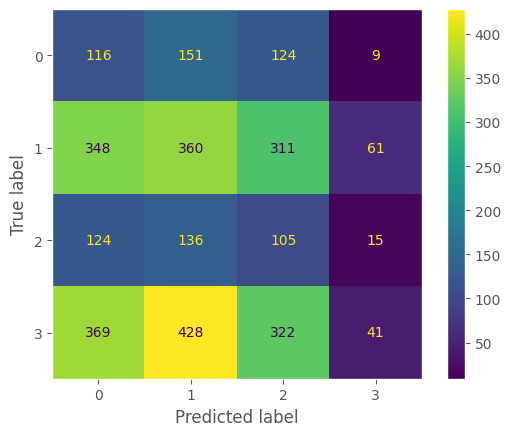

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_xv3_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("xv3")
plt.show()

In [63]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_xv3_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.12      0.29      0.17       400
           1       0.33      0.33      0.33      1080
           2       0.12      0.28      0.17       380
           3       0.33      0.04      0.06      1160

    accuracy                           0.21      3020
   macro avg       0.23      0.23      0.18      3020
weighted avg       0.28      0.21      0.19      3020



# EfficientNetV2L

In [67]:
import gc
gc.collect()

973

In [68]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_env2l = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_env2l.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [69]:
def create_model_env2l():
    
    model_env2l = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetV2L(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_env2l.trainable = False
    return model_env2l

In [70]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_env2l = []
y_test_all_env2l = []
train_acc_env2l = []
test_acc_env2l = []
train_loss_env2l = []
test_loss_env2l = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_env2l.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_env2l = None
    model_env2l = create_model_env2l()
        
    model_env2l.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_env2l.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_env2l.predict(X_test)
    
    scores_env2l.append(x)
    train_acc_env2l.append(history.history["accuracy"])
    test_acc_env2l.append(history.history["val_accuracy"])
    train_loss_env2l.append(history.history["loss"])
    test_loss_env2l.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 39s 235ms/step - loss: 1.3755 - accuracy: 0.2690 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3749 - accuracy: 0.2833 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3724 - accuracy: 0.2727 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3736 - accuracy: 0.2821 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3724 - accuracy: 0.2784 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 14s 175ms/step - loss: 1.3748 - accuracy: 0.2690 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3715 - accuracy: 0.2850
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.54 seconds
77/77 [==============================] - 14s 176ms/step - loss: 1.3715 - accuracy: 0.2850 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3724 - accuracy: 0.2723 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3728 - accuracy: 0.2882 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3730 - accuracy: 0.2760 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3736 - accuracy: 0.2694 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3734 - accuracy: 0.2698
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.69 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.3734 - accuracy: 0.2698 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3746 - accuracy: 0.2764 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3709 - accuracy: 0.2968 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3753 - accuracy: 0.2698 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3739 - accuracy: 0.2796 - val_loss: 1.3596 - val_accuracy: 0.4118 - lr: 4.

Epoch 13/100
77/77 [==============================] - 13s 173ms/step - loss: 1.3648 - accuracy: 0.3786 - val_loss: 1.3457 - val_accuracy: 0.4265 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3668 - accuracy: 0.3778 - val_loss: 1.3457 - val_accuracy: 0.4265 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3652 - accuracy: 0.3782
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 13.48 seconds
77/77 [==============================] - 13s 175ms/step - loss: 1.3652 - accuracy: 0.3782 - val_loss: 1.3457 - val_accuracy: 0.4265 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3658 - accuracy: 0.3749 - val_loss: 1.3457 - val_accuracy: 0.4265 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3675 - accuracy: 0.3761 - val_loss: 1.3457 - val_accuracy: 0.4265 - lr: 4

Epoch 41/100
77/77 [==============================] - 13s 174ms/step - loss: 1.3665 - accuracy: 0.3753 - val_loss: 1.3457 - val_accuracy: 0.4265 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3655 - accuracy: 0.3761 - val_loss: 1.3457 - val_accuracy: 0.4265 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.3632 - accuracy: 0.3802
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 13.39 seconds
77/77 [==============================] - 13s 174ms/step - loss: 1.3632 - accuracy: 0.3802 - val_loss: 1.3457 - val_accuracy: 0.4265 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 174ms/step - loss: 1.3678 - accuracy: 0.3745 - val_loss: 1.3457 - val_accuracy: 0.4265 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3664 - accuracy: 0.3761 - val_loss: 1.3457 - val_accuracy: 0.4265 - lr: 6.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



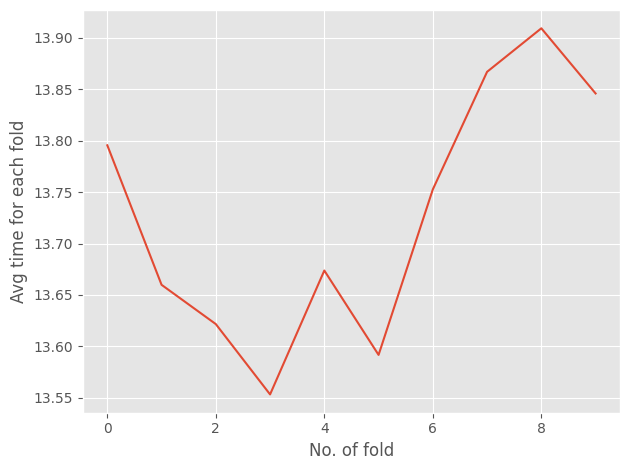

In [152]:
import matplotlib.pyplot as plt

times_env2l_n = np.zeros((10,100))
for i, row in enumerate(times_env2l):
    times_env2l_n[i, :len(row)] = row

times_env2l_n_n = np.mean(times_env2l_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_env2l_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("env2l times")
plt.show()

In [153]:
train_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_acc_env2l):
    train_acc_env2l_n[i, :len(row)] = row
    
test_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_acc_env2l):
    test_acc_env2l_n[i, :len(row)] = row
    
train_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_loss_env2l):
    train_loss_env2l_n[i, :len(row)] = row
    
test_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_loss_env2l):
    test_loss_env2l_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_env2l_n = np.mean(train_acc_env2l_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_env2l_n = np.mean(test_acc_env2l_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_env2l_n = np.mean(train_loss_env2l_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_env2l_n = np.mean(test_loss_env2l_n,axis=0)

In [154]:
data = [train_acc_env2l_n,test_acc_env2l_n,train_loss_env2l_n,test_loss_env2l_n]

df = pd.DataFrame(data)
df.to_csv('env2l_acc', index=False)
df = pd.read_csv('env2l_acc')

train_acc_env2l_n = df.iloc[0]
test_acc_env2l_n = df.iloc[1]
train_loss_env2l_n = df.iloc[2]
test_loss_env2l_n = df.iloc[3]


df_t = pd.DataFrame([times_env2l_n_n])
df_t.to_csv('env2l_times', index=False)
df_t = pd.read_csv('env2l_times')

times_env2l_n_n = df_t.iloc[0]

In [155]:
train_acc_env2l_n

0     0.287939
1     0.288103
2     0.289575
3     0.291128
4     0.288267
        ...   
95    0.287490
96    0.291006
97    0.288267
98    0.291946
99    0.289330
Name: 0, Length: 100, dtype: float64

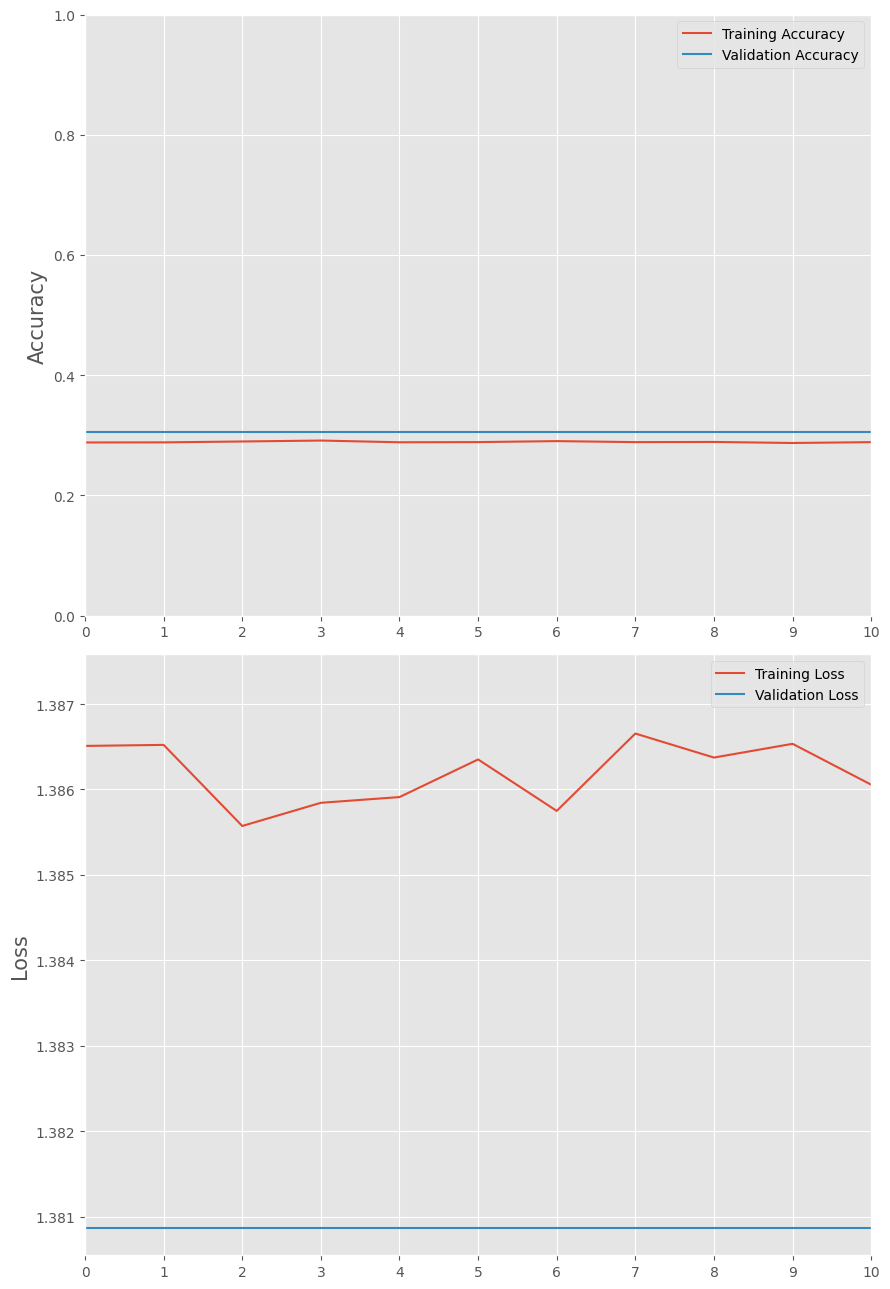

In [156]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_env2l_n, label='Training Accuracy')
axs[0].plot(test_acc_env2l_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_env2l_n, label='Training Loss')
axs[1].plot(test_loss_env2l_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("env2l Training and Testing Loss")
plt.show()

In [157]:
np.array(scores_env2l).shape

(10, 302, 4)

In [158]:
y_pred_env2l = np.argmax(scores_env2l,axis=2)

In [159]:
y_pred_env2l.shape

(10, 302)

In [160]:
from sklearn.metrics import accuracy_score
acc_scores_env2l = []
for i in range(len(y_test_all_env2l)):
    acc_scores_env2l.append(accuracy_score(y_true = y_test_all_env2l[i],y_pred = y_pred_env2l[i]))

In [161]:
import gc
gc.collect()

26338

In [162]:
acc_scores_env2l

[0.3576158940397351,
 0.3841059602649007,
 0.3841059602649007,
 0.3576158940397351,
 0.3576158940397351,
 0.13245033112582782,
 0.12582781456953643,
 0.13245033112582782,
 0.3675496688741722,
 0.3841059602649007]

In [163]:
df_acc = pd.DataFrame([acc_scores_env2l])

df_acc.to_csv('env2l_accuracy', index=False)

df_acc = pd.read_csv('env2l_accuracy')

acc_scores_env2l = df_acc.iloc[0].values

In [164]:
y_test_all_n = np.array(y_test_all_env2l)

y_pred_env2l_n = y_pred_env2l.flatten()
y_test_all_n = y_test_all_n.flatten()

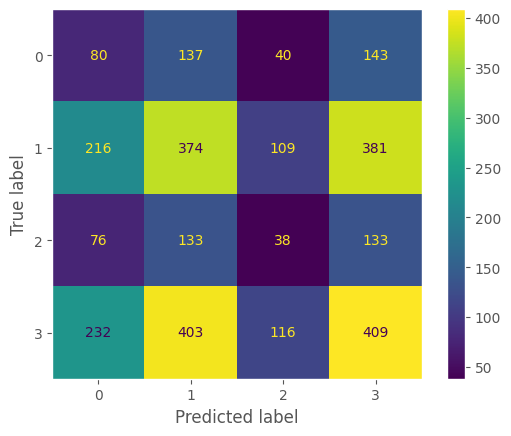

In [165]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_env2l_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("env2l")

plt.show()

In [85]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_env2l_n)
print(cf_r)

# NasNetLarge

In [86]:
import gc
gc.collect()

In [87]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnl = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnl.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [88]:
import gc
gc.collect()

In [89]:
def create_model_nnl():
    
    model_nnl = tf.keras.models.Sequential([
    tf.keras.applications.NASNetLarge(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnl.trainable = False
    return model_nnl

In [90]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnl = []
y_test_all_nnl = []
train_acc_nnl = []
test_acc_nnl = []
train_loss_nnl = []
test_loss_nnl = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_nnl.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnl = None
    model_nnl = create_model_nnl()
        
    model_nnl.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnl.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnl.predict(X_test)
    
    scores_nnl.append(x)
    train_acc_nnl.append(history.history["accuracy"])
    test_acc_nnl.append(history.history["val_accuracy"])
    train_loss_nnl.append(history.history["loss"])
    test_loss_nnl.append(history.history["val_loss"])
    
    gc.collect()

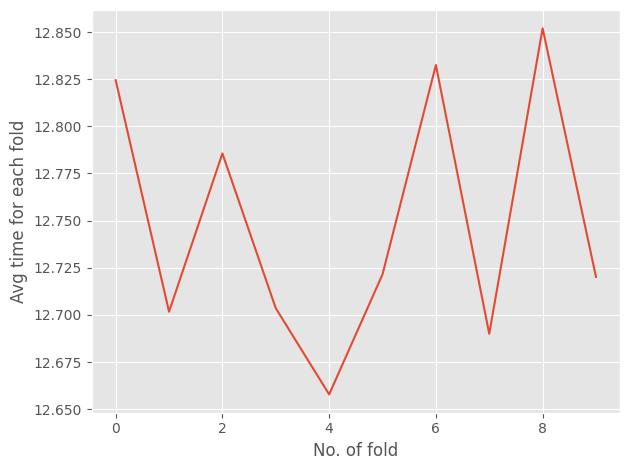

In [166]:
import matplotlib.pyplot as plt

times_nnl_n = np.zeros((10,100))
for i, row in enumerate(times_nnl):
    times_nnl_n[i, :len(row)] = row

times_nnl_n_n = np.mean(times_nnl_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnl_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnl times")
plt.show()

In [167]:
train_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnl):
    train_acc_nnl_n[i, :len(row)] = row
    
test_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnl):
    test_acc_nnl_n[i, :len(row)] = row
    
train_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnl):
    train_loss_nnl_n[i, :len(row)] = row
    
test_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnl):
    test_loss_nnl_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnl_n = np.mean(train_acc_nnl_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnl_n = np.mean(test_acc_nnl_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnl_n = np.mean(train_loss_nnl_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnl_n = np.mean(test_loss_nnl_n,axis=0)

In [168]:
data = [train_acc_nnl_n,test_acc_nnl_n,train_loss_nnl_n,test_loss_nnl_n]

df = pd.DataFrame(data)
df.to_csv('nnl_acc', index=False)
df = pd.read_csv('nnl_acc')

train_acc_nnl_n = df.iloc[0]
test_acc_nnl_n = df.iloc[1]
train_loss_nnl_n = df.iloc[2]
test_loss_nnl_n = df.iloc[3]


df_t = pd.DataFrame([times_nnl_n_n])
df_t.to_csv('nnl_times', index=False)
df_t = pd.read_csv('nnl_times')

times_nnl_n_n = df_t.iloc[0]

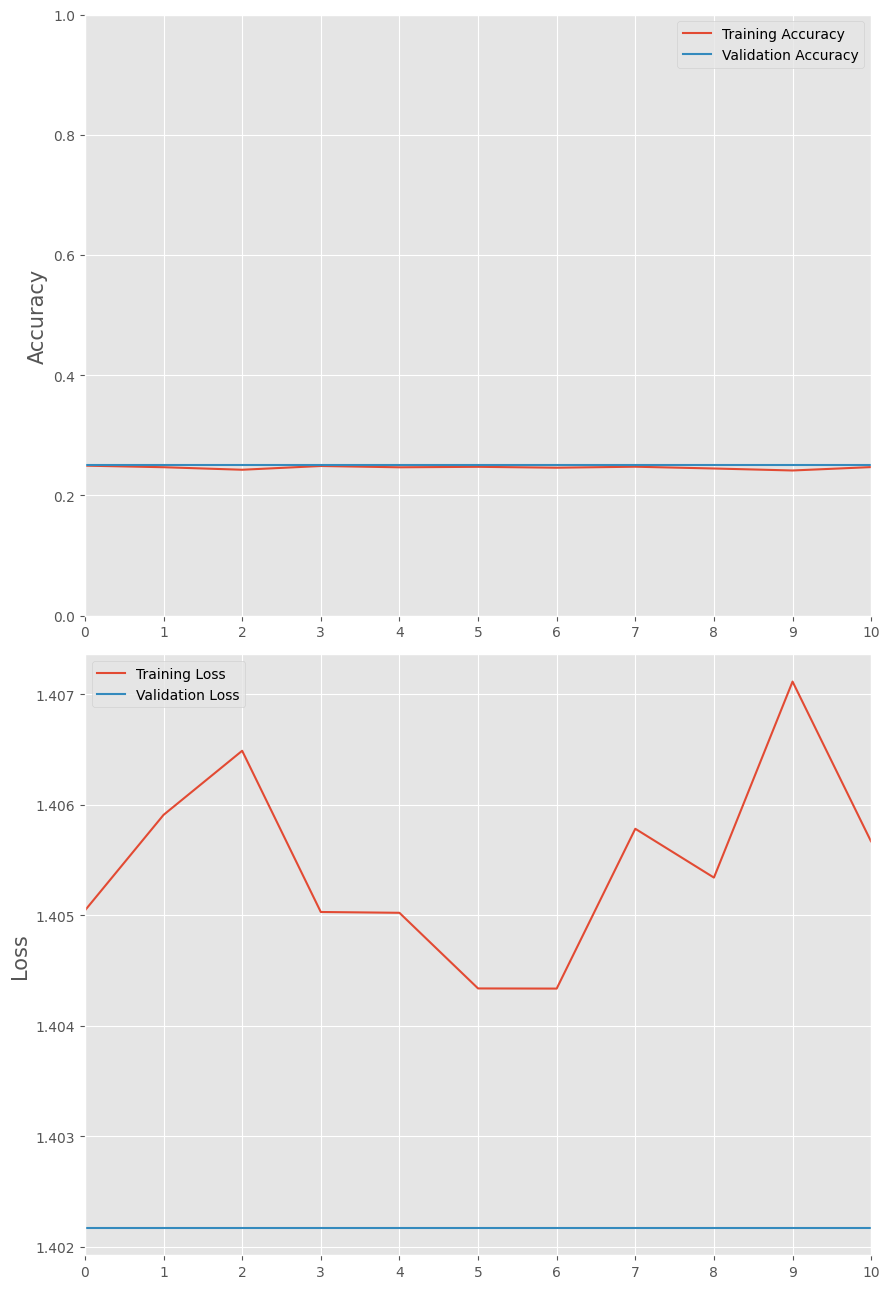

In [169]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnl_n, label='Training Accuracy')
axs[0].plot(test_acc_nnl_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnl_n, label='Training Loss')
axs[1].plot(test_loss_nnl_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnl Training and Testing Loss")
plt.show()

In [170]:
import gc
gc.collect()

29985

In [171]:
np.array(scores_nnl).shape

(10, 302, 4)

In [172]:
y_pred_nnl = np.argmax(scores_nnl,axis=2)

In [173]:
y_pred_nnl.shape

(10, 302)

In [174]:
from sklearn.metrics import accuracy_score
acc_scores_nnl = []
for i in range(len(y_test_all_nnl)):
    acc_scores_nnl.append(accuracy_score(y_true = y_test_all_nnl[i],y_pred = y_pred_nnl[i]))

In [175]:
acc_scores_nnl

[0.1390728476821192,
 0.3675496688741722,
 0.13245033112582782,
 0.11920529801324503,
 0.3443708609271523,
 0.1390728476821192,
 0.1390728476821192,
 0.3675496688741722,
 0.38079470198675497,
 0.347682119205298]

In [176]:
df_acc = pd.DataFrame([acc_scores_nnl])

df_acc.to_csv('nnl_accuracy', index=False)

df_acc = pd.read_csv('nnl_accuracy')

acc_scores_nnl = df_acc.iloc[0].values

In [177]:
y_test_all_n = np.array(y_test_all_nnl)

y_pred_nnl_n = y_pred_nnl.flatten()
y_test_all_n = y_test_all_n.flatten()

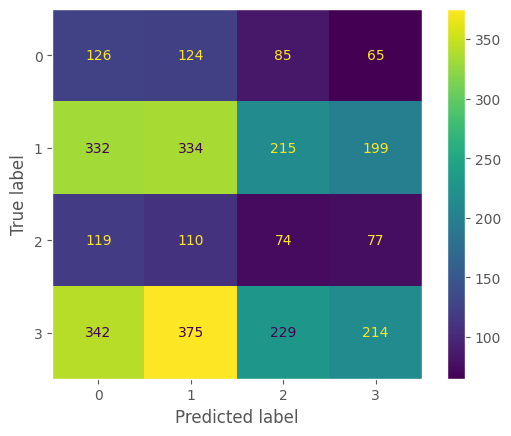

In [178]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnl_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnl")

plt.show()

In [179]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnl_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.14      0.32      0.19       400
           1       0.35      0.31      0.33      1080
           2       0.12      0.19      0.15       380
           3       0.39      0.18      0.25      1160

    accuracy                           0.25      3020
   macro avg       0.25      0.25      0.23      3020
weighted avg       0.31      0.25      0.26      3020



# NasNetMobile

In [105]:
import gc
gc.collect()

In [106]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnb = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnb.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [107]:
def create_model_nnb():
    
    model_nnb = tf.keras.models.Sequential([
    tf.keras.applications.NASNetMobile(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnb.trainable = False
    return model_nnb

In [108]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnb = []
y_test_all_nnb = []
train_acc_nnb = []
test_acc_nnb = []
train_loss_nnb = []
test_loss_nnb = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_nnb.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnb = None
    model_nnb = create_model_nnb()
        
    model_nnb.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnb.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnb.predict(X_test)
    
    scores_nnb.append(x)
    train_acc_nnb.append(history.history["accuracy"])
    test_acc_nnb.append(history.history["val_accuracy"])
    train_loss_nnb.append(history.history["loss"])
    test_loss_nnb.append(history.history["val_loss"])
    
    gc.collect()

In [109]:
import gc
gc.collect()

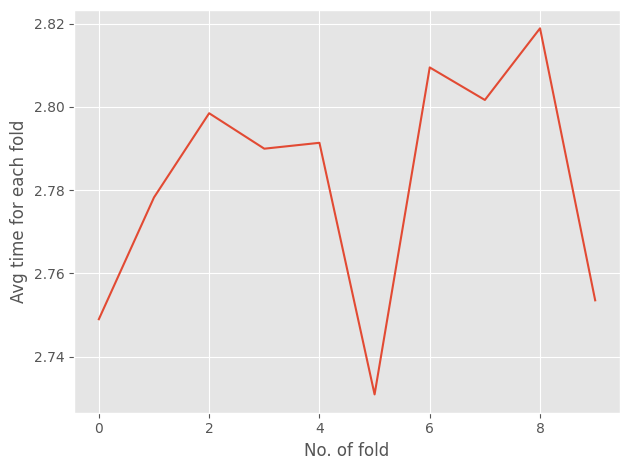

In [180]:
import matplotlib.pyplot as plt

times_nnb_n = np.zeros((10,100))
for i, row in enumerate(times_nnb):
    times_nnb_n[i, :len(row)] = row

times_nnb_n_n = np.mean(times_nnb_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnb_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnb times")
plt.show()

In [181]:
train_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnb):
    train_acc_nnb_n[i, :len(row)] = row
    
test_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnb):
    test_acc_nnb_n[i, :len(row)] = row
    
train_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnb):
    train_loss_nnb_n[i, :len(row)] = row
    
test_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnb):
    test_loss_nnb_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnb_n = np.mean(train_acc_nnb_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnb_n = np.mean(test_acc_nnb_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnb_n = np.mean(train_loss_nnb_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnb_n = np.mean(test_loss_nnb_n,axis=0)

In [182]:
data = [train_acc_nnb_n,test_acc_nnb_n,train_loss_nnb_n,test_loss_nnb_n]

df = pd.DataFrame(data)
df.to_csv('nnb_acc', index=False)
df = pd.read_csv('nnb_acc')

train_acc_nnb_n = df.iloc[0]
test_acc_nnb_n = df.iloc[1]
train_loss_nnb_n = df.iloc[2]
test_loss_nnb_n = df.iloc[3]


df_t = pd.DataFrame([times_nnb_n_n])
df_t.to_csv('nnb_times', index=False)
df_t = pd.read_csv('nnb_times')

times_nnb_n_n = df_t.iloc[0]

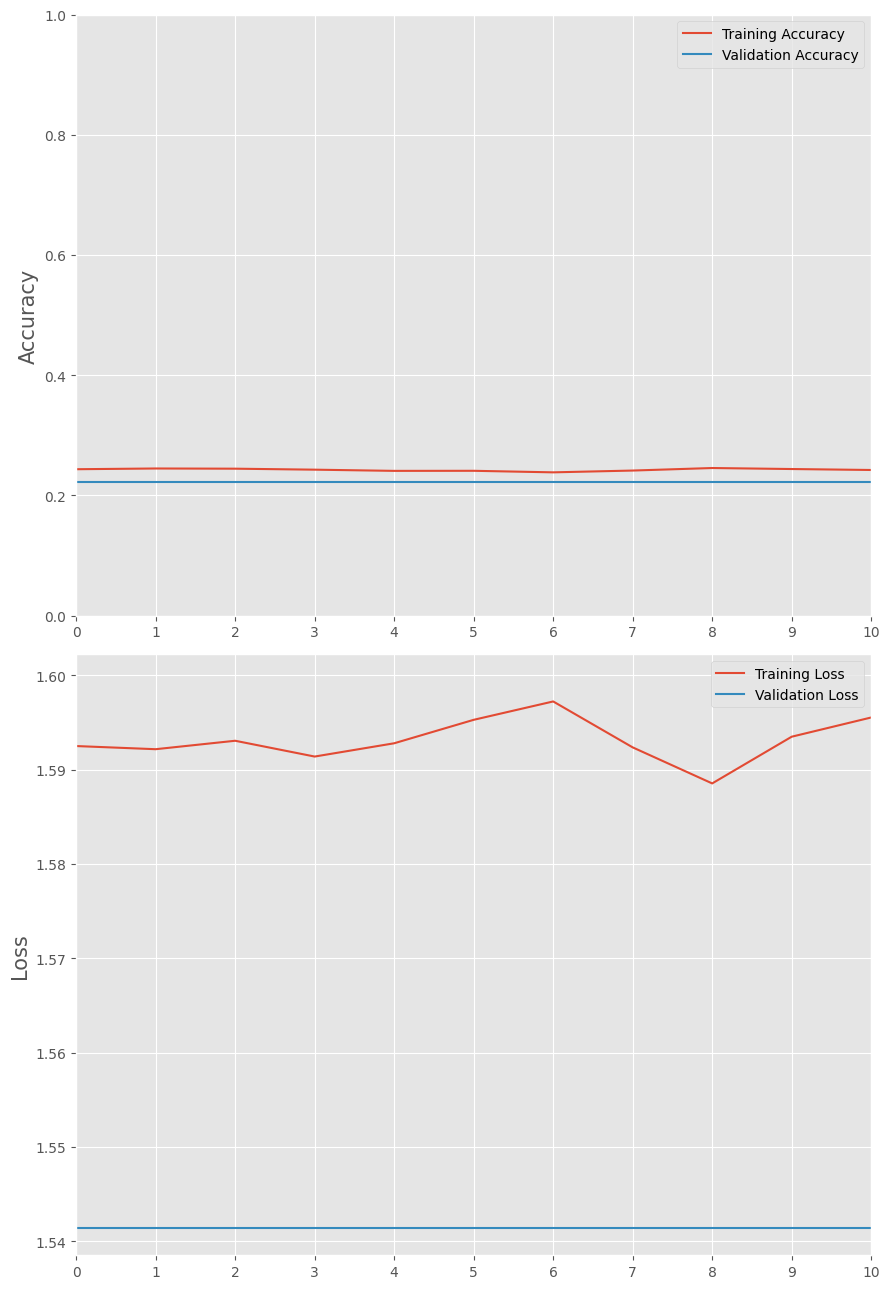

In [183]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnb_n, label='Training Accuracy')
axs[0].plot(test_acc_nnb_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnb_n, label='Training Loss')
axs[1].plot(test_loss_nnb_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnb Training and Testing Loss")
plt.show()

In [184]:
np.array(scores_nnb).shape

(10, 302, 4)

In [185]:
y_pred_nnb = np.argmax(scores_nnb,axis=2)

In [186]:
y_pred_nnb.shape

(10, 302)

In [187]:
from sklearn.metrics import accuracy_score
acc_scores_nnb = []
for i in range(len(y_test_all_nnb)):
    acc_scores_nnb.append(accuracy_score(y_true = y_test_all_nnb[i],y_pred = y_pred_nnb[i]))

In [188]:
import gc
gc.collect()

30214

In [189]:
acc_scores_nnb

[0.13245033112582782,
 0.26490066225165565,
 0.38079470198675497,
 0.1423841059602649,
 0.39072847682119205,
 0.16887417218543047,
 0.38079470198675497,
 0.1490066225165563,
 0.12251655629139073,
 0.15562913907284767]

In [190]:
df_acc = pd.DataFrame([acc_scores_nnb])

df_acc.to_csv('nnb_accuracy', index=False)

df_acc = pd.read_csv('nnb_accuracy')

acc_scores_nnb = df_acc.iloc[0].values

In [191]:
y_test_all_n = np.array(y_test_all_nnb)

y_pred_nnb_n = y_pred_nnb.flatten()
y_test_all_n = y_test_all_n.flatten()

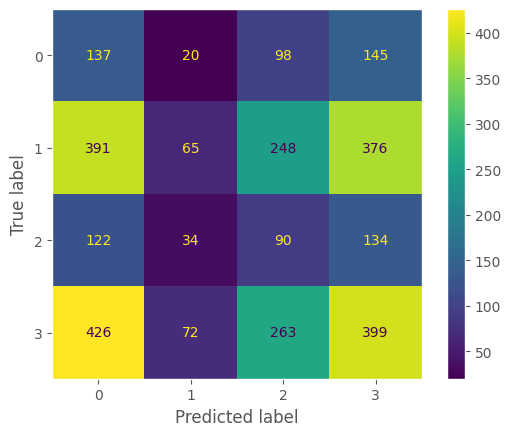

In [192]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnb_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnb")

plt.show()

In [193]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.34      0.19       400
           1       0.34      0.06      0.10      1080
           2       0.13      0.24      0.17       380
           3       0.38      0.34      0.36      1160

    accuracy                           0.23      3020
   macro avg       0.24      0.25      0.20      3020
weighted avg       0.30      0.23      0.22      3020



# AlexNet

In [124]:
import gc
gc.collect()

In [125]:
X.shape

In [126]:
X_tl = np.concatenate([X,X,X],axis=-1)

In [127]:
X_tl.shape

In [128]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_axn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_axn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [129]:
import gc
gc.collect()

In [130]:
from keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [131]:
def create_model_axn():
    
    model_axn = Sequential()
    model_axn.add(Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=(X_tl.shape[1],X_tl.shape[2],X_tl.shape[3]), activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(256,(5,5),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(256,(3,3),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model_axn.add(Flatten())
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4,activation='softmax'))

    return model_axn

In [132]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_axn = []
y_test_all_axn = []
train_acc_axn = []
test_acc_axn = []
train_loss_axn = []
test_loss_axn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X_n, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_tl[train_indices], X_tl[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_axn.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_axn = None
    model_axn = create_model_axn()
        
    model_axn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_axn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_axn.predict(X_test)
    
    scores_axn.append(x)
    train_acc_axn.append(history.history["accuracy"])
    test_acc_axn.append(history.history["val_accuracy"])
    train_loss_axn.append(history.history["loss"])
    test_loss_axn.append(history.history["val_loss"])
    
    gc.collect()

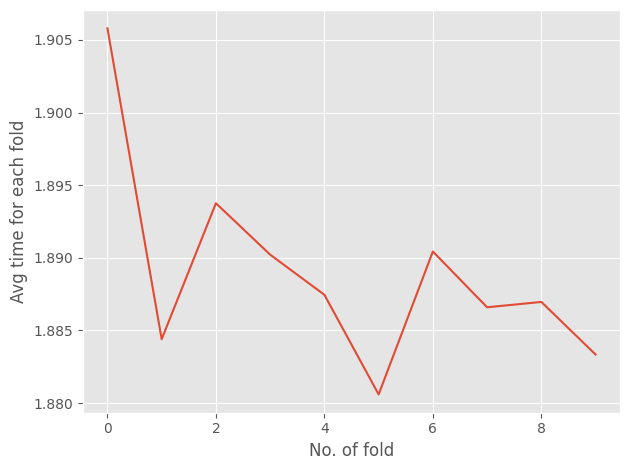

In [194]:
import matplotlib.pyplot as plt

times_axn_n = np.zeros((10,100))
for i, row in enumerate(times_axn):
    times_axn_n[i, :len(row)] = row

times_axn_n_n = np.mean(times_axn_n,axis=1)

plt.plot(times_axn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("axn times")
plt.show()

In [195]:
times_axn_n_n

array([1.90579975, 1.8843952 , 1.8937539 , 1.89021638, 1.88745172,
       1.88059197, 1.89043024, 1.88659212, 1.88695931, 1.88333822])

In [196]:
train_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_axn):
    train_acc_axn_n[i, :len(row)] = row
    
test_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_axn):
    test_acc_axn_n[i, :len(row)] = row
    
train_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_axn):
    train_loss_axn_n[i, :len(row)] = row
    
test_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_axn):
    test_loss_axn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_axn_n = np.mean(train_acc_axn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_axn_n = np.mean(test_acc_axn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_axn_n = np.mean(train_loss_axn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_axn_n = np.mean(test_loss_axn_n,axis=0)

In [197]:
data = [train_acc_axn_n,test_acc_axn_n,train_loss_axn_n,test_loss_axn_n]

df = pd.DataFrame(data)
df.to_csv('axn_acc', index=False)
df = pd.read_csv('axn_acc')

train_acc_axn_n = df.iloc[0]
test_acc_axn_n = df.iloc[1]
train_loss_axn_n = df.iloc[2]
test_loss_axn_n = df.iloc[3]


df_t = pd.DataFrame([times_axn_n_n])
df_t.to_csv('axn_times', index=False)
df_t = pd.read_csv('axn_times')

times_axn_n_n = df_t.iloc[0]

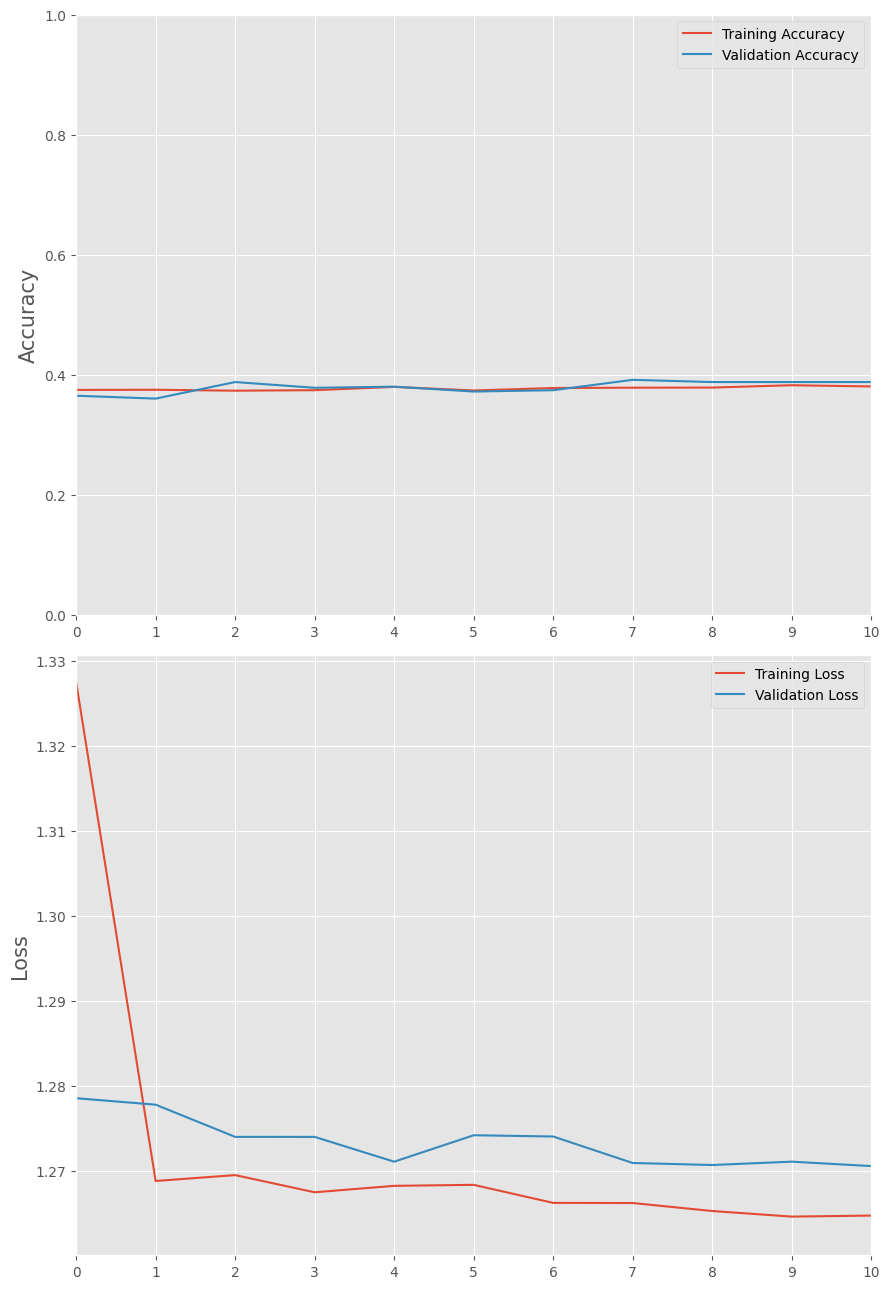

In [198]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_axn_n, label='Training Accuracy')
axs[0].plot(test_acc_axn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_axn_n, label='Training Loss')
axs[1].plot(test_loss_axn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim(train_loss_axn_n.min(),train_loss_axn_n.max())
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("axn Training and Testing Loss")
plt.show()

In [199]:
import gc
gc.collect()

30089

In [200]:
np.array(scores_axn).shape

(10, 302, 4)

In [201]:
y_pred_axn = np.argmax(scores_axn,axis=2)

In [202]:
y_pred_axn.shape

(10, 302)

In [203]:
from sklearn.metrics import accuracy_score
acc_scores_axn = []
for i in range(len(y_test_all_axn)):
    acc_scores_axn.append(accuracy_score(y_true = y_test_all_axn[i],y_pred = y_pred_axn[i]))

In [204]:
acc_scores_axn

[0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007]

In [205]:
df_acc = pd.DataFrame([acc_scores_axn])

df_acc.to_csv('axn_accuracy', index=False)

df_acc = pd.read_csv('axn_accuracy')

acc_scores_axn = df_acc.iloc[0].values

In [206]:
y_test_all_n = np.array(y_test_all_axn)

y_pred_axn_n = y_pred_axn.flatten()
y_test_all_n = y_test_all_n.flatten()

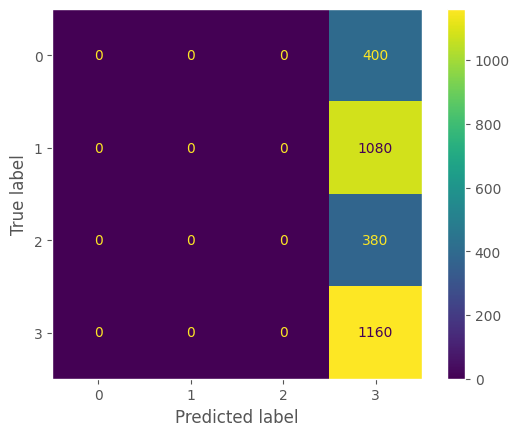

In [207]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_axn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("axn")
plt.show()

In [208]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_axn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.00      0.00      0.00      1080
           2       0.00      0.00      0.00       380
           3       0.38      1.00      0.56      1160

    accuracy                           0.38      3020
   macro avg       0.10      0.25      0.14      3020
weighted avg       0.15      0.38      0.21      3020



C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# EfficientNetB7

In [13]:
import gc
gc.collect()

0

In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_enb7 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_enb7.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [15]:
def create_model_enb7():
    
    model_enb7 = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetB7(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_enb7.trainable = False
    return model_enb7

In [16]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_enb7 = []
y_test_all_enb7 = []
train_acc_enb7 = []
test_acc_enb7 = []
train_loss_enb7 = []
test_loss_enb7 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_enb7.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_enb7 = None
    model_enb7 = create_model_enb7()
        
    model_enb7.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_enb7.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_enb7.predict(X_test)
    
    scores_enb7.append(x)
    train_acc_enb7.append(history.history["accuracy"])
    test_acc_enb7.append(history.history["val_accuracy"])
    train_loss_enb7.append(history.history["loss"])
    test_loss_enb7.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 31s 192ms/step - loss: 1.4734 - accuracy: 0.1958 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4712 - accuracy: 0.2003 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4757 - accuracy: 0.1823 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4655 - accuracy: 0.1913 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4716 - accuracy: 0.1922 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4730 - accuracy: 0.1889 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 7/100
77/77 [==============

77/77 [==============================] - ETA: 0s - loss: 1.4673 - accuracy: 0.1868
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.49 seconds
77/77 [==============================] - 12s 163ms/step - loss: 1.4673 - accuracy: 0.1868 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4731 - accuracy: 0.1966 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4803 - accuracy: 0.1803 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4803 - accuracy: 0.1787 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 12s 163ms/step - loss: 1.4748 - accuracy: 0.1901 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4650 - accuracy: 0.1942
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.48 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.4650 - accuracy: 0.1942 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4681 - accuracy: 0.1868 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4679 - accuracy: 0.1917 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4644 - accuracy: 0.1860 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4744 - accuracy: 0.1758 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4705 - accuracy: 0.1852
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.41 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.4705 - accuracy: 0.1852 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4731 - accuracy: 0.2016 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 12s 163ms/step - loss: 1.4721 - accuracy: 0.1930 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4737 - accuracy: 0.1807 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4843 - accuracy: 0.1791 - val_loss: 1.4364 - val_accuracy: 0.1397 - lr: 4.

Epoch 13/100
77/77 [==============================] - 12s 161ms/step - loss: 1.7910 - accuracy: 0.1578 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 163ms/step - loss: 1.8008 - accuracy: 0.1554 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.8063 - accuracy: 0.1484
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 12.57 seconds
77/77 [==============================] - 13s 164ms/step - loss: 1.8063 - accuracy: 0.1484 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 12s 162ms/step - loss: 1.7979 - accuracy: 0.1509 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 12s 162ms/step - loss: 1.8056 - accuracy: 0.1500 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 4

Epoch 41/100
77/77 [==============================] - 12s 161ms/step - loss: 1.8194 - accuracy: 0.1447 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 12s 162ms/step - loss: 1.7952 - accuracy: 0.1656 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.8141 - accuracy: 0.1574
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 12.47 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.8141 - accuracy: 0.1574 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 12s 162ms/step - loss: 1.8157 - accuracy: 0.1529 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 12s 162ms/step - loss: 1.8030 - accuracy: 0.1521 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 6.

Epoch 69/100
77/77 [==============================] - 12s 162ms/step - loss: 1.8041 - accuracy: 0.1488 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 12s 160ms/step - loss: 1.7952 - accuracy: 0.1578 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.8082 - accuracy: 0.1509
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 12.50 seconds
77/77 [==============================] - 12s 163ms/step - loss: 1.8082 - accuracy: 0.1509 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 12s 162ms/step - loss: 1.8014 - accuracy: 0.1537 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 13s 163ms/step - loss: 1.8106 - accuracy: 0.1566 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 1

Epoch 97/100
77/77 [==============================] - 13s 163ms/step - loss: 1.8126 - accuracy: 0.1509 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 12s 161ms/step - loss: 1.8094 - accuracy: 0.1513 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.8150 - accuracy: 0.1447
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 12.36 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.8150 - accuracy: 0.1447 - val_loss: 1.7097 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 3s 137ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 27s 190ms/step - loss: 1.3239 - accuracy: 0.3651 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 12s 161ms/

Epoch 25/100
77/77 [==============================] - 12s 161ms/step - loss: 1.3289 - accuracy: 0.3635 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 12s 161ms/step - loss: 1.3322 - accuracy: 0.3643 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 12s 162ms/step - loss: 1.3395 - accuracy: 0.3496 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 12s 163ms/step - loss: 1.3384 - accuracy: 0.3663 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.3319 - accuracy: 0.3663
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.47 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.3319 - accuracy: 0.3663 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 8

Epoch 53/100
77/77 [==============================] - 12s 162ms/step - loss: 1.3324 - accuracy: 0.3659 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 12s 161ms/step - loss: 1.3289 - accuracy: 0.3761 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3321 - accuracy: 0.3667 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 13s 163ms/step - loss: 1.3212 - accuracy: 0.3700 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3306 - accuracy: 0.3671
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.47 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.3306 - accuracy: 0.3671 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 1

Epoch 81/100
77/77 [==============================] - 13s 163ms/step - loss: 1.3318 - accuracy: 0.3688 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 12s 161ms/step - loss: 1.3294 - accuracy: 0.3675 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 12s 161ms/step - loss: 1.3278 - accuracy: 0.3651 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3291 - accuracy: 0.3585 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3275 - accuracy: 0.3688
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.49 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.3275 - accuracy: 0.3688 - val_loss: 1.3041 - val_accuracy: 0.3934 - lr: 2.

Epoch 9/100
77/77 [==============================] - 12s 162ms/step - loss: 1.7523 - accuracy: 0.1247 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 12s 161ms/step - loss: 1.7574 - accuracy: 0.1304 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 13s 163ms/step - loss: 1.7453 - accuracy: 0.1239 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 13s 166ms/step - loss: 1.7558 - accuracy: 0.1263 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 13s 163ms/step - loss: 1.7502 - accuracy: 0.1247 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 164ms/step - loss: 1.7578 - accuracy: 0.1300 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 12s 162ms/step - loss: 1.7630 - accuracy: 0.1284 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 12s 161ms/step - loss: 1.7561 - accuracy: 0.1267 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 12s 162ms/step - loss: 1.7591 - accuracy: 0.1243 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 13s 164ms/step - loss: 1.7457 - accuracy: 0.1296 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 12s 162ms/step - loss: 1.7417 - accuracy: 0.1288 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 12s 162ms/step - loss: 1.7579 - accuracy: 0.1226 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 65/100
77/77 [==============================] - 13s 163ms/step - loss: 1.7520 - accuracy: 0.1243 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 12s 162ms/step - loss: 1.7581 - accuracy: 0.1226 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 12s 162ms/step - loss: 1.7635 - accuracy: 0.1259 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 12s 162ms/step - loss: 1.7516 - accuracy: 0.1231 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 13s 163ms/step - loss: 1.7501 - accuracy: 0.1280 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 164ms/step - loss: 1.7506 - accuracy: 0.1312 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 5.1200e-10
Epoch 71/100
77/77 [========

Epoch 93/100
77/77 [==============================] - 13s 163ms/step - loss: 1.7510 - accuracy: 0.1194 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 13s 163ms/step - loss: 1.7433 - accuracy: 0.1312 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 12s 161ms/step - loss: 1.7645 - accuracy: 0.1280 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 12s 162ms/step - loss: 1.7455 - accuracy: 0.1296 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 13s 163ms/step - loss: 1.7587 - accuracy: 0.1251 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 164ms/step - loss: 1.7558 - accuracy: 0.1271 - val_loss: 1.7100 - val_accuracy: 0.1250 - lr: 8.1920e-13
Epoch 99/100
77/77 [========

77/77 [==============================] - 13s 163ms/step - loss: 1.5977 - accuracy: 0.2596 - val_loss: 1.5791 - val_accuracy: 0.3529 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.5957 - accuracy: 0.2478
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 12.47 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.5957 - accuracy: 0.2478 - val_loss: 1.5791 - val_accuracy: 0.3529 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 12s 162ms/step - loss: 1.5827 - accuracy: 0.2698 - val_loss: 1.5791 - val_accuracy: 0.3529 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 13s 163ms/step - loss: 1.5904 - accuracy: 0.2416 - val_loss: 1.5791 - val_accuracy: 0.3529 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5792 - accuracy: 0.2657 - val_loss: 1.5791 - val_accuracy: 0.3529 - lr: 8.0000e-06
Epoc

Epoch 49/100
77/77 [==============================] - 13s 163ms/step - loss: 1.5724 - accuracy: 0.2551 - val_loss: 1.5791 - val_accuracy: 0.3529 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.5812 - accuracy: 0.2670
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 12.53 seconds
77/77 [==============================] - 13s 163ms/step - loss: 1.5812 - accuracy: 0.2670 - val_loss: 1.5791 - val_accuracy: 0.3529 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 12s 162ms/step - loss: 1.5897 - accuracy: 0.2551 - val_loss: 1.5791 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 12s 162ms/step - loss: 1.5878 - accuracy: 0.2457 - val_loss: 1.5791 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5915 - accuracy: 0.2625 - val_loss: 1.5791 - val_accuracy: 0.3529 - lr: 1

Epoch 77/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5800 - accuracy: 0.2711 - val_loss: 1.5791 - val_accuracy: 0.3529 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.5894 - accuracy: 0.2682
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 12.54 seconds
77/77 [==============================] - 13s 163ms/step - loss: 1.5894 - accuracy: 0.2682 - val_loss: 1.5791 - val_accuracy: 0.3529 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 12s 162ms/step - loss: 1.5888 - accuracy: 0.2522 - val_loss: 1.5791 - val_accuracy: 0.3529 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 12s 162ms/step - loss: 1.5785 - accuracy: 0.2633 - val_loss: 1.5791 - val_accuracy: 0.3529 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 12s 162ms/step - loss: 1.5771 - accuracy: 0.2563 - val_loss: 1.5791 - val_accuracy: 0.3529 - lr: 2

Epoch 5/100
77/77 [==============================] - 12s 163ms/step - loss: 1.6074 - accuracy: 0.1958 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 12s 162ms/step - loss: 1.6020 - accuracy: 0.2003 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5917 - accuracy: 0.2093 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.5948 - accuracy: 0.2024
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 12.64 seconds
77/77 [==============================] - 13s 164ms/step - loss: 1.5948 - accuracy: 0.2024 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5913 - accuracy: 0.2085 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 10/100


Epoch 33/100
77/77 [==============================] - 13s 165ms/step - loss: 1.6016 - accuracy: 0.1991 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 12s 162ms/step - loss: 1.6011 - accuracy: 0.1987 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 12s 162ms/step - loss: 1.5944 - accuracy: 0.2122 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.5981 - accuracy: 0.2097
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 12.58 seconds
77/77 [==============================] - 13s 164ms/step - loss: 1.5981 - accuracy: 0.2097 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5960 - accuracy: 0.2187 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 3.

Epoch 61/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5982 - accuracy: 0.2003 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5918 - accuracy: 0.2093 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 12s 162ms/step - loss: 1.5983 - accuracy: 0.1954 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.5914 - accuracy: 0.2036
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 12.40 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.5914 - accuracy: 0.2036 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 13s 164ms/step - loss: 1.6012 - accuracy: 0.2187 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 5.12

Epoch 89/100
77/77 [==============================] - 12s 159ms/step - loss: 1.5992 - accuracy: 0.1922 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 12s 160ms/step - loss: 1.5905 - accuracy: 0.2110 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 12s 159ms/step - loss: 1.5999 - accuracy: 0.2097 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.5957 - accuracy: 0.2130
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 12.40 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.5957 - accuracy: 0.2130 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 12s 162ms/step - loss: 1.5951 - accuracy: 0.1991 - val_loss: 1.5613 - val_accuracy: 0.1176 - lr: 8.

Epoch 17/100
77/77 [==============================] - 13s 165ms/step - loss: 1.8826 - accuracy: 0.1276 - val_loss: 1.9367 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 12s 162ms/step - loss: 1.8825 - accuracy: 0.1304 - val_loss: 1.9367 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 12s 162ms/step - loss: 1.8810 - accuracy: 0.1259 - val_loss: 1.9367 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 12s 162ms/step - loss: 1.8813 - accuracy: 0.1300 - val_loss: 1.9367 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 13s 165ms/step - loss: 1.8747 - accuracy: 0.1308 - val_loss: 1.9367 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.8735 - accuracy: 0.1296
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for ep

Epoch 45/100
77/77 [==============================] - 13s 165ms/step - loss: 1.8719 - accuracy: 0.1312 - val_loss: 1.9367 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 13s 164ms/step - loss: 1.8860 - accuracy: 0.1304 - val_loss: 1.9367 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 12s 162ms/step - loss: 1.8899 - accuracy: 0.1267 - val_loss: 1.9367 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 13s 163ms/step - loss: 1.8801 - accuracy: 0.1284 - val_loss: 1.9367 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 13s 164ms/step - loss: 1.8783 - accuracy: 0.1288 - val_loss: 1.9367 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.8710 - accuracy: 0.1308
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for e

Epoch 73/100
77/77 [==============================] - 13s 164ms/step - loss: 1.8875 - accuracy: 0.1276 - val_loss: 1.9367 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 13s 164ms/step - loss: 1.8785 - accuracy: 0.1280 - val_loss: 1.9367 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 13s 163ms/step - loss: 1.8911 - accuracy: 0.1243 - val_loss: 1.9367 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 12s 162ms/step - loss: 1.8731 - accuracy: 0.1288 - val_loss: 1.9367 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 12s 162ms/step - loss: 1.8907 - accuracy: 0.1255 - val_loss: 1.9367 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.8738 - accuracy: 0.1284
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for e

10/10 [==============================] - 3s 138ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 24s 200ms/step - loss: 1.8134 - accuracy: 0.1300 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 163ms/step - loss: 1.8062 - accuracy: 0.1341 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 12s 162ms/step - loss: 1.8087 - accuracy: 0.1276 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 163ms/step - loss: 1.7974 - accuracy: 0.1267 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 13s 164ms/step - loss: 1.7951 - accuracy: 0.1235 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 164ms/step - loss: 1.7928 - accuracy: 0.1292 - val_loss: 1.7378 - val_accuracy

77/77 [==============================] - ETA: 0s - loss: 1.8030 - accuracy: 0.1353
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.59 seconds
77/77 [==============================] - 13s 164ms/step - loss: 1.8030 - accuracy: 0.1353 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 13s 165ms/step - loss: 1.8122 - accuracy: 0.1292 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 13s 163ms/step - loss: 1.7921 - accuracy: 0.1402 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 13s 163ms/step - loss: 1.8029 - accuracy: 0.1263 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 13s 163ms/step - loss: 1.8055 - accuracy: 0.1341 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.8142 - accuracy: 0.1251
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.63 seconds
77/77 [==============================] - 13s 164ms/step - loss: 1.8142 - accuracy: 0.1251 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 13s 165ms/step - loss: 1.8065 - accuracy: 0.1325 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 164ms/step - loss: 1.7962 - accuracy: 0.1370 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 163ms/step - loss: 1.8089 - accuracy: 0.1202 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 163ms/step - loss: 1.7966 - accuracy: 0.1321 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.7980 - accuracy: 0.1288
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.65 seconds
77/77 [==============================] - 13s 164ms/step - loss: 1.7980 - accuracy: 0.1288 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 13s 165ms/step - loss: 1.8015 - accuracy: 0.1226 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 13s 165ms/step - loss: 1.8010 - accuracy: 0.1312 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 163ms/step - loss: 1.8003 - accuracy: 0.1263 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 12s 162ms/step - loss: 1.7976 - accuracy: 0.1321 - val_loss: 1.7378 - val_accuracy: 0.1324 - lr: 4.

Epoch 13/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4959 - accuracy: 0.1913 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5046 - accuracy: 0.1909 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.4950 - accuracy: 0.1885
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 12.54 seconds
77/77 [==============================] - 13s 163ms/step - loss: 1.4950 - accuracy: 0.1885 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4949 - accuracy: 0.1934 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4958 - accuracy: 0.1975 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 4

Epoch 41/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5087 - accuracy: 0.1778 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5073 - accuracy: 0.1811 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.5055 - accuracy: 0.1901
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 12.55 seconds
77/77 [==============================] - 13s 163ms/step - loss: 1.5055 - accuracy: 0.1901 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 163ms/step - loss: 1.5009 - accuracy: 0.1922 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 163ms/step - loss: 1.5042 - accuracy: 0.1917 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 6.

Epoch 69/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5005 - accuracy: 0.1942 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5081 - accuracy: 0.1893 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.5031 - accuracy: 0.1962
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 12.65 seconds
77/77 [==============================] - 13s 165ms/step - loss: 1.5031 - accuracy: 0.1962 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 13s 163ms/step - loss: 1.5001 - accuracy: 0.1860 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 13s 163ms/step - loss: 1.5071 - accuracy: 0.1840 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 1

Epoch 97/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4896 - accuracy: 0.2085 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4921 - accuracy: 0.1856 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.4912 - accuracy: 0.2052
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 12.70 seconds
77/77 [==============================] - 13s 165ms/step - loss: 1.4912 - accuracy: 0.2052 - val_loss: 1.4381 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 3s 138ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 26s 194ms/step - loss: 1.3685 - accuracy: 0.3528 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 165ms

Epoch 25/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3639 - accuracy: 0.3639 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3661 - accuracy: 0.3557 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 13s 163ms/step - loss: 1.3667 - accuracy: 0.3639 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 13s 163ms/step - loss: 1.3564 - accuracy: 0.3630 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.3696 - accuracy: 0.3651
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.70 seconds
77/77 [==============================] - 13s 165ms/step - loss: 1.3696 - accuracy: 0.3651 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 8

Epoch 53/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3753 - accuracy: 0.3496 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 13s 163ms/step - loss: 1.3545 - accuracy: 0.3610 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3639 - accuracy: 0.3598 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3649 - accuracy: 0.3557 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3556 - accuracy: 0.3549
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.67 seconds
77/77 [==============================] - 13s 165ms/step - loss: 1.3556 - accuracy: 0.3549 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 1

Epoch 81/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3681 - accuracy: 0.3540 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3585 - accuracy: 0.3622 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3591 - accuracy: 0.3540 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 13s 163ms/step - loss: 1.3626 - accuracy: 0.3651 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3589 - accuracy: 0.3577
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.65 seconds
77/77 [==============================] - 13s 164ms/step - loss: 1.3589 - accuracy: 0.3577 - val_loss: 1.3106 - val_accuracy: 0.3713 - lr: 2.

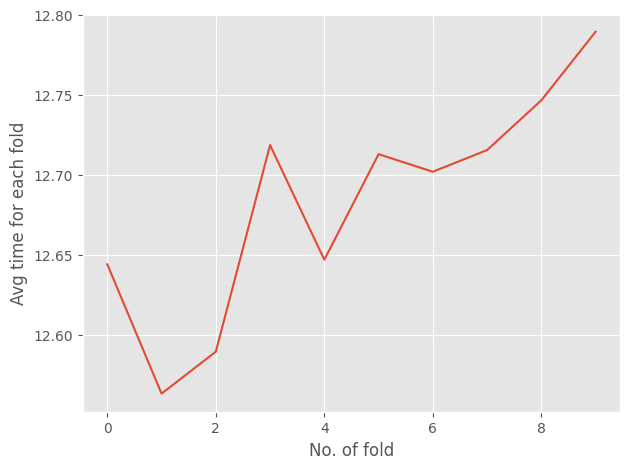

In [17]:
import matplotlib.pyplot as plt

times_enb7_n = np.zeros((10,100))
for i, row in enumerate(times_enb7):
    times_enb7_n[i, :len(row)] = row

times_enb7_n_n = np.mean(times_enb7_n,axis=1)
plt.style.use('ggplot')
plt.plot(times_enb7_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")

plt.tight_layout()
plt.savefig("enb7 times")
plt.show()

In [18]:
import gc
gc.collect()

3247

In [19]:
train_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_acc_enb7):
    train_acc_enb7_n[i, :len(row)] = row
    
test_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_acc_enb7):
    test_acc_enb7_n[i, :len(row)] = row
    
train_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_loss_enb7):
    train_loss_enb7_n[i, :len(row)] = row
    
test_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_loss_enb7):
    test_loss_enb7_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_enb7_n = np.mean(train_acc_enb7_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_enb7_n = np.mean(test_acc_enb7_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_enb7_n = np.mean(train_loss_enb7_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_enb7_n = np.mean(test_loss_enb7_n,axis=0)

In [20]:
data = [train_acc_enb7_n,test_acc_enb7_n,train_loss_enb7_n,test_loss_enb7_n]

df = pd.DataFrame(data)
df.to_csv('enb7_acc', index=False)
df = pd.read_csv('enb7_acc')

train_acc_enb7_n = df.iloc[0]
test_acc_enb7_n = df.iloc[1]
train_loss_enb7_n = df.iloc[2]
test_loss_enb7_n = df.iloc[3]


df_t = pd.DataFrame([times_enb7_n_n])
df_t.to_csv('enb7_times', index=False)
df_t = pd.read_csv('enb7_times')

times_enb7_n_n = df_t.iloc[0]

In [21]:
test_loss_enb7_n

0     1.572391
1     1.572391
2     1.572391
3     1.572391
4     1.572391
        ...   
95    1.585503
96    1.585503
97    1.585503
98    1.585503
99    1.585503
Name: 3, Length: 100, dtype: float64

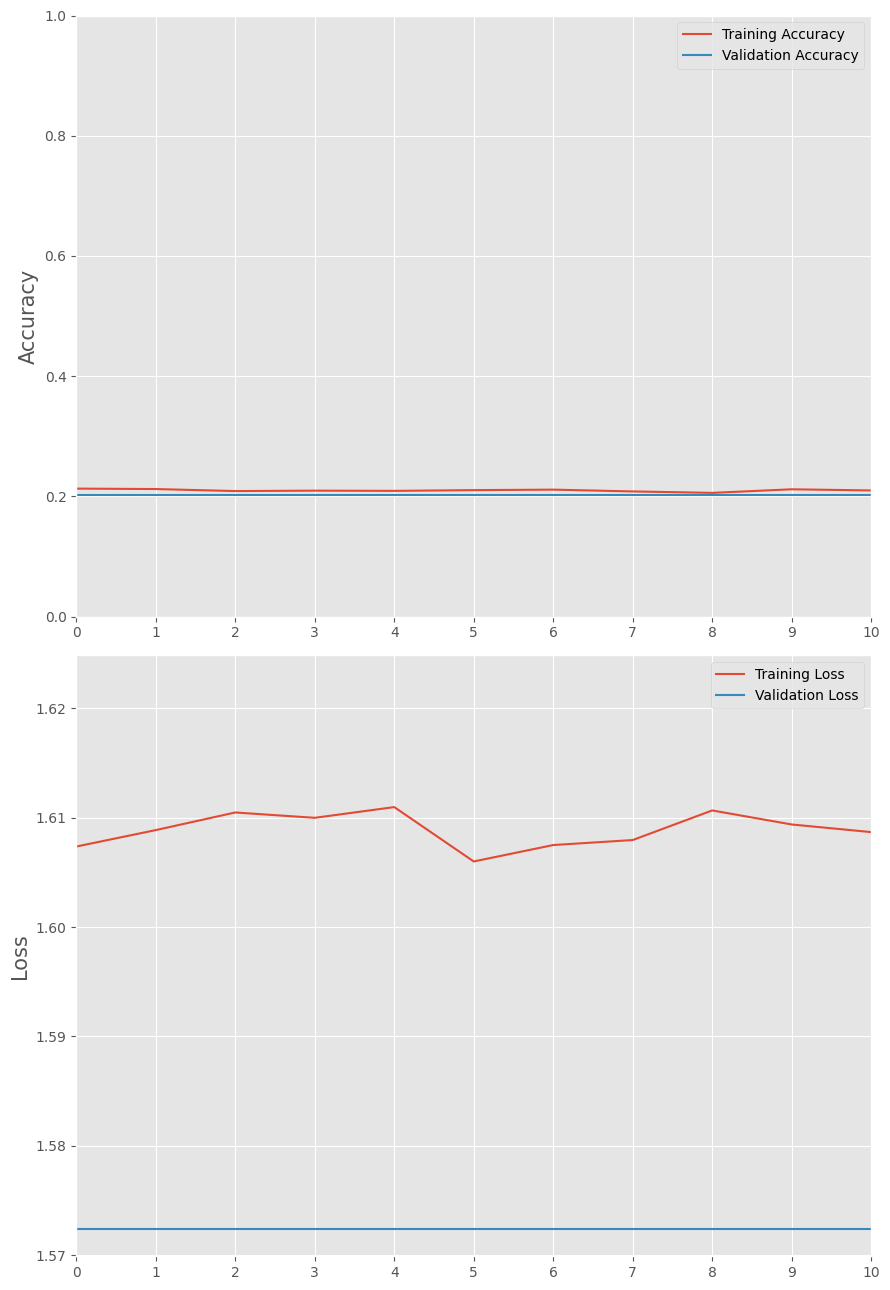

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_enb7_n, label='Training Accuracy')
axs[0].plot(test_acc_enb7_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_enb7_n, label='Training Loss')
axs[1].plot(test_loss_enb7_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,10])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("enb7 Training and Testing Loss")
plt.show()

In [23]:
np.array(scores_enb7).shape

(10, 302, 4)

In [24]:
y_pred_enb7 = np.argmax(scores_enb7,axis=2)

In [25]:
y_pred_enb7.shape

(10, 302)

In [26]:
np.array(y_test_all_enb7).shape

(10, 302)

In [27]:
from sklearn.metrics import accuracy_score
acc_scores_enb7 = []
for i in range(len(y_test_all_enb7)):
    acc_scores_enb7.append(accuracy_score(y_true = y_test_all_enb7[i],y_pred = y_pred_enb7[i]))

In [28]:
acc_scores_enb7

[0.13245033112582782,
 0.12582781456953643,
 0.3841059602649007,
 0.12582781456953643,
 0.3841059602649007,
 0.13245033112582782,
 0.12582781456953643,
 0.12582781456953643,
 0.13245033112582782,
 0.3576158940397351]

In [29]:
df_acc = pd.DataFrame([acc_scores_enb7])

df_acc.to_csv('enb7_accuracy', index=False)

df_acc = pd.read_csv('enb7_accuracy')

acc_scores_enb7 = df_acc.iloc[0].values

In [30]:
y_test_all_n = np.array(y_test_all_enb7)

y_pred_enb7_n = y_pred_enb7.flatten()
y_test_all_n = y_test_all_n.flatten()

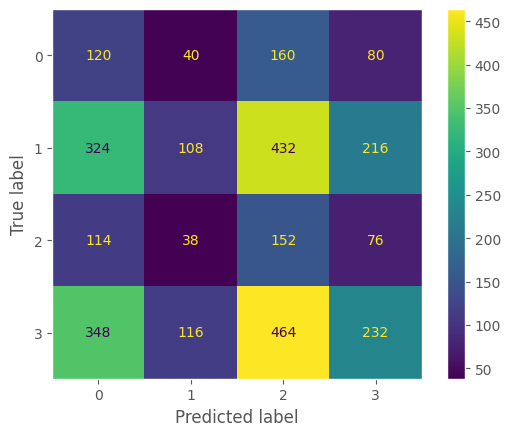

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_enb7_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("enb7")

plt.show()

In [32]:
import gc
gc.collect()

65

In [33]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_enb7_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.30      0.18       400
           1       0.36      0.10      0.16      1080
           2       0.13      0.40      0.19       380
           3       0.38      0.20      0.26      1160

    accuracy                           0.20      3020
   macro avg       0.25      0.25      0.20      3020
weighted avg       0.31      0.20      0.21      3020



# ResNetV2

In [34]:
import gc
gc.collect()

0

In [35]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_rnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_rnv2.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [36]:
def create_model_rnv2():

    model_rnv2 = tf.keras.Sequential([
    tf.keras.applications.ResNet50V2(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_rnv2.trainable = False
    return model_rnv2

In [37]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rnv2 = []
y_test_all_rnv2 = []
train_acc_rnv2 = []
test_acc_rnv2 = []
train_loss_rnv2 = []
test_loss_rnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_rnv2.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_rnv2 = None
    model_rnv2 = create_model_rnv2()
        
    model_rnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_rnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_rnv2.predict(X_test)
    
    scores_rnv2.append(x)
    train_acc_rnv2.append(history.history["accuracy"])
    test_acc_rnv2.append(history.history["val_accuracy"])
    train_loss_rnv2.append(history.history["loss"])
    test_loss_rnv2.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 5s 46ms/step - loss: 1.4699 - accuracy: 0.2944 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4784 - accuracy: 0.2911 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4747 - accuracy: 0.3058 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4668 - accuracy: 0.2886 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4794 - accuracy: 0.2850 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4877 - accuracy: 0.2956 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Time taken for epoch 29: 3.03 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.4810 - accuracy: 0.2927 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4705 - accuracy: 0.2833 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4731 - accuracy: 0.2952 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4806 - accuracy: 0.2931 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4826 - accuracy: 0.2866 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4882 - accuracy: 0.2829 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4890 - accuracy: 0.2850 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4654 - accuracy: 0.3029 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4685 - accuracy: 0.2960 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4756 - accuracy: 0.2862 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4722 - accuracy: 0.3009 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4721 - accuracy: 0.2862 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 2.5600e-09
Epoch 64/100
75/77 [====================

77/77 [==============================] - 3s 39ms/step - loss: 1.4753 - accuracy: 0.2890 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4762 - accuracy: 0.2964 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4869 - accuracy: 0.2870 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4878 - accuracy: 0.2796 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4903 - accuracy: 0.2866 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4655 - accuracy: 0.2956 - val_loss: 1.4331 - val_accuracy: 0.2757 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] -

Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 2.0894 - accuracy: 0.1316
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.00 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.0894 - accuracy: 0.1316 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0961 - accuracy: 0.1337 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0929 - accuracy: 0.1337 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0913 - accuracy: 0.1345 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0898 - accuracy: 0.1361 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 2.0968 - accuracy: 0.1361
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 2.99 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.0980 - accuracy: 0.1353 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1068 - accuracy: 0.1365 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0951 - accuracy: 0.1341 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1035 - accuracy: 0.1333 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0992 - accuracy: 0.1337 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 6.4000e-08
Epoch 48/100
77

77/77 [==============================] - ETA: 0s - loss: 2.0991 - accuracy: 0.1341
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 2.98 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.0991 - accuracy: 0.1341 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0986 - accuracy: 0.1321 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0989 - accuracy: 0.1341 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0902 - accuracy: 0.1341 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1024 - accuracy: 0.1357 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 1.0240e-10
Epoch 76/100
7

76/77 [============================>.] - ETA: 0s - loss: 2.1014 - accuracy: 0.1336
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.02 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.1010 - accuracy: 0.1337 - val_loss: 1.9997 - val_accuracy: 0.1397 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 33ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 5s 50ms/step - loss: 1.6505 - accuracy: 0.2473 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6255 - accuracy: 0.2625 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6316 - accuracy: 0.2559 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6678 - accuracy: 0.2

77/77 [==============================] - 3s 39ms/step - loss: 1.6582 - accuracy: 0.2420 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6442 - accuracy: 0.2522 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.6394 - accuracy: 0.2576
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.03 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.6394 - accuracy: 0.2576 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6492 - accuracy: 0.2563 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6440 - accuracy: 0.2551 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 3s 39ms/step - loss: 1.6629 - accuracy: 0.2547 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6467 - accuracy: 0.2457 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 1.6431 - accuracy: 0.2471
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.02 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.6442 - accuracy: 0.2461 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6587 - accuracy: 0.2453 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6544 - accuracy: 0.2404 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 2.5600e-09
Epoch 60/100
7

77/77 [==============================] - 3s 39ms/step - loss: 1.6517 - accuracy: 0.2612 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6660 - accuracy: 0.2469 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 1.6526 - accuracy: 0.2479
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.00 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.6522 - accuracy: 0.2486 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6535 - accuracy: 0.2465 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6604 - accuracy: 0.2531 - val_loss: 1.5189 - val_accuracy: 0.3015 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 3s 39ms/step - loss: 1.8100 - accuracy: 0.1599 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7984 - accuracy: 0.1672 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8044 - accuracy: 0.1533 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8082 - accuracy: 0.1664 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 2.0000e-04
Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 1.8154 - accuracy: 0.1501
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.01 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.8152 - accuracy: 0.1504 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 2.0000e-04
Epoch 16/100
7

77/77 [==============================] - 3s 39ms/step - loss: 1.8061 - accuracy: 0.1594 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8174 - accuracy: 0.1599 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7869 - accuracy: 0.1594 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8122 - accuracy: 0.1574 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.8005 - accuracy: 0.1582
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 3.06 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.8005 - accuracy: 0.1582 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 3s 39ms/step - loss: 1.7850 - accuracy: 0.1652 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7983 - accuracy: 0.1668 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8079 - accuracy: 0.1664 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8118 - accuracy: 0.1611 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 5.1200e-10
Epoch 71/100
76/77 [============================>.] - ETA: 0s - loss: 1.7973 - accuracy: 0.1661
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.03 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.8008 - accuracy: 0.1656 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 5.1200e-10
Epoch 72/100
7

77/77 [==============================] - 3s 40ms/step - loss: 1.7984 - accuracy: 0.1603 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7996 - accuracy: 0.1615 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8060 - accuracy: 0.1578 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7930 - accuracy: 0.1594 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.8121 - accuracy: 0.1562
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.01 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.8121 - accuracy: 0.1562 - val_loss: 1.7818 - val_accuracy: 0.1213 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 3s 39ms/step - loss: 1.4675 - accuracy: 0.3087 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4608 - accuracy: 0.3148 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4632 - accuracy: 0.3005 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4617 - accuracy: 0.3123 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4558 - accuracy: 0.3029 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4525 - accuracy: 0.3054 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] -

77/77 [==============================] - 3s 39ms/step - loss: 1.4696 - accuracy: 0.3111 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4579 - accuracy: 0.3091 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4686 - accuracy: 0.3119 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4829 - accuracy: 0.3001 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4716 - accuracy: 0.3140 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4809 - accuracy: 0.3054 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] -

77/77 [==============================] - 3s 39ms/step - loss: 1.4750 - accuracy: 0.3005 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4891 - accuracy: 0.2886 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4777 - accuracy: 0.2952 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4615 - accuracy: 0.3136 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4595 - accuracy: 0.3042 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4704 - accuracy: 0.3128 - val_loss: 1.3973 - val_accuracy: 0.3419 - lr: 2.0480e-11
Epoch 85/100
75/77 [============================>.] -

77/77 [==============================] - 3s 39ms/step - loss: 1.8482 - accuracy: 0.1680 - val_loss: 1.6889 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.8448 - accuracy: 0.1657
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 2.95 seconds
77/77 [==============================] - 3s 38ms/step - loss: 1.8429 - accuracy: 0.1668 - val_loss: 1.6889 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8354 - accuracy: 0.1639 - val_loss: 1.6889 - val_accuracy: 0.1765 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8422 - accuracy: 0.1729 - val_loss: 1.6889 - val_accuracy: 0.1765 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8270 - accuracy: 0.1742 - val_loss: 1.6889 - val_accuracy: 0.1765 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 3s 39ms/step - loss: 1.8350 - accuracy: 0.1725 - val_loss: 1.6889 - val_accuracy: 0.1765 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 1.8472 - accuracy: 0.1579
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 3.01 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.8478 - accuracy: 0.1574 - val_loss: 1.6889 - val_accuracy: 0.1765 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8529 - accuracy: 0.1627 - val_loss: 1.6889 - val_accuracy: 0.1765 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8368 - accuracy: 0.1717 - val_loss: 1.6889 - val_accuracy: 0.1765 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8398 - accuracy: 0.1676 - val_loss: 1.6889 - val_accuracy: 0.1765 - lr: 3.2000e-07
Epoch 40/100
77

58/77 [=====================>........] - ETA: 0s - loss: 1.8359 - accuracy: 0.1692

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [109]:
import gc
gc.collect()

527

In [110]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

times_rnv2_n = np.zeros((10,100))
for i, row in enumerate(times_rnv2):
    times_rnv2_n[i, :len(row)] = row

times_rnv2_n_n = np.mean(times_rnv2_n,axis=1)

plt.plot(times_rnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")

plt.tight_layout()
plt.savefig("rnv2 times")
plt.show()

TypeError: 'numpy.float64' object is not iterable

In [111]:
train_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_rnv2):
    train_acc_rnv2_n[i, :len(row)] = row
    
test_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_rnv2):
    test_acc_rnv2_n[i, :len(row)] = row
    
train_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_rnv2):
    train_loss_rnv2_n[i, :len(row)] = row
    
test_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_rnv2):
    test_loss_rnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_rnv2_n = np.mean(train_acc_rnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_rnv2_n = np.mean(test_acc_rnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_rnv2_n = np.mean(train_loss_rnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_rnv2_n = np.mean(test_loss_rnv2_n,axis=0)

In [112]:
data = [train_acc_rnv2_n,test_acc_rnv2_n,train_loss_rnv2_n,test_loss_rnv2_n]

df = pd.DataFrame(data)
df.to_csv('rnv2_acc', index=False)
df = pd.read_csv('rnv2_acc')

train_acc_rnv2_n = df.iloc[0]
test_acc_rnv2_n = df.iloc[1]
train_loss_rnv2_n = df.iloc[2]
test_loss_rnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_rnv2_n_n])
df_t.to_csv('rnv2_times', index=False)
df_t = pd.read_csv('rnv2_times')

times_rnv2_n_n = df_t.iloc[0]

In [113]:
train_acc_rnv2_n

0     0.231603
1     0.230785
2     0.234751
3     0.231276
4     0.230049
        ...   
95    0.235854
96    0.229599
97    0.232216
98    0.230744
99    0.227923
Name: 0, Length: 100, dtype: float64

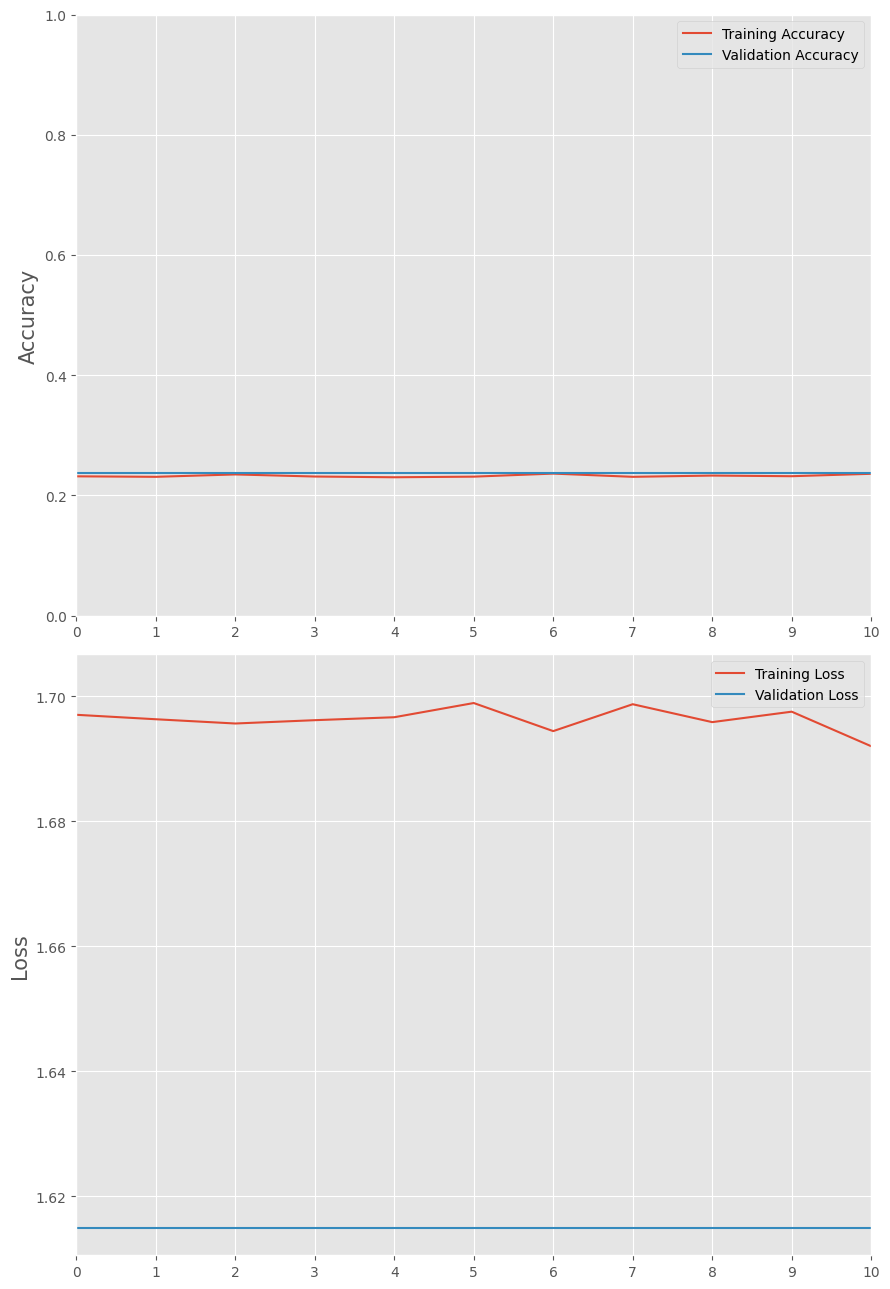

In [114]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_rnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_rnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_rnv2_n, label='Training Loss')
axs[1].plot(test_loss_rnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("rnv2 Training and Testing Loss")
plt.show()

In [115]:
np.array(scores_rnv2).shape

(10, 302, 4)

In [116]:
y_pred_rnv2 = np.argmax(scores_rnv2,axis=2)

In [117]:
y_pred_rnv2.shape

(10, 302)

In [118]:
from sklearn.metrics import accuracy_score
acc_scores_rnv2 = []
for i in range(len(y_test_all_rnv2)):
    acc_scores_rnv2.append(accuracy_score(y_true = y_test_all_rnv2[i],y_pred = y_pred_rnv2[i]))

In [119]:
import gc
gc.collect()

23618

In [120]:
acc_scores_rnv2

[0.2913907284768212,
 0.13245033112582782,
 0.27483443708609273,
 0.1357615894039735,
 0.3443708609271523,
 0.13245033112582782,
 0.3973509933774834,
 0.347682119205298,
 0.1357615894039735,
 0.12582781456953643]

In [121]:
df_acc = pd.DataFrame([acc_scores_rnv2])

df_acc.to_csv('rnv2_accuracy', index=False)

df_acc = pd.read_csv('rnv2_accuracy')

acc_scores_rnv2 = df_acc.iloc[0].values

In [122]:
y_test_all_n = np.array(y_test_all_rnv2)

y_pred_rnv2_n = y_pred_rnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

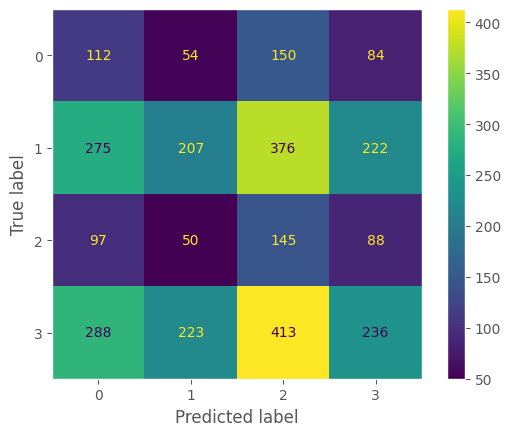

In [123]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_rnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("rnv2")
plt.show()

In [124]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_rnv2_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.15      0.28      0.19       400
           1       0.39      0.19      0.26      1080
           2       0.13      0.38      0.20       380
           3       0.37      0.20      0.26      1160

    accuracy                           0.23      3020
   macro avg       0.26      0.26      0.23      3020
weighted avg       0.32      0.23      0.24      3020



# VGG16

In [125]:
import gc
gc.collect()

6323

In [126]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg16 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg16.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [56]:
def create_model_vgg16():

    model_vgg16 = tf.keras.Sequential([
    tf.keras.applications.VGG16(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg16.trainable = False
    return model_vgg16

In [57]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg16 = []
y_test_all_vgg16 = []
train_acc_vgg16 = []
test_acc_vgg16 = []
train_loss_vgg16 = []
test_loss_vgg16 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_vgg16.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg16 = None
    model_vgg16 = create_model_vgg16()
        
    model_vgg16.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg16.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg16.predict(X_test)
    
    scores_vgg16.append(x)
    train_acc_vgg16.append(history.history["accuracy"])
    test_acc_vgg16.append(history.history["val_accuracy"])
    train_loss_vgg16.append(history.history["loss"])
    test_loss_vgg16.append(history.history["val_loss"])
    
    gc.collect()

In [127]:
import gc
gc.collect()

5

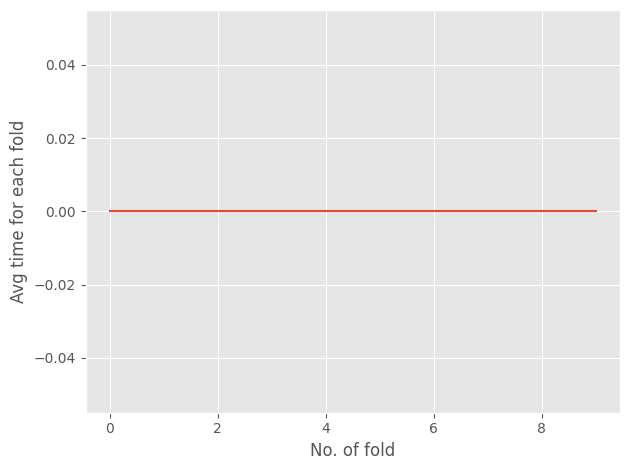

In [128]:
import matplotlib.pyplot as plt

times_vgg16_n = np.zeros((10,100))
for i, row in enumerate(times_vgg16):
    times_vgg16_n[i, :len(row)] = row

times_vgg16_n_n = np.mean(times_vgg16_n,axis=1)

plt.plot(times_vgg16_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg16 times")
plt.show()

In [129]:
train_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg16):
    train_acc_vgg16_n[i, :len(row)] = row
    
test_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg16):
    test_acc_vgg16_n[i, :len(row)] = row
    
train_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg16):
    train_loss_vgg16_n[i, :len(row)] = row
    
test_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg16):
    test_loss_vgg16_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg16_n = np.mean(train_acc_vgg16_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg16_n = np.mean(test_acc_vgg16_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg16_n = np.mean(train_loss_vgg16_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg16_n = np.mean(test_loss_vgg16_n,axis=0)

In [130]:
data = [train_acc_vgg16_n,test_acc_vgg16_n,train_loss_vgg16_n,test_loss_vgg16_n]

df = pd.DataFrame(data)
df.to_csv('vgg16_acc', index=False)
df = pd.read_csv('vgg16_acc')

train_acc_vgg16_n = df.iloc[0]
test_acc_vgg16_n = df.iloc[1]
train_loss_vgg16_n = df.iloc[2]
test_loss_vgg16_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg16_n_n])
df_t.to_csv('vgg16_times', index=False)
df_t = pd.read_csv('vgg16_times')

times_vgg16_n_n = df_t.iloc[0]

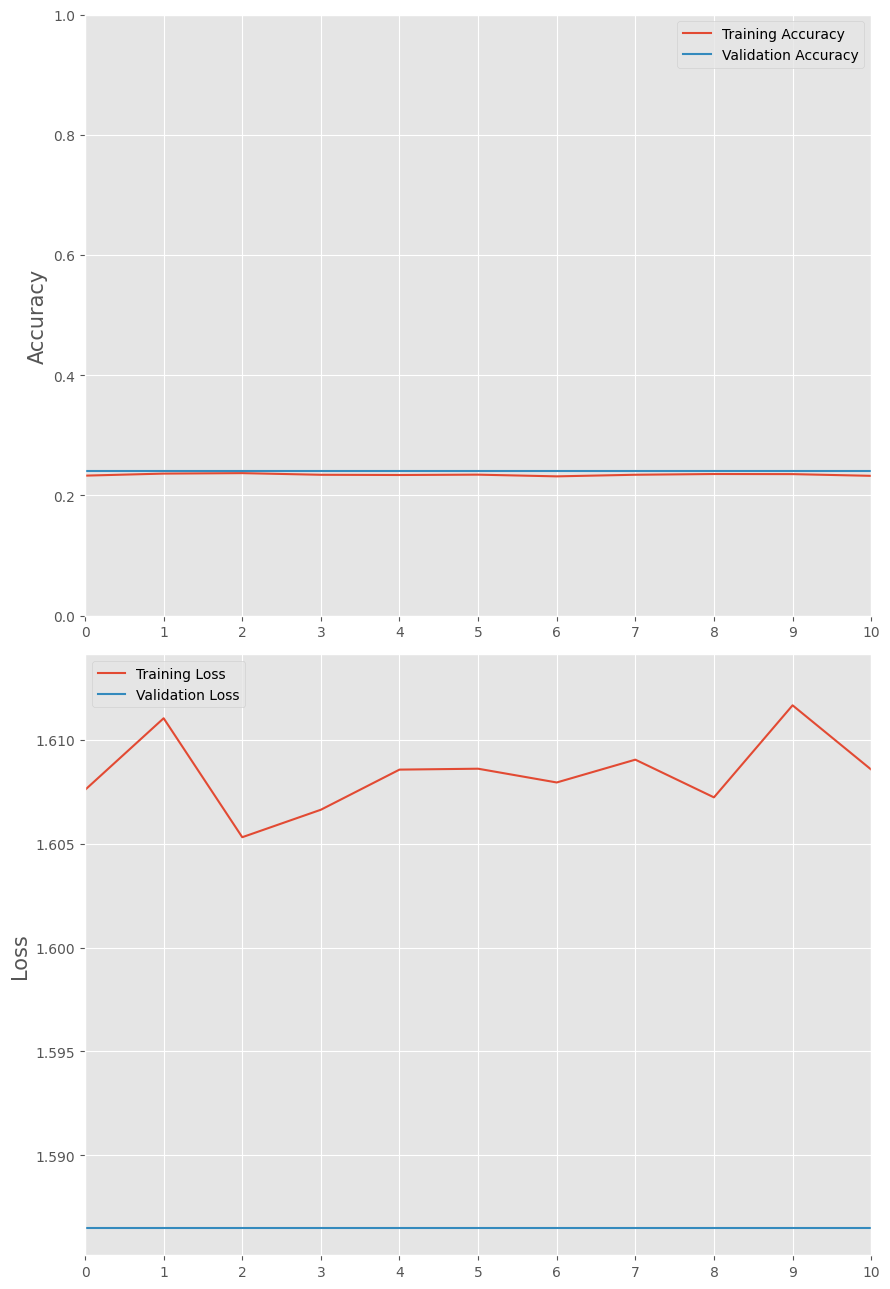

In [131]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg16_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg16_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg16_n, label='Training Loss')
axs[1].plot(test_loss_vgg16_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg16 Training and Testing Loss")
plt.show()

In [132]:
np.array(scores_vgg16).shape

(10, 302, 4)

In [133]:
y_pred_vgg16 = np.argmax(scores_vgg16,axis=2)

In [134]:
y_pred_vgg16.shape

(10, 302)

In [135]:
from sklearn.metrics import accuracy_score
acc_scores_vgg16 = []
for i in range(len(y_test_all_vgg16)):
    acc_scores_vgg16.append(accuracy_score(y_true = y_test_all_vgg16[i],y_pred = y_pred_vgg16[i]))

In [136]:
acc_scores_vgg16

[0.12582781456953643,
 0.3576158940397351,
 0.3576158940397351,
 0.13245033112582782,
 0.3841059602649007,
 0.12582781456953643,
 0.2582781456953642,
 0.13245033112582782,
 0.32781456953642385,
 0.33774834437086093]

In [137]:
df_acc = pd.DataFrame([acc_scores_vgg16])

df_acc.to_csv('vgg16_accuracy', index=False)

df_acc = pd.read_csv('vgg16_accuracy')

acc_scores_vgg16 = df_acc.iloc[0].values

In [138]:
y_test_all_n = np.array(y_test_all_vgg16)

y_pred_vgg16_n = y_pred_vgg16.flatten()
y_test_all_n = y_test_all_n.flatten()

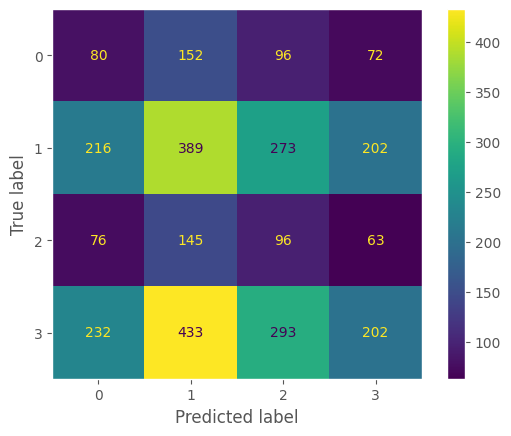

In [139]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg16_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg16")
plt.show()

In [140]:
import gc
gc.collect()

30004

In [141]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg16_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.20      0.16       400
           1       0.35      0.36      0.35      1080
           2       0.13      0.25      0.17       380
           3       0.37      0.17      0.24      1160

    accuracy                           0.25      3020
   macro avg       0.25      0.25      0.23      3020
weighted avg       0.30      0.25      0.26      3020



# VGG19

In [73]:
import gc
gc.collect()

In [74]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg19 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg19.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [75]:
def create_model_vgg19():

    model_vgg19 = tf.keras.Sequential([
    tf.keras.applications.VGG19(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg19.trainable = False
    return model_vgg19

In [76]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg19 = []
y_test_all_vgg19 = []
train_acc_vgg19 = []
test_acc_vgg19 = []
train_loss_vgg19 = []
test_loss_vgg19 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_vgg19.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg19 = None
    model_vgg19 = create_model_vgg19()
        
    model_vgg19.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg19.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg19.predict(X_test)
    
    scores_vgg19.append(x)
    train_acc_vgg19.append(history.history["accuracy"])
    test_acc_vgg19.append(history.history["val_accuracy"])
    train_loss_vgg19.append(history.history["loss"])
    test_loss_vgg19.append(history.history["val_loss"])
    
    gc.collect()

In [77]:
times_vgg19

In [142]:
import gc
gc.collect()

0

In [143]:
import matplotlib.pyplot as plt

times_vgg19_n = np.zeros((10,100))
for i, row in enumerate(times_vgg19):
    times_vgg19_n[i, :len(row)] = row

times_vgg19_n_n = np.mean(times_vgg19_n,axis=1)

plt.plot(times_vgg19_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg19 times")
plt.show()

TypeError: object of type 'numpy.float64' has no len()

In [144]:
train_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg19):
    train_acc_vgg19_n[i, :len(row)] = row
    
test_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg19):
    test_acc_vgg19_n[i, :len(row)] = row
    
train_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg19):
    train_loss_vgg19_n[i, :len(row)] = row
    
test_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg19):
    test_loss_vgg19_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg19_n = np.mean(train_acc_vgg19_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg19_n = np.mean(test_acc_vgg19_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg19_n = np.mean(train_loss_vgg19_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg19_n = np.mean(test_loss_vgg19_n,axis=0)

In [145]:
data = [train_acc_vgg19_n,test_acc_vgg19_n,train_loss_vgg19_n,test_loss_vgg19_n]

df = pd.DataFrame(data)
df.to_csv('vgg19_acc', index=False)
df = pd.read_csv('vgg19_acc')

train_acc_vgg19_n = df.iloc[0]
test_acc_vgg19_n = df.iloc[1]
train_loss_vgg19_n = df.iloc[2]
test_loss_vgg19_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg19_n_n])
df_t.to_csv('vgg19_times', index=False)
df_t = pd.read_csv('vgg19_times')

times_vgg19_n_n = df_t.iloc[0]

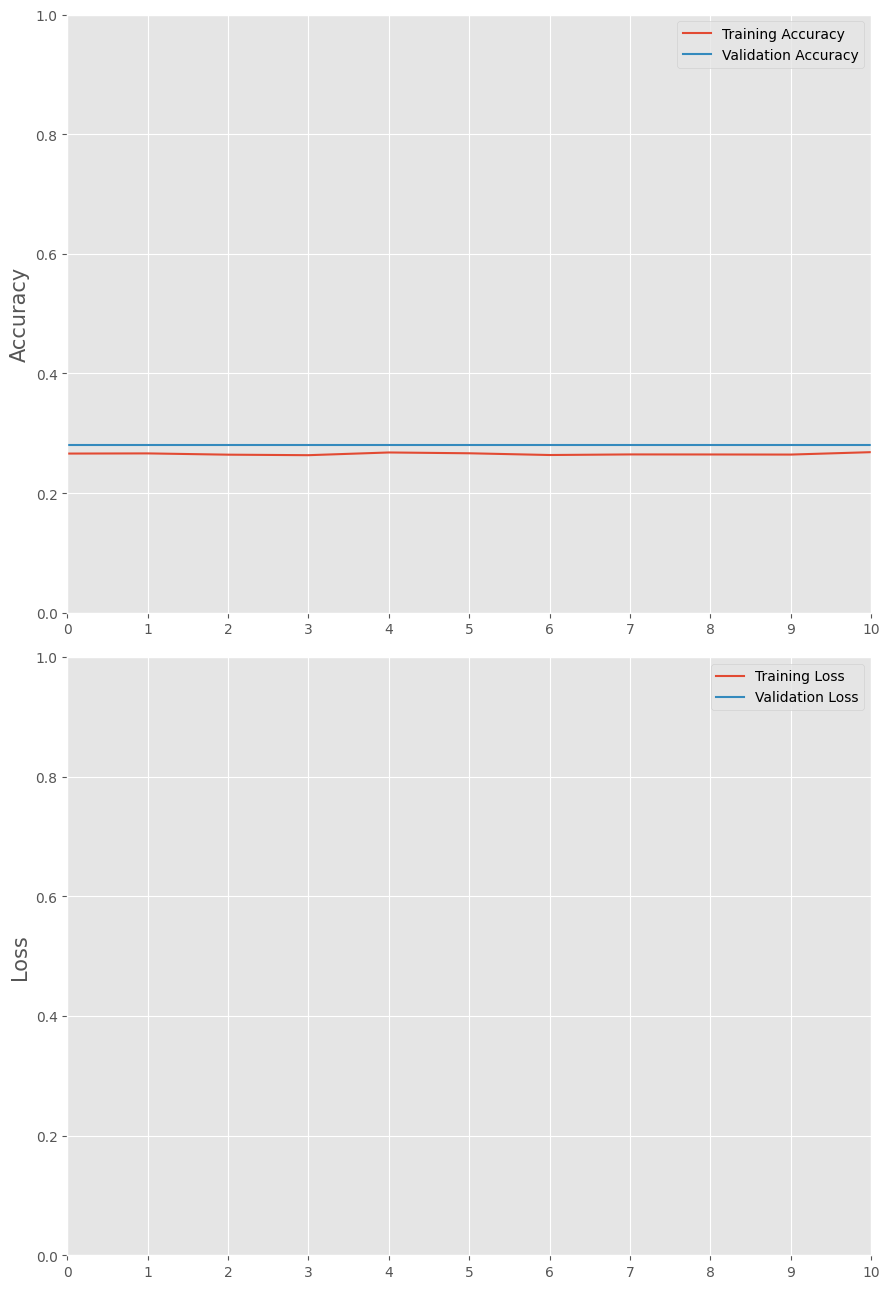

In [146]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg19_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg19_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg19_n, label='Training Loss')
axs[1].plot(test_loss_vgg19_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg19 Training and Testing Loss")
plt.show()

In [147]:
np.array(scores_vgg19).shape

(10, 302, 4)

In [148]:
y_pred_vgg19 = np.argmax(scores_vgg19,axis=2)

In [149]:
y_pred_vgg19.shape

(10, 302)

In [150]:
from sklearn.metrics import accuracy_score
acc_scores_vgg19 = []
for i in range(len(y_test_all_vgg19)):
    acc_scores_vgg19.append(accuracy_score(y_true = y_test_all_vgg19[i],y_pred = y_pred_vgg19[i]))

In [151]:
acc_scores_vgg19

[0.3841059602649007,
 0.12582781456953643,
 0.33774834437086093,
 0.3576158940397351,
 0.13245033112582782,
 0.3576158940397351,
 0.12582781456953643,
 0.3576158940397351,
 0.13245033112582782,
 0.3841059602649007]

In [152]:
df_acc = pd.DataFrame([acc_scores_vgg19])

df_acc.to_csv('vgg19_accuracy', index=False)

df_acc = pd.read_csv('vgg19_accuracy')

acc_scores_vgg19 = df_acc.iloc[0].values

In [153]:
y_test_all_n = np.array(y_test_all_vgg19)

y_pred_vgg19_n = y_pred_vgg19.flatten()
y_test_all_n = y_test_all_n.flatten()

In [154]:
import gc
gc.collect()

23685

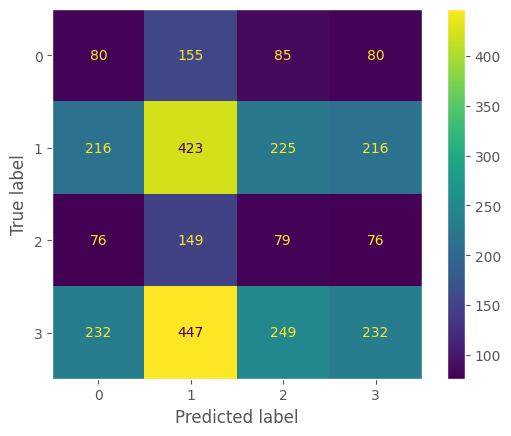

In [155]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg19_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg19")
plt.show()

In [156]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg19_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.20      0.16       400
           1       0.36      0.39      0.38      1080
           2       0.12      0.21      0.16       380
           3       0.38      0.20      0.26      1160

    accuracy                           0.27      3020
   macro avg       0.25      0.25      0.24      3020
weighted avg       0.31      0.27      0.28      3020



#  Performance Metrics

## accuracy_score Metrics

In [157]:
df_acc = pd.read_csv('cnn_svm_accuracy')
acc_scores_cnn_svm = df_acc.iloc[0].values


df_acc = pd.read_csv('lstm_accuracy')
acc_scores_lstm = df_acc.iloc[0].values


df_acc = pd.read_csv('bilstm_accuracy')
acc_scores_bilstm = df_acc.iloc[0].values


df_acc = pd.read_csv('birnn_accuracy')
acc_scores_birnn = df_acc.iloc[0].values



df_acc = pd.read_csv('mnv2_accuracy')
acc_scores_mnv2 = df_acc.iloc[0].values


df_acc = pd.read_csv('env2l_accuracy')
acc_scores_env2l = df_acc.iloc[0].values


df_acc = pd.read_csv('enb7_accuracy')
acc_scores_enb7 = df_acc.iloc[0].values


df_acc = pd.read_csv('nnl_accuracy')
acc_scores_nnl = df_acc.iloc[0].values


df_acc = pd.read_csv('nnb_accuracy')
acc_scores_nnb = df_acc.iloc[0].values



df_acc = pd.read_csv('axn_accuracy')
acc_scores_axn = df_acc.iloc[0].values



df_acc = pd.read_csv('rnv2_accuracy')
acc_scores_rnv2 = df_acc.iloc[0].values



df_acc = pd.read_csv('xv3_accuracy')
acc_scores_xv3 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg16_accuracy')
acc_scores_vgg16 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg19_accuracy')
acc_scores_vgg19 = df_acc.iloc[0].values

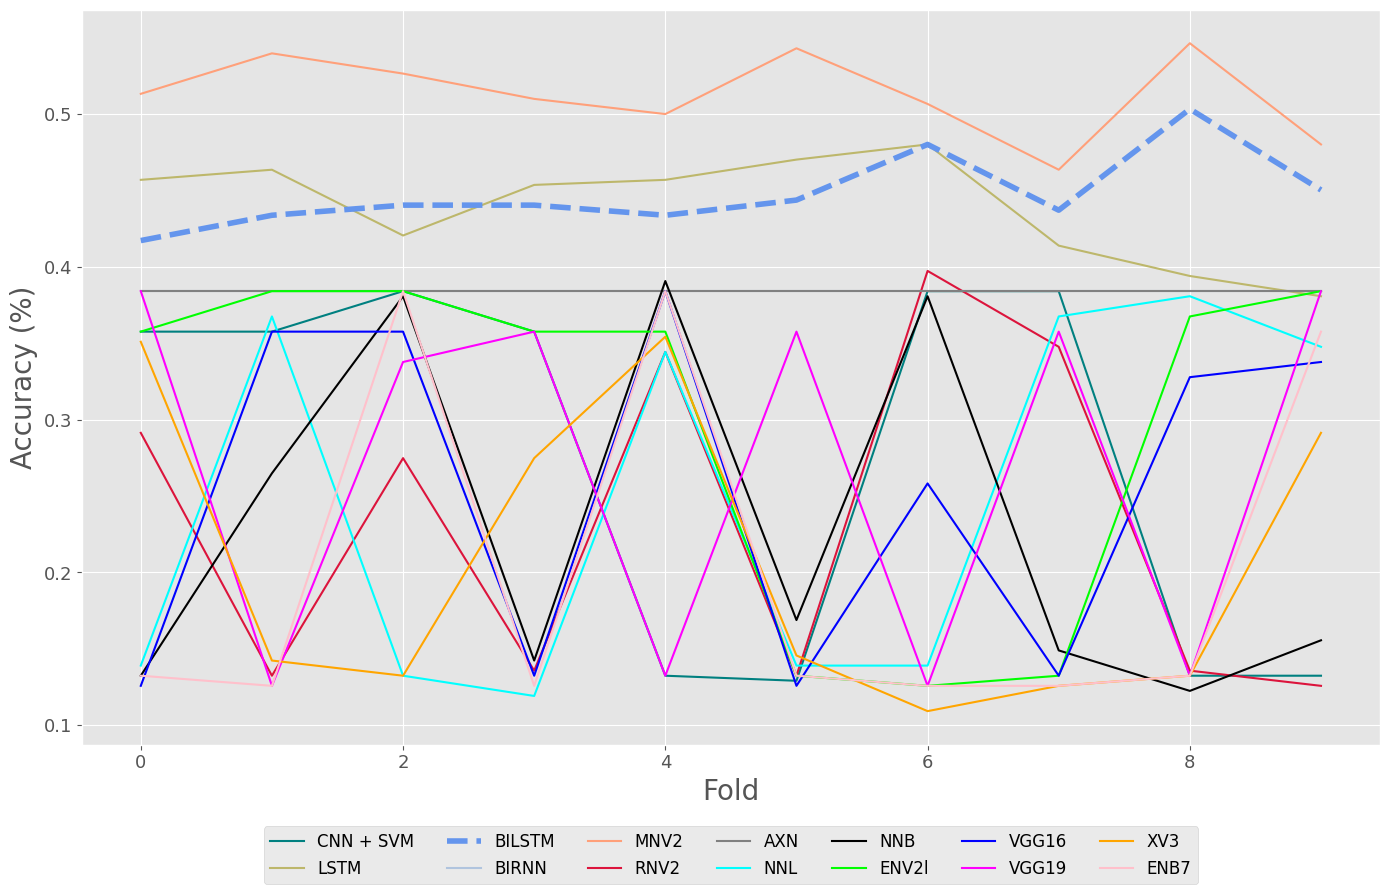

In [158]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(acc_scores_cnn_svm,label='CNN + SVM',color='teal')
plt.plot(acc_scores_lstm,label='LSTM',color='darkkhaki')
plt.plot(acc_scores_bilstm,label='BILSTM',color='cornflowerblue',linewidth=4,linestyle='--')
plt.plot(acc_scores_birnn,label='BIRNN',color='lightsteelblue')
plt.plot(acc_scores_mnv2,label='MNV2',color = 'lightsalmon')
plt.plot(acc_scores_rnv2,label='RNV2',color='crimson')
plt.plot(acc_scores_axn,label='AXN',color='gray')
plt.plot(acc_scores_nnl,label='NNL',color='cyan')
plt.plot(acc_scores_nnb,label='NNB',color='black')
plt.plot(acc_scores_env2l,label='ENV2l',color='lime')
plt.plot(acc_scores_vgg16,label='VGG16',color='blue')
plt.plot(acc_scores_vgg19,label='VGG19',color='fuchsia')
plt.plot(acc_scores_xv3,label='XV3',color='orange')
plt.plot(acc_scores_enb7,label='ENB7',color='pink')

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Accuracy (%)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Accuracy")
plt.show()

## Times Metrics

In [159]:
df_acc = pd.read_csv('cnn_svm_times')
times_cnn_svm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('lstm_times')
times_lstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('bilstm_times')
times_bilstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('birnn_times')
times_birnn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('mnv2_times')
times_mnv2 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('env2l_times')
times_env2l = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('enb7_times')
times_enb7 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnl_times')
times_nnl = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnb_times')
times_nnb = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('axn_times')
times_axn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('rnv2_times')
times_rnv2 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('xv3_times')
times_xv3 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg16_times')
times_vgg16 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg19_times')
times_vgg19 = np.mean(df_acc.iloc[0].values)

In [160]:
df_acc = pd.read_csv('vgg19_times')
times_vgg19 = df_acc.iloc[0].values
times_vgg19

array([5.06735107, 5.05750523, 5.05832995, 5.05093916, 5.05760987,
       5.06159523, 5.05719617, 5.06093022, 5.05760579, 5.04895989])

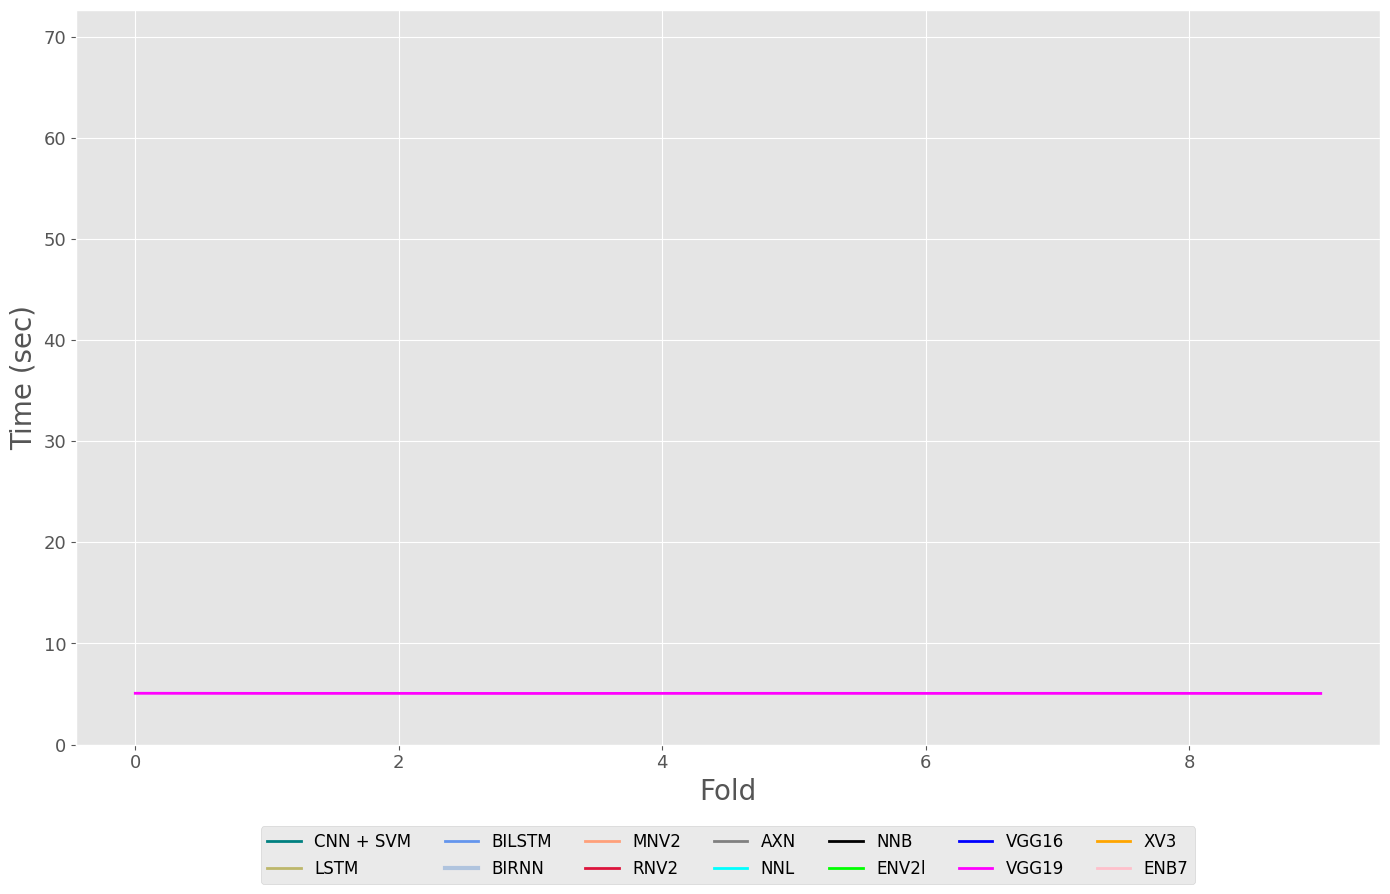

In [161]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(times_cnn_svm,label='CNN + SVM',color='teal',linewidth=2)
plt.plot(times_lstm,label='LSTM',color='darkkhaki',linewidth=2)
plt.plot(times_bilstm,label='BILSTM',color='cornflowerblue',linewidth=2)
plt.plot(times_birnn,label='BIRNN',color='lightsteelblue',linewidth=3)
plt.plot(times_mnv2,label='MNV2',color = 'lightsalmon',linewidth=2)
plt.plot(times_rnv2,label='RNV2',color='crimson',linewidth=2)
plt.plot(times_axn,label='AXN',color='gray',linewidth=2)
plt.plot(times_nnl,label='NNL',color='cyan',linewidth=2)
plt.plot(times_nnb,label='NNB',color='black',linewidth=2)
plt.plot(times_env2l,label='ENV2l',color='lime',linewidth=2)
plt.plot(times_vgg16,label='VGG16',color='blue',linewidth=2)
plt.plot(times_vgg19,label='VGG19',color='fuchsia',linewidth=2)
plt.plot(times_xv3,label='XV3',color='orange',linewidth=2)
plt.plot(times_enb7,label='ENB7',color='pink',linewidth=2)

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Time (sec)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylim(y.min(),)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Times")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


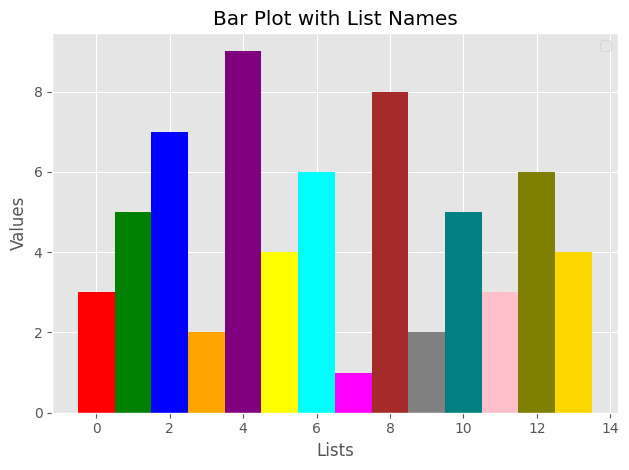

In [162]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
# List names
list_names = ["List 1", "List 2", "List 3", "List 4", "List 5", "List 6", "List 7", "List 8", "List 9", "List 10", "List 11", "List 12", "List 13", "List 14"]

# Data values for each list
data_values = [3, 5, 7, 2, 9, 4, 6, 1, 8, 2, 5, 3, 6, 4]

# Custom colors for each bar
custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'gray', 'teal', 'pink', 'olive', 'gold']

# Width of each bar
bar_width = 1

# Calculate the positions of the bars on the x-axis
bar_positions = np.arange(len(data_values))

# Creating the bar plot
plt.bar(bar_positions, data_values, color=custom_colors, width=bar_width)

# Adding labels to each bar
# for i in range(len(list_names)):
#     plt.text(bar_positions[i], data_values[i], list_names[i], ha='center', va='bottom')

# Customizing the plot
plt.xlabel('Lists')
plt.ylabel('Values')
plt.title('Bar Plot with List Names')
# plt.xticks(bar_positions, list_names, rotation=45)

# Displaying the plot
plt.tight_layout()
plt.legend()
plt.show()


# Training and Testing Perfomance

In [163]:
df_acc = pd.read_csv('cnn_svm_acc')
train_acc_cnn_svm_n = df_acc.iloc[0].values
test_acc_cnn_svm_n = df_acc.iloc[1].values
train_loss_cnn_svm_n = df_acc.iloc[2].values
test_loss_cnn_svm_n = df_acc.iloc[3].values

df_acc = pd.read_csv('lstm_acc')
train_acc_lstm_n = df_acc.iloc[0].values
test_acc_lstm_n = df_acc.iloc[1].values
train_loss_lstm_n = df_acc.iloc[2].values
test_loss_lstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('bilstm_acc')
train_acc_bilstm_n = df_acc.iloc[0].values
test_acc_bilstm_n = df_acc.iloc[1].values
train_loss_bilstm_n = df_acc.iloc[2].values
test_loss_bilstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('birnn_acc')
train_acc_birnn_n = df_acc.iloc[0].values
test_acc_birnn_n = df_acc.iloc[1].values
train_loss_birnn_n = df_acc.iloc[2].values
test_loss_birnn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('mnv2_acc')
train_acc_mnv2_n = df_acc.iloc[0].values
test_acc_mnv2_n = df_acc.iloc[1].values
train_loss_mnv2_n = df_acc.iloc[2].values
test_loss_mnv2_n = df_acc.iloc[3].values


df_acc = pd.read_csv('env2l_acc')
train_acc_env2l_n = df_acc.iloc[0].values
test_acc_env2l_n = df_acc.iloc[1].values
train_loss_env2l_n = df_acc.iloc[2].values
test_loss_env2l_n = df_acc.iloc[3].values


df_acc = pd.read_csv('enb7_acc')
train_acc_enb7_n = df_acc.iloc[0].values
test_acc_enb7_n = df_acc.iloc[1].values
train_loss_enb7_n = df_acc.iloc[2].values
test_loss_enb7_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnl_acc')
train_acc_nnl_n = df_acc.iloc[0].values
test_acc_nnl_n = df_acc.iloc[1].values
train_loss_nnl_n = df_acc.iloc[2].values
test_loss_nnl_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnb_acc')
train_acc_nnb_n = df_acc.iloc[0].values
test_acc_nnb_n = df_acc.iloc[1].values
train_loss_nnb_n = df_acc.iloc[2].values
test_loss_nnb_n = df_acc.iloc[3].values



df_acc = pd.read_csv('axn_acc')
train_acc_axn_n = df_acc.iloc[0].values
test_acc_axn_n = df_acc.iloc[1].values
train_loss_axn_n = df_acc.iloc[2].values
test_loss_axn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('rnv2_acc')
train_acc_rnv2_n = df_acc.iloc[0].values
test_acc_rnv2_n = df_acc.iloc[1].values
train_loss_rnv2_n = df_acc.iloc[2].values
test_loss_rnv2_n = df_acc.iloc[3].values



df_acc = pd.read_csv('xv3_acc')
train_acc_xv3_n = df_acc.iloc[0].values
test_acc_xv3_n = df_acc.iloc[1].values
train_loss_xv3_n = df_acc.iloc[2].values
test_loss_xv3_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg16_acc')
train_acc_vgg16_n = df_acc.iloc[0].values
test_acc_vgg16_n = df_acc.iloc[1].values
train_loss_vgg16_n = df_acc.iloc[2].values
test_loss_vgg16_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg19_acc')
train_acc_vgg19_n = df_acc.iloc[0].values
test_acc_vgg19_n = df_acc.iloc[1].values
train_loss_vgg19_n = df_acc.iloc[2].values
test_loss_vgg19_n = df_acc.iloc[3].values

## Training Accuracy Perfomance

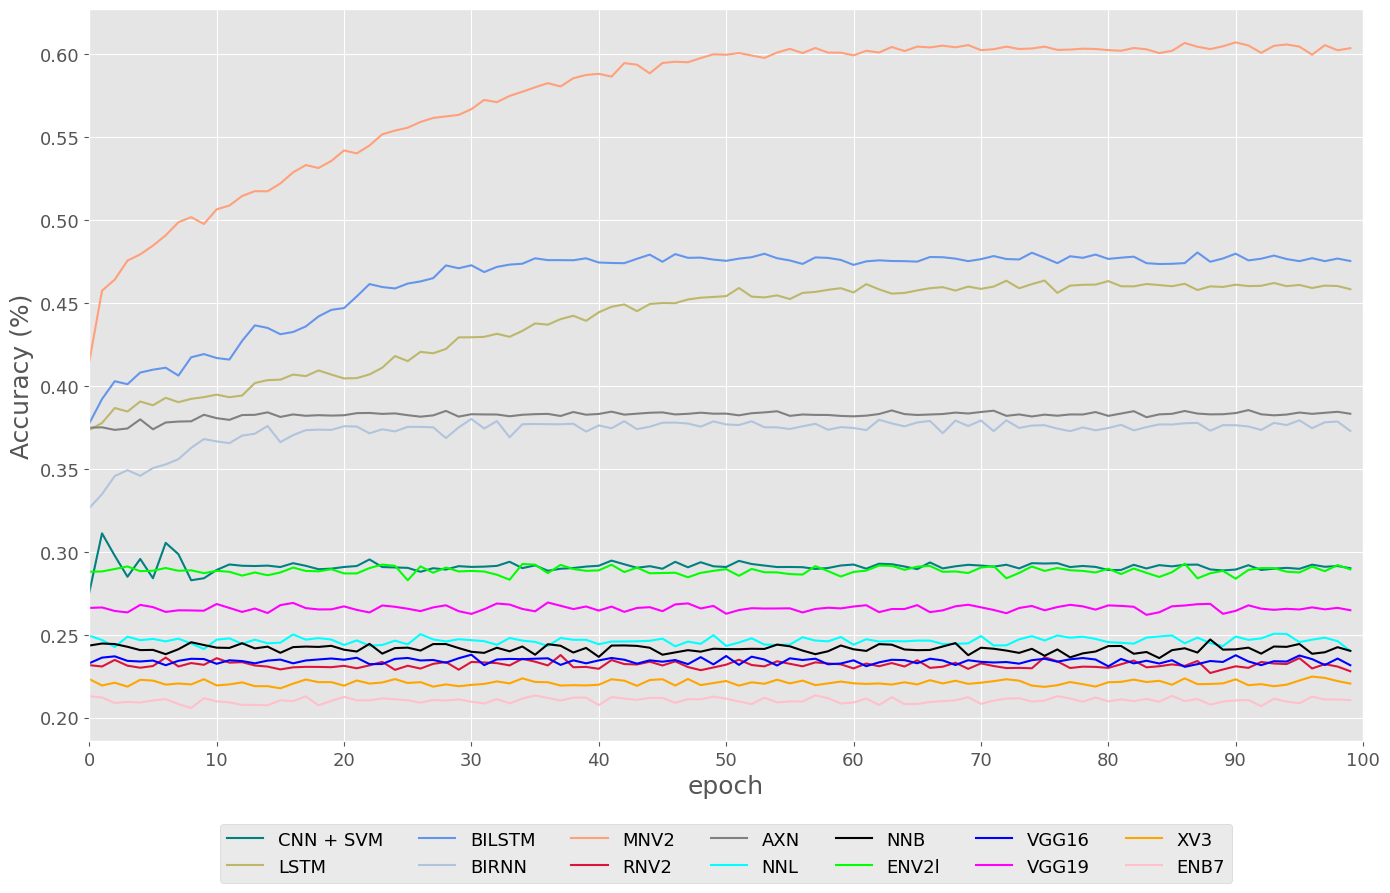

In [164]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_acc_axn_n,label='AXN',color='gray')
plt.plot(train_acc_nnl_n,label='NNL',color='cyan')
plt.plot(train_acc_nnb_n,label='NNB',color='black')
plt.plot(train_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(train_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(train_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_acc_xv3_n,label='XV3',color='orange')
plt.plot(train_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Accuracy Performance")
plt.show()

## Testing Accuracy Perfomance

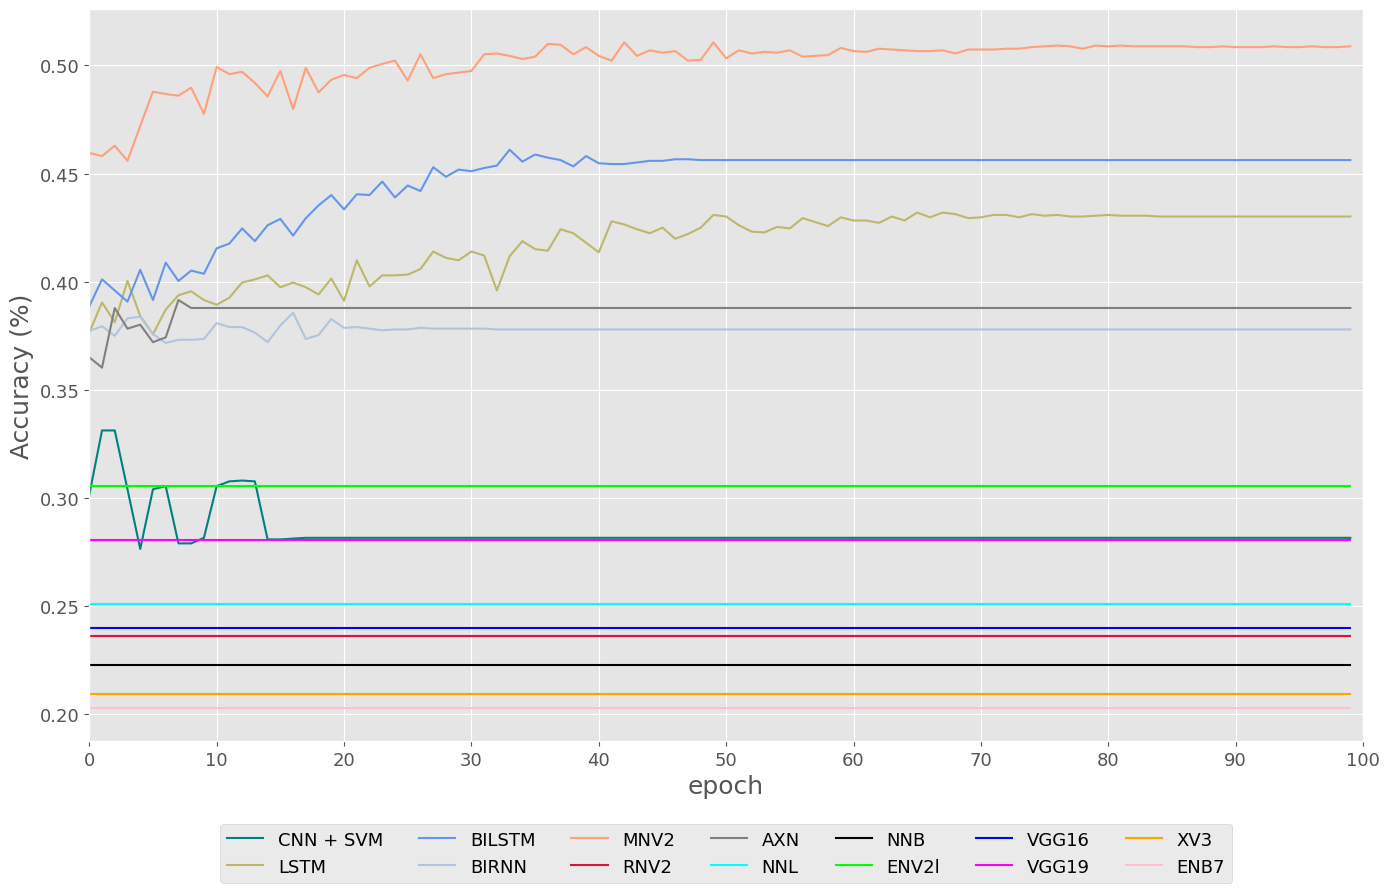

In [165]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_acc_axn_n,label='AXN',color='gray')
plt.plot(test_acc_nnl_n,label='NNL',color='cyan')
plt.plot(test_acc_nnb_n,label='NNB',color='black')
plt.plot(test_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(test_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(test_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_acc_xv3_n,label='XV3',color='orange')
plt.plot(test_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Accuracy Performance")
plt.show()

## Training Loss Perfomance

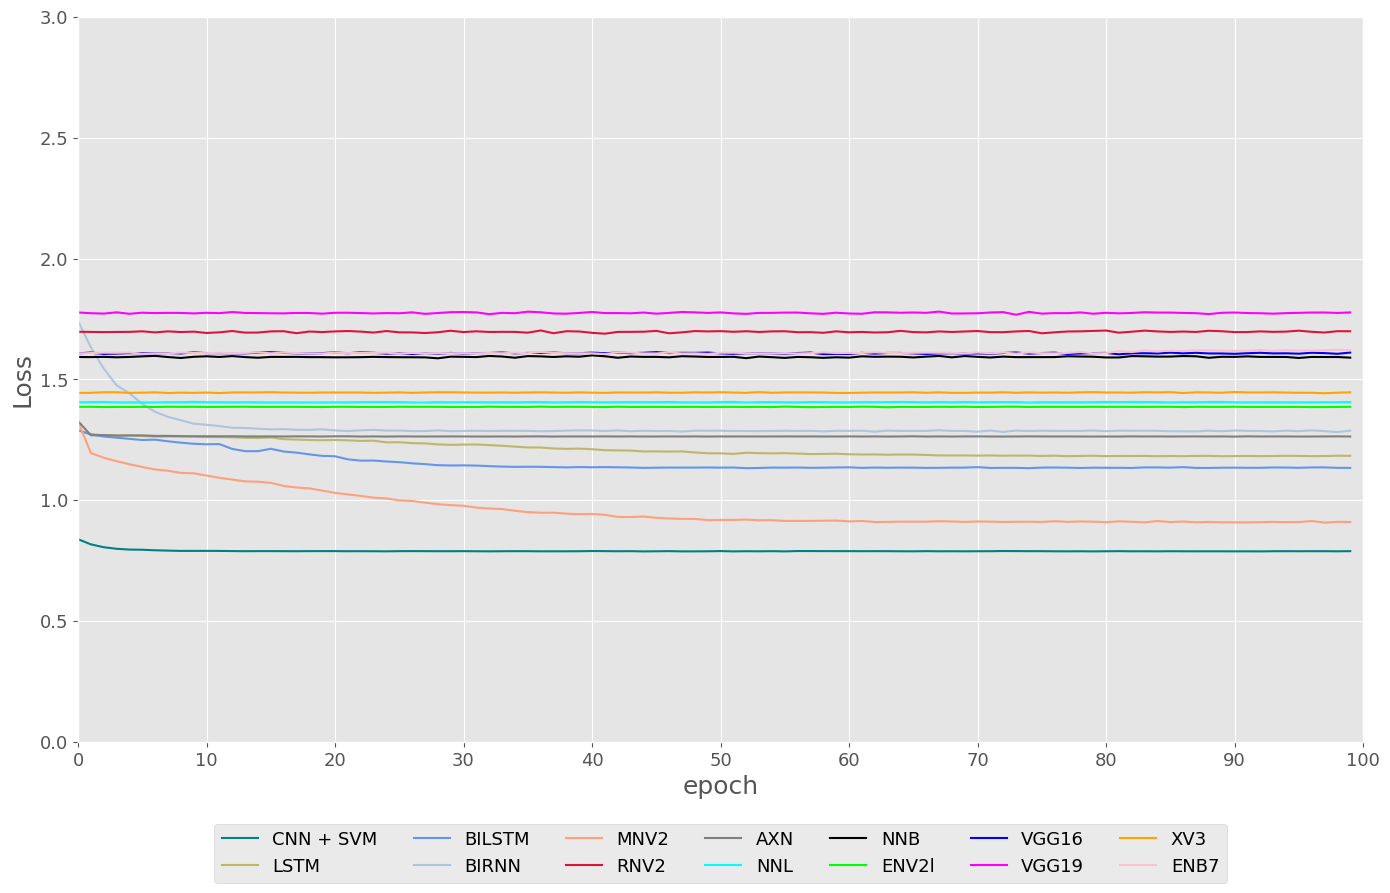

In [166]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_loss_axn_n,label='AXN',color='gray')
plt.plot(train_loss_nnl_n,label='NNL',color='cyan')
plt.plot(train_loss_nnb_n,label='NNB',color='black')
plt.plot(train_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(train_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(train_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_loss_xv3_n,label='XV3',color='orange')
plt.plot(train_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Loss Performance")
plt.show()

## Testing Loss Perfomance

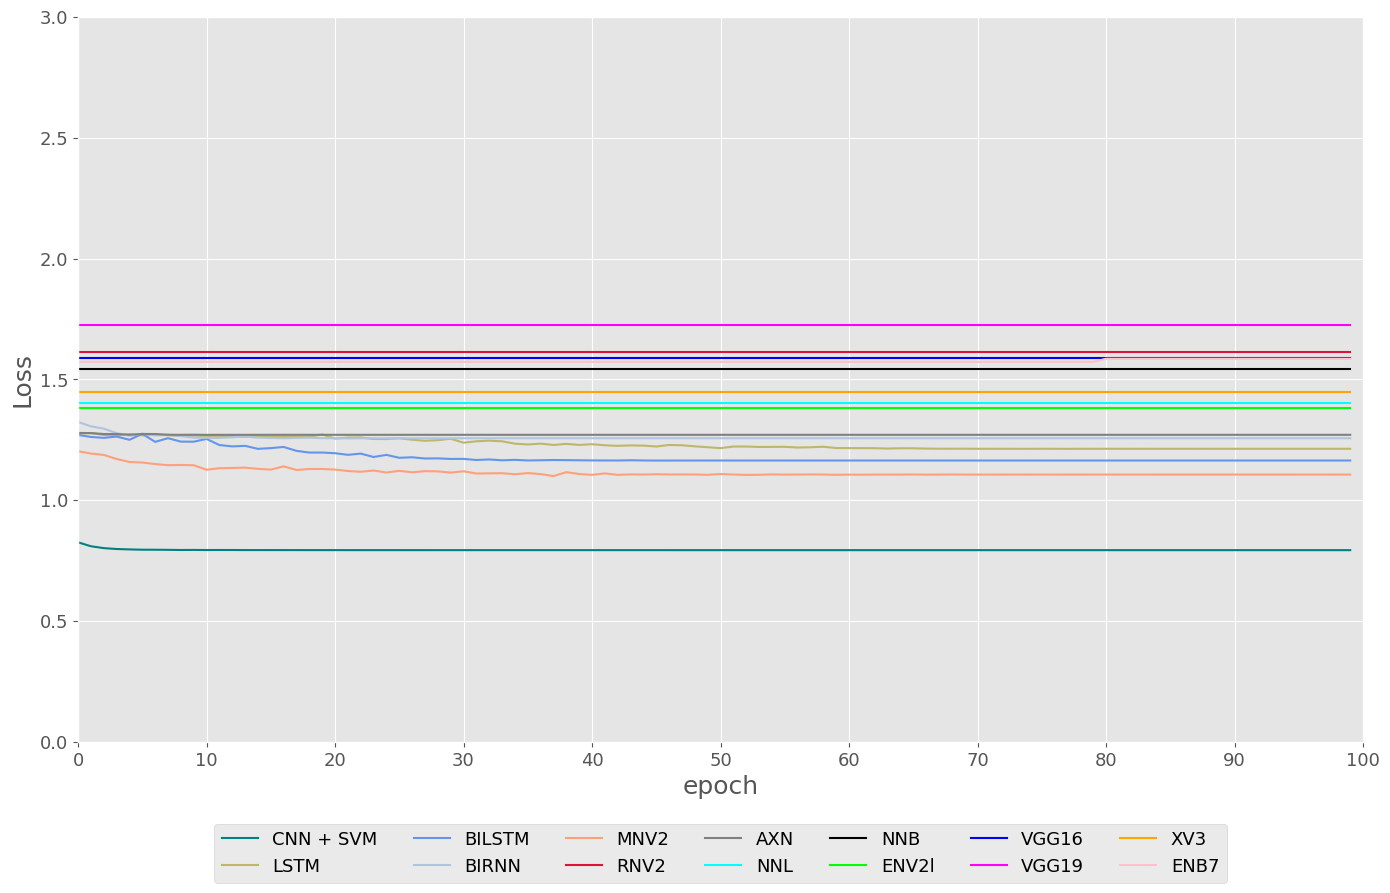

In [167]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_loss_axn_n,label='AXN',color='gray')
plt.plot(test_loss_nnl_n,label='NNL',color='cyan')
plt.plot(test_loss_nnb_n,label='NNB',color='black')
plt.plot(test_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(test_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(test_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_loss_xv3_n,label='XV3',color='orange')
plt.plot(test_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Loss Performance")
plt.show()